In [3]:
import numpy as np

import pandas as pd
import text2emotion as te
import ast
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from matplotlib import pyplot

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
data_train = pd.read_csv('C:/Users/katya/Fake_News/data_train.csv')
data_test = pd.read_csv('C:/Users/katya/Fake_News/data_test.csv') 

read_scores = pd.read_csv('C:/Users/katya/Fake_News/readability_scores.csv')
read_scores_test = pd.read_csv('C:/Users/katya/Fake_News/readability_scores_test.csv')

stopword_ft = pd.read_csv('C:/Users/katya/Fake_News/StopWord_Features.csv')
stopword_ft_test = pd.read_csv('C:/Users/katya/Fake_News/StopWord_Features_test.csv')

other_feat = pd.read_csv('C:/Users/katya/Fake_News/other_feat.csv')
other_feat_test = pd.read_csv('C:/Users/katya/Fake_News/other_feat_test.csv')

In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 30)

In [5]:
read_scores

,Unnamed: 0,classify,Gunning_Fog_score,Gunning_Fog_grade_level,Flesch_Kincaid_score,Flesch_Kincaid_grade_level,Flesch_score,Flesch_ease,Flesch_grade_level,Coleman_Liau_score,...,Dale_Chall_grade_level,Ari_score,Ari_grade_level,Ari_ages,Linsear_Write_score,Linsear_Write_grade_level,Spache_score,Spache_grade_level,Smog_score,Smog_grade_level
0,0,T,16.790597,college_graduate,14.452010,14.0,38.874147,difficult,['college'],12.793937,...,['college_graduate'],16.200741,['college_graduate'],"[24, 100]",19.179487,19,8.486521,8,16.486017,16.0
1,1,T,NaN,NaN,NaN,NaN,38.874147,difficult,['college'],12.793937,...,['college_graduate'],16.200741,['college_graduate'],"[24, 100]",19.179487,19,8.486521,8,NaN,NaN
2,2,T,16.921311,college_graduate,15.305574,15.0,37.466352,difficult,['college'],11.087213,...,['college_graduate'],16.134590,['college_graduate'],"[24, 100]",20.350000,20,9.228025,9,NaN,NaN
3,3,T,19.505103,college_graduate,18.822545,19.0,18.405318,very_confusing,['college_graduate'],13.594135,...,['college_graduate'],19.860616,['college_graduate'],"[24, 100]",24.250000,24,9.631851,10,NaN,NaN
4,4,T,19.410526,college_graduate,16.705263,17.0,40.251842,difficult,['college'],9.455526,...,['college_graduate'],18.424145,['college_graduate'],"[24, 100]",24.250000,24,9.082526,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33812,33812,F,15.915524,college,14.312033,14.0,41.341664,difficult,['college'],13.661538,...,['college_graduate'],17.298322,['college_graduate'],"[24, 100]",18.833333,19,8.399805,8,NaN,NaN
33813,33813,F,17.026923,college_graduate,15.287069,15.0,38.909568,difficult,['college'],11.788230,...,['college_graduate'],17.060391,['college_graduate'],"[24, 100]",20.833333,21,9.208368,9,NaN,NaN
33814,33814,F,20.488829,college_graduate,18.051999,18.0,28.110020,very_confusing,['college_graduate'],12.468259,...,['college_graduate'],20.134966,['college_graduate'],"[24, 100]",25.272727,25,10.163551,10,NaN,NaN
33815,33815,F,12.216957,12,10.653101,11.0,58.734268,fairly_difficult,"['10', '11', '12']",8.356829,...,['college_graduate'],10.646420,['11'],"[16, 17]",14.714286,15,7.306250,7,NaN,NaN


In [ ]:
print(f.score)
print(f.ease)
print(f.grade_levels)

In [ ]:
#cant do GF grade level, Flesch ease or grade level, Dale Chall grade level, Ari grade level + Ari ages bc it's an array
#can't do smog score or grade level either bc no fakes meeet 30 sent min requirement

In [230]:
train = pd.DataFrame()
#train['x'] = read_scores['Gunning_Fog_score']
#train['x_1'] = read_scores['Flesch_Kincaid_score']
#train['x_2'] = read_scores['Flesch_Kincaid_grade_level']
#train['x_3'] = read_scores['Flesch_score']
#train['x_4'] = read_scores['Coleman_Liau_score']
#train['x_5'] = read_scores['Coleman_Liau_grade_level']
train['x_6'] = read_scores['Dale_Chall_score']
train['x_7'] = read_scores['Ari_score']
#train['x_8'] = read_scores['Linsear_Write_score']
#train['x_9'] = read_scores['Linsear_Write_grade_level']
train['x_10'] = read_scores['Spache_score']
#train['x_11'] = read_scores['Spache_grade_level']

train = train.dropna()  #drop rows with n/a
train.reset_index(inplace=True, drop=True)

train['y'] = read_scores['classify']

#1 True, 0 False
train['y'] = train['y'].replace({'T': 1})
train['y'] = train['y'].replace({'F': 0})


#train = train.drop(['h','sa', 'y'], axis = 1)
x_train = train.drop(['y'], axis= 1)
#x_train = train['x'].values.reshape(-1,1)
y_train = train['y']

In [231]:
x_train

,x_6,x_7,x_10
0,10.193220,16.200741,8.486521
1,10.193220,16.200741,8.486521
2,11.413530,16.134590,9.228025
3,11.440118,19.860616,9.631851
4,10.715379,18.424145,9.082526
...,...,...,...
33812,10.612846,17.298322,8.399805
33813,11.146452,17.060391,9.208368
33814,12.047961,20.134966,10.163551
33815,10.126077,10.646420,7.306250


In [232]:
LR = LinearRegression()
LR.fit(x_train,y_train)

Intercept=LR.intercept_
Coefficients=LR.coef_

print(Intercept)
print(Coefficients)

-1.8361340767426673
[ 0.06209632 -0.15854531  0.4996459 ]


In [233]:
test = pd.DataFrame()
test['x'] = read_scores_test['Spache_grade_level'].dropna()
test.reset_index(inplace=True, drop=True)
#train['a'] = emotion_no_sw['Angry']
test['y'] = read_scores_test['classify']

#1 True, 0 False
test['y'] = test['y'].replace({'T': 1})
test['y'] = test['y'].replace({'F': 0})

#train = train.drop(['h','sa', 'y'], axis = 1)
#x_train = train.drop(['y'])
x_test = test['x'].values.reshape(-1,1)
y_test = test['y']

test = pd.DataFrame()
#test['x'] = read_scores_test['Gunning_Fog_score']
#test['x_1'] = read_scores_test['Flesch_Kincaid_score']
#test['x_2'] = read_scores_test['Flesch_Kincaid_grade_level']
#test['x_3'] = read_scores_test['Flesch_score']
#test['x_4'] = read_scores_test['Coleman_Liau_score']
#test['x_5'] = read_scores_test['Coleman_Liau_grade_level']
test['x_6'] = read_scores_test['Dale_Chall_score']
test['x_7'] = read_scores_test['Ari_score']
#test['x_8'] = read_scores_test['Linsear_Write_score']
#test['x_9'] = read_scores_test['Linsear_Write_grade_level']
test['x_10'] = read_scores_test['Spache_score']
#test['x_11'] = read_scores_test['Spache_grade_level']

test = test.dropna()  #drop rows with n/a
test.reset_index(inplace=True, drop=True)

test['y'] = read_scores_test['classify']

test['y'] = test['y'].replace({'T': 1})
test['y'] = test['y'].replace({'F': 0})

x_test = test.drop(['y'], axis= 1)
#x_test = test['x'].values.reshape(-1,1)
y_test = test['y']

In [234]:
x_test

,x_6,x_7,x_10
0,9.084374,10.480581,6.656239
1,12.283381,19.541277,10.222550
2,11.196562,18.546848,9.411168
3,10.636593,18.035885,8.982633
4,9.916710,14.728228,8.077067
...,...,...,...
10445,10.607081,22.023492,10.082693
10446,10.312322,12.677968,7.381265
10447,10.003532,9.270026,6.981904
10448,8.826834,16.165123,7.441953


In [235]:
y_prediction = LR.predict(x_test)

In [236]:
y_prediction

array([ 0.39208754,  0.93609632,  0.62086724, ...,  0.80380901,
       -0.13258316,  0.33121089])

In [237]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ' + str(score))
print('mean_sqrd_error is==' + str(mean_squared_error(y_test,y_prediction)))
print('root_mean_squared error of is==' + str(np.sqrt(mean_squared_error(y_test,y_prediction))))

r2 socre is 0.226340838321614
mean_sqrd_error is==0.18714148634558592
root_mean_squared error of is==0.43259852790501485


In [238]:
#FOR LR
c = 0
for element in range(len(test['y'])):
    y_prediction = LR.predict(x_test)
    print('predict: ' + str(y_prediction[element].reshape(1,-1)))
    print('x[element] 1: ' + str(((test.loc[element,'x_10']))))
    #print('x[element] 2: ' + str(((test.loc[element,'a']))))
    #print('x[element] 3: ' + str(((test.loc[element,'su']))))
    #print('x[element] 4: ' + str(((test.loc[element,'sa']))))
    #print('x[element] 5: ' + str(((test.loc[element,'f']))))      
    
    #print('y[element] 2: ' + str(((new.loc[element,'y_1'])[0])))
    print('y[element]: ' + str((test['y'])[element]))

    value = (test['y'])[element]
    pred_value = (y_prediction[element].reshape(1,-1))[0][0]
    if ((pred_value <= 0.5) & (value == 0)):
        print('correct')
        c = c + 1
    elif ((pred_value >= 0.5) & (value == 1)):
        print('correct')
        c = c + 1
    else:
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(test['y'])
print((c/l)*100)

winsound.Beep(frequency, duration)

predict: [[0.39208754]]
x[element] 1: 6.656238888888887
y[element]: 1
wrong
********
predict: [[0.93609632]]
x[element] 1: 10.222550458715595
y[element]: 1
correct
********
predict: [[0.62086724]]
x[element] 1: 9.411168478260867
y[element]: 1
correct
********
predict: [[0.4529898]]
x[element] 1: 8.982632782101167
y[element]: 1
wrong
********
predict: [[0.48023915]]
x[element] 1: 8.077067237222757
y[element]: 1
wrong
********
predict: [[0.48023915]]
x[element] 1: 8.077067237222757
y[element]: 1
wrong
********
predict: [[0.45831738]]
x[element] 1: 8.006843949044585
y[element]: 1
wrong
********
predict: [[0.74503678]]
x[element] 1: 10.992746031746032
y[element]: 1
correct
********
predict: [[0.81472899]]
x[element] 1: 9.922303030303027
y[element]: 1
correct
********
predict: [[0.81472899]]
x[element] 1: 9.922303030303027
y[element]: 1
correct
********
predict: [[0.42363271]]
x[element] 1: 7.516584699453551
y[element]: 1
wrong
********
predict: [[0.35987623]]
x[element] 1: 7.44621209465381

predict: [[0.65762638]]
x[element] 1: 8.576213565463997
y[element]: 1
correct
********
predict: [[0.78160713]]
x[element] 1: 9.990482785299806
y[element]: 1
correct
********
predict: [[0.40229237]]
x[element] 1: 9.237246688741722
y[element]: 1
wrong
********
predict: [[0.39019646]]
x[element] 1: 7.991999999999999
y[element]: 1
wrong
********
predict: [[0.96315306]]
x[element] 1: 9.209848484848484
y[element]: 1
correct
********
predict: [[0.55564133]]
x[element] 1: 8.015465573770491
y[element]: 1
correct
********
predict: [[0.37332862]]
x[element] 1: 8.184600597697107
y[element]: 1
wrong
********
predict: [[0.37332862]]
x[element] 1: 8.184600597697107
y[element]: 1
wrong
********
predict: [[0.37332862]]
x[element] 1: 8.184600597697107
y[element]: 1
wrong
********
predict: [[0.69792995]]
x[element] 1: 8.556465863453814
y[element]: 1
correct
********
predict: [[0.5401903]]
x[element] 1: 8.764637931034482
y[element]: 1
correct
********
predict: [[0.5401903]]
x[element] 1: 8.764637931034482

predict: [[0.39867526]]
x[element] 1: 9.073591836734693
y[element]: 1
wrong
********
predict: [[0.74996172]]
x[element] 1: 9.208597928807686
y[element]: 1
correct
********
predict: [[0.71669253]]
x[element] 1: 9.415458306399485
y[element]: 1
correct
********
predict: [[0.68630047]]
x[element] 1: 8.952698886639675
y[element]: 1
correct
********
predict: [[0.65591126]]
x[element] 1: 8.535427860696517
y[element]: 1
correct
********
predict: [[0.78539541]]
x[element] 1: 7.650705310026383
y[element]: 1
correct
********
predict: [[0.95122879]]
x[element] 1: 10.271530612244897
y[element]: 1
correct
********
predict: [[0.98895822]]
x[element] 1: 8.518345207253885
y[element]: 1
correct
********
predict: [[0.78310329]]
x[element] 1: 10.161267482517482
y[element]: 1
correct
********
predict: [[0.51648827]]
x[element] 1: 8.342357142857143
y[element]: 1
correct
********
predict: [[0.61334359]]
x[element] 1: 8.332813625304135
y[element]: 1
correct
********
predict: [[0.75328151]]
x[element] 1: 9.203

y[element]: 1
correct
********
predict: [[0.54643299]]
x[element] 1: 9.754571428571428
y[element]: 1
correct
********
predict: [[1.30121601]]
x[element] 1: 9.752467741935485
y[element]: 1
correct
********
predict: [[0.97337209]]
x[element] 1: 8.417578431372549
y[element]: 1
correct
********
predict: [[0.97337209]]
x[element] 1: 8.417578431372549
y[element]: 1
correct
********
predict: [[0.97337209]]
x[element] 1: 8.417578431372549
y[element]: 1
correct
********
predict: [[0.68206729]]
x[element] 1: 8.836117579581302
y[element]: 1
correct
********
predict: [[0.90892273]]
x[element] 1: 11.131877862595417
y[element]: 1
correct
********
predict: [[0.40600114]]
x[element] 1: 8.309439584877687
y[element]: 1
wrong
********
predict: [[0.27155338]]
x[element] 1: 6.501234245738715
y[element]: 1
wrong
********
predict: [[0.60889241]]
x[element] 1: 8.7030197147651
y[element]: 1
correct
********
predict: [[0.70153143]]
x[element] 1: 9.005656069364163
y[element]: 1
correct
********
predict: [[0.7015

predict: [[0.56578606]]
x[element] 1: 9.350601382488481
y[element]: 1
correct
********
predict: [[1.00927476]]
x[element] 1: 10.501713302287913
y[element]: 1
correct
********
predict: [[0.41020948]]
x[element] 1: 8.45357142857143
y[element]: 1
wrong
********
predict: [[0.41020948]]
x[element] 1: 8.45357142857143
y[element]: 1
wrong
********
predict: [[0.41020948]]
x[element] 1: 8.45357142857143
y[element]: 1
wrong
********
predict: [[0.61179524]]
x[element] 1: 8.501121971066906
y[element]: 1
correct
********
predict: [[0.8222999]]
x[element] 1: 8.218799671592775
y[element]: 1
correct
********
predict: [[0.8222999]]
x[element] 1: 8.218799671592775
y[element]: 1
correct
********
predict: [[0.84724]]
x[element] 1: 9.824725868725867
y[element]: 1
correct
********
predict: [[0.5072832]]
x[element] 1: 7.447722804190168
y[element]: 1
correct
********
predict: [[0.59483018]]
x[element] 1: 8.209521455938697
y[element]: 1
correct
********
predict: [[0.74443503]]
x[element] 1: 8.54141812865497
y[

predict: [[0.38437025]]
x[element] 1: 9.463717299578061
y[element]: 1
wrong
********
predict: [[0.79043705]]
x[element] 1: 8.439430091185411
y[element]: 1
correct
********
predict: [[0.79043705]]
x[element] 1: 8.439430091185411
y[element]: 1
correct
********
predict: [[0.79043705]]
x[element] 1: 8.439430091185411
y[element]: 1
correct
********
predict: [[0.83829149]]
x[element] 1: 9.057047463175122
y[element]: 1
correct
********
predict: [[0.99302017]]
x[element] 1: 8.927416815286625
y[element]: 1
correct
********
predict: [[0.86825567]]
x[element] 1: 8.306207792207791
y[element]: 1
correct
********
predict: [[0.6804732]]
x[element] 1: 9.06295744680851
y[element]: 1
correct
********
predict: [[0.75338657]]
x[element] 1: 8.594457680250782
y[element]: 1
correct
********
predict: [[0.62144285]]
x[element] 1: 9.119662486235164
y[element]: 1
correct
********
predict: [[0.89254944]]
x[element] 1: 8.364280032467532
y[element]: 1
correct
********
predict: [[0.64512652]]
x[element] 1: 7.6689302

x[element] 1: 7.472344947735191
y[element]: 1
correct
********
predict: [[0.79030033]]
x[element] 1: 10.016637942702456
y[element]: 1
correct
********
predict: [[0.3521319]]
x[element] 1: 8.615352925020598
y[element]: 1
wrong
********
predict: [[0.72397279]]
x[element] 1: 8.448345167386611
y[element]: 1
correct
********
predict: [[0.72397279]]
x[element] 1: 8.448345167386611
y[element]: 1
correct
********
predict: [[0.74885294]]
x[element] 1: 9.354287644787645
y[element]: 1
correct
********
predict: [[0.65787379]]
x[element] 1: 9.333106327593109
y[element]: 1
correct
********
predict: [[1.00097072]]
x[element] 1: 10.113545454545452
y[element]: 1
correct
********
predict: [[0.56468851]]
x[element] 1: 7.620547782231992
y[element]: 1
correct
********
predict: [[0.7709124]]
x[element] 1: 8.894579670329673
y[element]: 1
correct
********
predict: [[0.51341529]]
x[element] 1: 8.194905317769132
y[element]: 1
correct
********
predict: [[0.51341529]]
x[element] 1: 8.194905317769132
y[element]: 1

x[element] 1: 7.63614697960754
y[element]: 1
correct
********
predict: [[0.60617632]]
x[element] 1: 7.63614697960754
y[element]: 1
correct
********
predict: [[0.99096451]]
x[element] 1: 8.852377796901893
y[element]: 1
correct
********
predict: [[0.99096451]]
x[element] 1: 8.852377796901893
y[element]: 1
correct
********
predict: [[0.64668693]]
x[element] 1: 7.543584071184361
y[element]: 1
correct
********
predict: [[0.61216028]]
x[element] 1: 8.390283439490446
y[element]: 1
correct
********
predict: [[0.61216028]]
x[element] 1: 8.390283439490446
y[element]: 1
correct
********
predict: [[0.52363824]]
x[element] 1: 7.821487623066102
y[element]: 1
correct
********
predict: [[0.65315804]]
x[element] 1: 8.14543043478261
y[element]: 1
correct
********
predict: [[0.65315804]]
x[element] 1: 8.14543043478261
y[element]: 1
correct
********
predict: [[0.72150728]]
x[element] 1: 8.180607651245552
y[element]: 1
correct
********
predict: [[0.64914567]]
x[element] 1: 9.071293149636434
y[element]: 1
c

predict: [[0.5380636]]
x[element] 1: 9.976111111111113
y[element]: 1
correct
********
predict: [[0.31175606]]
x[element] 1: 9.003323348694316
y[element]: 1
wrong
********
predict: [[0.90435296]]
x[element] 1: 10.5017171256989
y[element]: 1
correct
********
predict: [[0.8342101]]
x[element] 1: 9.634097505288251
y[element]: 1
correct
********
predict: [[0.8342101]]
x[element] 1: 9.634097505288251
y[element]: 1
correct
********
predict: [[0.38337966]]
x[element] 1: 7.665509354886992
y[element]: 1
wrong
********
predict: [[0.5058153]]
x[element] 1: 8.496337831758883
y[element]: 1
correct
********
predict: [[1.13598256]]
x[element] 1: 8.429050272308336
y[element]: 1
correct
********
predict: [[0.28492298]]
x[element] 1: 7.946657676920951
y[element]: 1
wrong
********
predict: [[0.61779249]]
x[element] 1: 8.42667795999279
y[element]: 1
correct
********
predict: [[0.66181996]]
x[element] 1: 8.714420634920634
y[element]: 1
correct
********
predict: [[0.66181996]]
x[element] 1: 8.714420634920634

predict: [[0.47094513]]
x[element] 1: 9.170873403019746
y[element]: 1
wrong
********
predict: [[0.99568354]]
x[element] 1: 9.494333333333334
y[element]: 1
correct
********
predict: [[0.99568354]]
x[element] 1: 9.494333333333334
y[element]: 1
correct
********
predict: [[1.0179261]]
x[element] 1: 8.792607518796991
y[element]: 1
correct
********
predict: [[0.40995319]]
x[element] 1: 10.169605472197704
y[element]: 1
wrong
********
predict: [[0.58366965]]
x[element] 1: 8.1205
y[element]: 1
correct
********
predict: [[0.99648733]]
x[element] 1: 7.993766019824095
y[element]: 1
correct
********
predict: [[0.53247003]]
x[element] 1: 7.987142677824266
y[element]: 1
correct
********
predict: [[0.73893525]]
x[element] 1: 9.968657413832986
y[element]: 1
correct
********
predict: [[0.50423988]]
x[element] 1: 9.530970967741935
y[element]: 1
correct
********
predict: [[0.89566088]]
x[element] 1: 9.45819345661451
y[element]: 1
correct
********
predict: [[1.34400228]]
x[element] 1: 7.332300546448088
y[e

predict: [[0.63615918]]
x[element] 1: 8.534915649546827
y[element]: 1
correct
********
predict: [[0.8186777]]
x[element] 1: 8.796803547671841
y[element]: 1
correct
********
predict: [[0.76837177]]
x[element] 1: 8.632288262497246
y[element]: 1
correct
********
predict: [[0.76837177]]
x[element] 1: 8.632288262497246
y[element]: 1
correct
********
predict: [[0.76837177]]
x[element] 1: 8.632288262497246
y[element]: 1
correct
********
predict: [[0.43405797]]
x[element] 1: 8.363974358974358
y[element]: 1
wrong
********
predict: [[0.65093034]]
x[element] 1: 9.088553571428571
y[element]: 1
correct
********
predict: [[0.65093034]]
x[element] 1: 9.088553571428571
y[element]: 1
correct
********
predict: [[0.72097854]]
x[element] 1: 8.593643378028696
y[element]: 1
correct
********
predict: [[0.78565629]]
x[element] 1: 9.967065420560749
y[element]: 1
correct
********
predict: [[0.78565629]]
x[element] 1: 9.967065420560749
y[element]: 1
correct
********
predict: [[0.58519299]]
x[element] 1: 8.524293

predict: [[0.48542525]]
x[element] 1: 8.480695530726258
y[element]: 1
wrong
********
predict: [[0.40096482]]
x[element] 1: 9.05165361803084
y[element]: 1
wrong
********
predict: [[0.40096482]]
x[element] 1: 9.05165361803084
y[element]: 1
wrong
********
predict: [[0.88635367]]
x[element] 1: 8.86574039401984
y[element]: 1
correct
********
predict: [[0.88635367]]
x[element] 1: 8.86574039401984
y[element]: 1
correct
********
predict: [[0.74932138]]
x[element] 1: 7.561694736842106
y[element]: 1
correct
********
predict: [[0.33079007]]
x[element] 1: 7.38935648243271
y[element]: 1
wrong
********
predict: [[0.50419953]]
x[element] 1: 7.711093036211698
y[element]: 1
correct
********
predict: [[1.19317819]]
x[element] 1: 6.643325373134327
y[element]: 1
correct
********
predict: [[0.91493903]]
x[element] 1: 9.556203448275859
y[element]: 1
correct
********
predict: [[0.46567586]]
x[element] 1: 8.373403455646597
y[element]: 1
wrong
********
predict: [[0.35903195]]
x[element] 1: 7.697414236706691
y[

predict: [[0.67929548]]
x[element] 1: 9.132909090909092
y[element]: 1
correct
********
predict: [[0.17672212]]
x[element] 1: 8.97761273364486
y[element]: 1
wrong
********
predict: [[0.51347142]]
x[element] 1: 8.04053318250377
y[element]: 1
correct
********
predict: [[0.52605189]]
x[element] 1: 8.645574007220215
y[element]: 1
correct
********
predict: [[0.54661137]]
x[element] 1: 9.450986818851252
y[element]: 1
correct
********
predict: [[0.54661137]]
x[element] 1: 9.450986818851252
y[element]: 1
correct
********
predict: [[0.38356477]]
x[element] 1: 8.281506211180124
y[element]: 1
wrong
********
predict: [[0.57508372]]
x[element] 1: 7.790904150197628
y[element]: 1
correct
********
predict: [[0.45103971]]
x[element] 1: 8.613713903743315
y[element]: 1
wrong
********
predict: [[0.46269442]]
x[element] 1: 8.263404040404039
y[element]: 1
wrong
********
predict: [[0.91864035]]
x[element] 1: 9.352025451559934
y[element]: 1
correct
********
predict: [[0.91864035]]
x[element] 1: 9.3520254515599

predict: [[0.818369]]
x[element] 1: 9.64911314229249
y[element]: 1
correct
********
predict: [[0.818369]]
x[element] 1: 9.64911314229249
y[element]: 1
correct
********
predict: [[0.57428411]]
x[element] 1: 7.671772435897436
y[element]: 1
correct
********
predict: [[0.41786609]]
x[element] 1: 7.462535469107553
y[element]: 1
wrong
********
predict: [[0.67244475]]
x[element] 1: 9.9448156779661
y[element]: 1
correct
********
predict: [[0.51399734]]
x[element] 1: 9.034468253968255
y[element]: 1
correct
********
predict: [[0.40028752]]
x[element] 1: 8.329529061102832
y[element]: 1
wrong
********
predict: [[0.64401689]]
x[element] 1: 9.014511394101877
y[element]: 1
correct
********
predict: [[0.41801756]]
x[element] 1: 7.507331855834908
y[element]: 1
wrong
********
predict: [[0.39610437]]
x[element] 1: 6.97100365497076
y[element]: 1
wrong
********
predict: [[0.43067605]]
x[element] 1: 7.38795727104401
y[element]: 1
wrong
********
predict: [[0.53705016]]
x[element] 1: 7.929299173553717
y[eleme

correct
********
predict: [[0.70859885]]
x[element] 1: 8.217802267277088
y[element]: 1
correct
********
predict: [[0.70916089]]
x[element] 1: 7.121274063918304
y[element]: 1
correct
********
predict: [[0.60650159]]
x[element] 1: 8.143912499999999
y[element]: 1
correct
********
predict: [[0.63515513]]
x[element] 1: 7.757170828809265
y[element]: 1
correct
********
predict: [[0.64881442]]
x[element] 1: 9.034468253968255
y[element]: 1
correct
********
predict: [[0.61696274]]
x[element] 1: 28.493905791190862
y[element]: 1
correct
********
predict: [[0.96400827]]
x[element] 1: 9.53785493562232
y[element]: 1
correct
********
predict: [[0.36670029]]
x[element] 1: 8.145734856074268
y[element]: 1
wrong
********
predict: [[0.32400029]]
x[element] 1: 7.577893706293706
y[element]: 1
wrong
********
predict: [[0.81831044]]
x[element] 1: 9.099482352941175
y[element]: 1
correct
********
predict: [[0.53597907]]
x[element] 1: 9.009864058355438
y[element]: 1
correct
********
predict: [[0.80819091]]
x[elem

predict: [[0.65984843]]
x[element] 1: 8.441021080368905
y[element]: 1
correct
********
predict: [[0.82282536]]
x[element] 1: 8.372415518372703
y[element]: 1
correct
********
predict: [[0.71313214]]
x[element] 1: 8.427667399670147
y[element]: 1
correct
********
predict: [[0.60543389]]
x[element] 1: 7.548797979797981
y[element]: 1
correct
********
predict: [[0.84915493]]
x[element] 1: 8.351410714285715
y[element]: 1
correct
********
predict: [[0.53135597]]
x[element] 1: 8.150316129032257
y[element]: 1
correct
********
predict: [[0.90981311]]
x[element] 1: 10.26375543797766
y[element]: 1
correct
********
predict: [[0.90981311]]
x[element] 1: 10.26375543797766
y[element]: 1
correct
********
predict: [[0.42843789]]
x[element] 1: 7.937286363636362
y[element]: 1
wrong
********
predict: [[0.53057026]]
x[element] 1: 9.230252279635256
y[element]: 1
correct
********
predict: [[0.53057026]]
x[element] 1: 9.230252279635256
y[element]: 1
correct
********
predict: [[0.53057026]]
x[element] 1: 9.23025

predict: [[0.71668465]]
x[element] 1: 8.702294670846397
y[element]: 1
correct
********
predict: [[0.71668465]]
x[element] 1: 8.702294670846397
y[element]: 1
correct
********
predict: [[0.28738427]]
x[element] 1: 8.244171702637889
y[element]: 1
wrong
********
predict: [[0.61689494]]
x[element] 1: 8.65176583457526
y[element]: 1
correct
********
predict: [[0.61689494]]
x[element] 1: 8.65176583457526
y[element]: 1
correct
********
predict: [[0.53436928]]
x[element] 1: 8.694571428571429
y[element]: 1
correct
********
predict: [[0.53436928]]
x[element] 1: 8.694571428571429
y[element]: 1
correct
********
predict: [[0.80299827]]
x[element] 1: 7.729781865477518
y[element]: 1
correct
********
predict: [[0.16180433]]
x[element] 1: 9.795421487603305
y[element]: 1
wrong
********
predict: [[0.56994507]]
x[element] 1: 9.07990625
y[element]: 1
correct
********
predict: [[0.54090352]]
x[element] 1: 7.631001420454545
y[element]: 1
correct
********
predict: [[0.36390396]]
x[element] 1: 9.079986013986014


x[element] 1: 8.954612903225806
y[element]: 1
correct
********
predict: [[0.81295816]]
x[element] 1: 7.132384111384112
y[element]: 1
correct
********
predict: [[0.56040945]]
x[element] 1: 8.658964972273568
y[element]: 1
correct
********
predict: [[0.58715801]]
x[element] 1: 7.4710785073050525
y[element]: 1
correct
********
predict: [[0.63842306]]
x[element] 1: 7.836685714285713
y[element]: 1
correct
********
predict: [[0.52342836]]
x[element] 1: 8.293152046783625
y[element]: 1
correct
********
predict: [[0.61414438]]
x[element] 1: 8.945850815850816
y[element]: 1
correct
********
predict: [[0.38657439]]
x[element] 1: 9.33836231884058
y[element]: 1
wrong
********
predict: [[0.86728777]]
x[element] 1: 8.631495380241647
y[element]: 1
correct
********
predict: [[0.69758945]]
x[element] 1: 8.700221719457012
y[element]: 1
correct
********
predict: [[0.6472314]]
x[element] 1: 8.947572649572649
y[element]: 1
correct
********
predict: [[0.90484517]]
x[element] 1: 10.229541241890637
y[element]: 1

y[element]: 1
wrong
********
predict: [[0.67396525]]
x[element] 1: 9.278288749251944
y[element]: 1
correct
********
predict: [[0.72467428]]
x[element] 1: 9.126041025641022
y[element]: 1
correct
********
predict: [[0.66666956]]
x[element] 1: 8.779728962818004
y[element]: 1
correct
********
predict: [[0.88149733]]
x[element] 1: 9.212709259780466
y[element]: 1
correct
********
predict: [[0.88149733]]
x[element] 1: 9.212709259780466
y[element]: 1
correct
********
predict: [[0.88149733]]
x[element] 1: 9.212709259780466
y[element]: 1
correct
********
predict: [[0.65844746]]
x[element] 1: 8.298019607843138
y[element]: 1
correct
********
predict: [[0.55715204]]
x[element] 1: 8.021900444106679
y[element]: 1
correct
********
predict: [[0.73583145]]
x[element] 1: 8.60832994032994
y[element]: 1
correct
********
predict: [[0.46133345]]
x[element] 1: 7.7109452220248675
y[element]: 1
wrong
********
predict: [[0.51612642]]
x[element] 1: 7.997612040133778
y[element]: 1
correct
********
predict: [[0.491

predict: [[0.59050438]]
x[element] 1: 9.645692307692308
y[element]: 1
correct
********
predict: [[0.3354683]]
x[element] 1: 8.060160562953996
y[element]: 1
wrong
********
predict: [[0.42266652]]
x[element] 1: 8.337434194341942
y[element]: 1
wrong
********
predict: [[0.51826445]]
x[element] 1: 9.543405635300372
y[element]: 1
correct
********
predict: [[0.78187386]]
x[element] 1: 7.878612185686654
y[element]: 1
correct
********
predict: [[0.6149332]]
x[element] 1: 8.4234477124183
y[element]: 1
correct
********
predict: [[0.20382212]]
x[element] 1: 7.807974999999999
y[element]: 1
wrong
********
predict: [[0.25287982]]
x[element] 1: 7.654803439803438
y[element]: 1
wrong
********
predict: [[0.53141199]]
x[element] 1: 9.120802409638555
y[element]: 1
correct
********
predict: [[0.53141199]]
x[element] 1: 9.120802409638555
y[element]: 1
correct
********
predict: [[0.47530898]]
x[element] 1: 9.944851546391751
y[element]: 1
wrong
********
predict: [[0.79419897]]
x[element] 1: 8.9491786407767
y[e

correct
********
predict: [[0.49974368]]
x[element] 1: 6.4261841310224215
y[element]: 1
wrong
********
predict: [[1.00741687]]
x[element] 1: 9.019144830989394
y[element]: 1
correct
********
predict: [[0.45405716]]
x[element] 1: 6.159860176991152
y[element]: 1
wrong
********
predict: [[0.55182774]]
x[element] 1: 8.97852319279875
y[element]: 1
correct
********
predict: [[0.6861208]]
x[element] 1: 7.6013246753246735
y[element]: 1
correct
********
predict: [[0.6861208]]
x[element] 1: 7.6013246753246735
y[element]: 1
correct
********
predict: [[0.55706532]]
x[element] 1: 8.940732142857144
y[element]: 1
correct
********
predict: [[0.99490571]]
x[element] 1: 8.872027210884351
y[element]: 1
correct
********
predict: [[0.59500024]]
x[element] 1: 8.485061638868746
y[element]: 1
correct
********
predict: [[0.67090038]]
x[element] 1: 10.565781512605039
y[element]: 1
correct
********
predict: [[0.86871373]]
x[element] 1: 9.04188770053476
y[element]: 1
correct
********
predict: [[0.86871373]]
x[elem

predict: [[0.64227878]]
x[element] 1: 8.36280920451082
y[element]: 1
correct
********
predict: [[0.61348349]]
x[element] 1: 9.876158792650918
y[element]: 1
correct
********
predict: [[0.67500276]]
x[element] 1: 7.206374999999999
y[element]: 1
correct
********
predict: [[0.66392766]]
x[element] 1: 8.254071428571429
y[element]: 1
correct
********
predict: [[0.70774374]]
x[element] 1: 8.867263083451203
y[element]: 1
correct
********
predict: [[0.58878537]]
x[element] 1: 9.1079826435247
y[element]: 1
correct
********
predict: [[0.43037541]]
x[element] 1: 7.513888544891641
y[element]: 1
wrong
********
predict: [[0.41770409]]
x[element] 1: 8.58003717201166
y[element]: 1
wrong
********
predict: [[0.72653476]]
x[element] 1: 8.803929440389293
y[element]: 1
correct
********
predict: [[0.55690324]]
x[element] 1: 8.032177655677655
y[element]: 1
correct
********
predict: [[0.70987399]]
x[element] 1: 9.257233292079206
y[element]: 1
correct
********
predict: [[0.51523599]]
x[element] 1: 9.44064516129

x[element] 1: 8.308
y[element]: 1
correct
********
predict: [[0.54649986]]
x[element] 1: 8.308
y[element]: 1
correct
********
predict: [[0.81757513]]
x[element] 1: 8.134136190805393
y[element]: 1
correct
********
predict: [[0.38591411]]
x[element] 1: 7.312747368421053
y[element]: 1
wrong
********
predict: [[0.62707161]]
x[element] 1: 9.899635265700484
y[element]: 1
correct
********
predict: [[0.62707161]]
x[element] 1: 9.899635265700484
y[element]: 1
correct
********
predict: [[0.45200253]]
x[element] 1: 7.777111888111889
y[element]: 1
wrong
********
predict: [[0.45200253]]
x[element] 1: 7.777111888111889
y[element]: 1
wrong
********
predict: [[0.37193377]]
x[element] 1: 9.080761755485891
y[element]: 1
wrong
********
predict: [[0.66202311]]
x[element] 1: 8.440307692307691
y[element]: 1
correct
********
predict: [[0.66202311]]
x[element] 1: 8.440307692307691
y[element]: 1
correct
********
predict: [[0.66202311]]
x[element] 1: 8.440307692307691
y[element]: 1
correct
********
predict: [[0

predict: [[0.73737919]]
x[element] 1: 8.401692948489325
y[element]: 1
correct
********
predict: [[0.4707527]]
x[element] 1: 8.462106243154436
y[element]: 1
wrong
********
predict: [[0.63525603]]
x[element] 1: 9.410957393483706
y[element]: 1
correct
********
predict: [[0.32192283]]
x[element] 1: 8.084613235845518
y[element]: 1
wrong
********
predict: [[0.85316699]]
x[element] 1: 8.368566544566544
y[element]: 1
correct
********
predict: [[0.77118821]]
x[element] 1: 8.840871090047393
y[element]: 1
correct
********
predict: [[0.8161172]]
x[element] 1: 8.015667972149695
y[element]: 1
correct
********
predict: [[0.6787777]]
x[element] 1: 8.881568037175471
y[element]: 1
correct
********
predict: [[0.76568704]]
x[element] 1: 7.4849999999999985
y[element]: 1
correct
********
predict: [[0.59367805]]
x[element] 1: 8.449594914251922
y[element]: 1
correct
********
predict: [[0.59367805]]
x[element] 1: 8.449594914251922
y[element]: 1
correct
********
predict: [[0.82823726]]
x[element] 1: 8.709034482

x[element] 1: 8.83898148148148
y[element]: 1
correct
********
predict: [[0.68238385]]
x[element] 1: 8.83898148148148
y[element]: 1
correct
********
predict: [[0.95507513]]
x[element] 1: 8.40273178807947
y[element]: 1
correct
********
predict: [[0.57803344]]
x[element] 1: 8.232486840292129
y[element]: 1
correct
********
predict: [[0.57803344]]
x[element] 1: 8.232486840292129
y[element]: 1
correct
********
predict: [[0.60048463]]
x[element] 1: 8.511678325384207
y[element]: 1
correct
********
predict: [[0.56335632]]
x[element] 1: 8.913313668224301
y[element]: 1
correct
********
predict: [[0.77000532]]
x[element] 1: 9.668561188811188
y[element]: 1
correct
********
predict: [[0.73219602]]
x[element] 1: 8.636253435114503
y[element]: 1
correct
********
predict: [[0.73219602]]
x[element] 1: 8.636253435114503
y[element]: 1
correct
********
predict: [[0.65561886]]
x[element] 1: 8.913097765363126
y[element]: 1
correct
********
predict: [[0.7382389]]
x[element] 1: 8.652003401360544
y[element]: 1
c

predict: [[0.43232998]]
x[element] 1: 7.885604065604066
y[element]: 1
wrong
********
predict: [[0.57573117]]
x[element] 1: 9.055736423220974
y[element]: 1
correct
********
predict: [[0.66559979]]
x[element] 1: 8.143435483870968
y[element]: 1
correct
********
predict: [[0.50913194]]
x[element] 1: 8.9178
y[element]: 1
correct
********
predict: [[0.2473614]]
x[element] 1: 7.719163117870723
y[element]: 1
wrong
********
predict: [[0.66808815]]
x[element] 1: 8.237494949494947
y[element]: 1
correct
********
predict: [[0.40231056]]
x[element] 1: 8.187815586419752
y[element]: 1
wrong
********
predict: [[0.99998537]]
x[element] 1: 9.628840570719603
y[element]: 1
correct
********
predict: [[0.72330521]]
x[element] 1: 9.034847215611613
y[element]: 1
correct
********
predict: [[0.57998614]]
x[element] 1: 8.25618271661687
y[element]: 1
correct
********
predict: [[0.79655258]]
x[element] 1: 7.467933333333333
y[element]: 1
correct
********
predict: [[0.38396559]]
x[element] 1: 9.148302631578947
y[elem

predict: [[0.12758451]]
x[element] 1: 7.766538781002536
y[element]: 0
correct
********
predict: [[0.08612134]]
x[element] 1: 13.605689384010484
y[element]: 0
correct
********
predict: [[0.08612134]]
x[element] 1: 13.605689384010484
y[element]: 0
correct
********
predict: [[0.21417895]]
x[element] 1: 5.793831708197905
y[element]: 0
correct
********
predict: [[0.56095558]]
x[element] 1: 11.292596074851662
y[element]: 0
wrong
********
predict: [[-0.04223807]]
x[element] 1: 10.914329431438127
y[element]: 0
correct
********
predict: [[0.27662618]]
x[element] 1: 8.329376489028213
y[element]: 0
correct
********
predict: [[0.36596008]]
x[element] 1: 9.037877459475991
y[element]: 0
correct
********
predict: [[0.66153802]]
x[element] 1: 9.209545654565456
y[element]: 0
wrong
********
predict: [[0.33782886]]
x[element] 1: 7.708962025316456
y[element]: 0
correct
********
predict: [[0.31484726]]
x[element] 1: 6.438158163265308
y[element]: 0
correct
********
predict: [[0.57360107]]
x[element] 1: 11.1

predict: [[0.61781881]]
x[element] 1: 8.626977708703375
y[element]: 0
wrong
********
predict: [[0.61781881]]
x[element] 1: 8.626977708703375
y[element]: 0
wrong
********
predict: [[0.26187811]]
x[element] 1: 8.125395314517617
y[element]: 0
correct
********
predict: [[0.26187811]]
x[element] 1: 8.125395314517617
y[element]: 0
correct
********
predict: [[0.26187811]]
x[element] 1: 8.125395314517617
y[element]: 0
correct
********
predict: [[0.16669713]]
x[element] 1: 8.406844525844528
y[element]: 0
correct
********
predict: [[0.21828896]]
x[element] 1: 7.898146318061885
y[element]: 0
correct
********
predict: [[0.55682738]]
x[element] 1: 6.2142
y[element]: 0
wrong
********
predict: [[0.48713998]]
x[element] 1: 10.559045289855073
y[element]: 0
correct
********
predict: [[0.12443965]]
x[element] 1: 6.417787280701754
y[element]: 0
correct
********
predict: [[0.26142903]]
x[element] 1: 9.66979365079365
y[element]: 0
correct
********
predict: [[0.10537245]]
x[element] 1: 13.531628997867804
y[e

predict: [[0.31935748]]
x[element] 1: 11.966613095238097
y[element]: 0
correct
********
predict: [[0.52557811]]
x[element] 1: 10.560972560975607
y[element]: 0
wrong
********
predict: [[0.52557811]]
x[element] 1: 10.560972560975607
y[element]: 0
wrong
********
predict: [[0.61781425]]
x[element] 1: 9.983100431447747
y[element]: 0
wrong
********
predict: [[0.61781425]]
x[element] 1: 9.983100431447747
y[element]: 0
wrong
********
predict: [[0.08252987]]
x[element] 1: 6.39396881091618
y[element]: 0
correct
********
predict: [[0.49543184]]
x[element] 1: 8.019213698630136
y[element]: 0
correct
********
predict: [[0.39844657]]
x[element] 1: 6.777526954384888
y[element]: 0
correct
********
predict: [[0.24550637]]
x[element] 1: 11.694526789947842
y[element]: 0
correct
********
predict: [[-0.07724561]]
x[element] 1: 17.937799071618034
y[element]: 0
correct
********
predict: [[0.54008025]]
x[element] 1: 9.96251232913428
y[element]: 0
wrong
********
predict: [[0.44498803]]
x[element] 1: 7.901508630

predict: [[0.08928151]]
x[element] 1: 7.8337502392344485
y[element]: 0
correct
********
predict: [[0.70344573]]
x[element] 1: 9.210960069996815
y[element]: 0
wrong
********
predict: [[-0.1829278]]
x[element] 1: 19.830404761904763
y[element]: 0
correct
********
predict: [[0.40477054]]
x[element] 1: 10.011798187022901
y[element]: 0
correct
********
predict: [[0.37823248]]
x[element] 1: 11.323517543859651
y[element]: 0
correct
********
predict: [[0.37823248]]
x[element] 1: 11.323517543859651
y[element]: 0
correct
********
predict: [[0.80214594]]
x[element] 1: 7.8148892405063295
y[element]: 0
wrong
********
predict: [[0.21519945]]
x[element] 1: 8.940144444444442
y[element]: 0
correct
********
predict: [[0.47864522]]
x[element] 1: 5.324298591549296
y[element]: 0
correct
********
predict: [[0.30140559]]
x[element] 1: 8.356505437146586
y[element]: 0
correct
********
predict: [[0.5005086]]
x[element] 1: 8.5939802259887
y[element]: 0
wrong
********
predict: [[0.70578602]]
x[element] 1: 8.066939

predict: [[0.23142825]]
x[element] 1: 6.29033500837521
y[element]: 0
correct
********
predict: [[0.33597618]]
x[element] 1: 11.22327258921792
y[element]: 0
correct
********
predict: [[0.26798926]]
x[element] 1: 8.840062932662054
y[element]: 0
correct
********
predict: [[0.40955171]]
x[element] 1: 6.8767875787578765
y[element]: 0
correct
********
predict: [[0.40955171]]
x[element] 1: 6.8767875787578765
y[element]: 0
correct
********
predict: [[0.23549255]]
x[element] 1: 7.4578888888888875
y[element]: 0
correct
********
predict: [[0.38015287]]
x[element] 1: 8.971018561270663
y[element]: 0
correct
********
predict: [[-0.14150301]]
x[element] 1: 12.954
y[element]: 0
correct
********
predict: [[0.4711562]]
x[element] 1: 8.240708994708994
y[element]: 0
correct
********
predict: [[0.33873371]]
x[element] 1: 8.910811475409835
y[element]: 0
correct
********
predict: [[0.3522283]]
x[element] 1: 10.503674019607843
y[element]: 0
correct
********
predict: [[0.60327426]]
x[element] 1: 9.569489795918

predict: [[0.29203914]]
x[element] 1: 8.710862079510703
y[element]: 0
correct
********
predict: [[0.29203914]]
x[element] 1: 8.710862079510703
y[element]: 0
correct
********
predict: [[0.21322642]]
x[element] 1: 8.880674921271114
y[element]: 0
correct
********
predict: [[0.31733026]]
x[element] 1: 6.4343076923076925
y[element]: 0
correct
********
predict: [[0.47350992]]
x[element] 1: 8.56472249443207
y[element]: 0
correct
********
predict: [[0.42023157]]
x[element] 1: 7.102846153846152
y[element]: 0
correct
********
predict: [[0.62319745]]
x[element] 1: 7.50063354037267
y[element]: 0
wrong
********
predict: [[0.27419027]]
x[element] 1: 5.793940108892922
y[element]: 0
correct
********
predict: [[0.27419027]]
x[element] 1: 5.793940108892922
y[element]: 0
correct
********
predict: [[0.27419027]]
x[element] 1: 5.793940108892922
y[element]: 0
correct
********
predict: [[0.25568016]]
x[element] 1: 15.341582697201016
y[element]: 0
correct
********
predict: [[0.03401703]]
x[element] 1: 6.77521

predict: [[0.90090638]]
x[element] 1: 6.772
y[element]: 0
wrong
********
predict: [[0.41955775]]
x[element] 1: 7.823935168366632
y[element]: 0
correct
********
predict: [[0.06306031]]
x[element] 1: 11.85275
y[element]: 0
correct
********
predict: [[0.60383433]]
x[element] 1: 8.347789503871521
y[element]: 0
wrong
********
predict: [[0.60383433]]
x[element] 1: 8.347789503871521
y[element]: 0
wrong
********
predict: [[0.60383433]]
x[element] 1: 8.347789503871521
y[element]: 0
wrong
********
predict: [[0.08626782]]
x[element] 1: 7.836055309734514
y[element]: 0
correct
********
predict: [[0.26018146]]
x[element] 1: 7.532585121107267
y[element]: 0
correct
********
predict: [[0.26018146]]
x[element] 1: 7.532585121107267
y[element]: 0
correct
********
predict: [[0.17924513]]
x[element] 1: 6.759714285714286
y[element]: 0
correct
********
predict: [[0.17924513]]
x[element] 1: 6.759714285714286
y[element]: 0
correct
********
predict: [[0.91189776]]
x[element] 1: 9.13600096027494
y[element]: 0
wro

predict: [[0.68165503]]
x[element] 1: 7.323668149466193
y[element]: 0
wrong
********
predict: [[-0.08930765]]
x[element] 1: 10.741754180602006
y[element]: 0
correct
********
predict: [[-0.08930765]]
x[element] 1: 10.741754180602006
y[element]: 0
correct
********
predict: [[0.27820844]]
x[element] 1: 6.8335861975275085
y[element]: 0
correct
********
predict: [[0.53253013]]
x[element] 1: 7.194304112731443
y[element]: 0
wrong
********
predict: [[0.3645242]]
x[element] 1: 6.773814096016342
y[element]: 0
correct
********
predict: [[0.29977897]]
x[element] 1: 6.854072463768116
y[element]: 0
correct
********
predict: [[0.20196535]]
x[element] 1: 10.149546440358321
y[element]: 0
correct
********
predict: [[0.46073148]]
x[element] 1: 7.03444042026138
y[element]: 0
correct
********
predict: [[0.18491149]]
x[element] 1: 8.800923139987704
y[element]: 0
correct
********
predict: [[0.16805916]]
x[element] 1: 7.060640211640212
y[element]: 0
correct
********
predict: [[0.34455434]]
x[element] 1: 7.870

predict: [[0.46194412]]
x[element] 1: 6.374362844702466
y[element]: 0
correct
********
predict: [[0.16870454]]
x[element] 1: 11.083163426925843
y[element]: 0
correct
********
predict: [[0.3566937]]
x[element] 1: 7.401612269350586
y[element]: 0
correct
********
predict: [[-0.78884116]]
x[element] 1: 37.195086956521735
y[element]: 0
correct
********
predict: [[0.23225525]]
x[element] 1: 7.867189284145804
y[element]: 0
correct
********
predict: [[0.57792409]]
x[element] 1: 6.9154643765903305
y[element]: 0
wrong
********
predict: [[0.5193067]]
x[element] 1: 11.318741258741255
y[element]: 0
wrong
********
predict: [[0.6917893]]
x[element] 1: 7.062327586206896
y[element]: 0
wrong
********
predict: [[0.52463835]]
x[element] 1: 7.968823409669211
y[element]: 0
wrong
********
predict: [[0.06888361]]
x[element] 1: 9.016002921747967
y[element]: 0
correct
********
predict: [[0.06888361]]
x[element] 1: 9.016002921747967
y[element]: 0
correct
********
predict: [[0.06893594]]
x[element] 1: 6.670247070

predict: [[0.50078075]]
x[element] 1: 6.308004219409282
y[element]: 0
wrong
********
predict: [[0.26662665]]
x[element] 1: 7.413129629629627
y[element]: 0
correct
********
predict: [[0.42240607]]
x[element] 1: 7.23574716981132
y[element]: 0
correct
********
predict: [[0.60701643]]
x[element] 1: 6.406141629711751
y[element]: 0
wrong
********
predict: [[0.44339281]]
x[element] 1: 6.735048636548635
y[element]: 0
correct
********
predict: [[0.56187759]]
x[element] 1: 8.397655172413792
y[element]: 0
wrong
********
predict: [[0.35457323]]
x[element] 1: 7.4627565278757935
y[element]: 0
correct
********
predict: [[0.19876579]]
x[element] 1: 12.370176470588234
y[element]: 0
correct
********
predict: [[0.16509187]]
x[element] 1: 7.889291070946858
y[element]: 0
correct
********
predict: [[0.16509187]]
x[element] 1: 7.889291070946858
y[element]: 0
correct
********
predict: [[0.52780311]]
x[element] 1: 7.331610106051151
y[element]: 0
wrong
********
predict: [[0.30215405]]
x[element] 1: 8.6807689075

predict: [[0.27855388]]
x[element] 1: 7.186046583850932
y[element]: 0
correct
********
predict: [[0.47016771]]
x[element] 1: 7.635300309597524
y[element]: 0
correct
********
predict: [[0.42708672]]
x[element] 1: 7.980702983623718
y[element]: 0
correct
********
predict: [[0.26208369]]
x[element] 1: 7.6422415680031826
y[element]: 0
correct
********
predict: [[0.47981409]]
x[element] 1: 7.70663963963964
y[element]: 0
correct
********
predict: [[0.21686195]]
x[element] 1: 5.413619168336263
y[element]: 0
correct
********
predict: [[0.4878467]]
x[element] 1: 10.527339181286552
y[element]: 0
correct
********
predict: [[0.08226224]]
x[element] 1: 9.046294979079498
y[element]: 0
correct
********
predict: [[0.24446824]]
x[element] 1: 7.24804739884393
y[element]: 0
correct
********
predict: [[0.24446824]]
x[element] 1: 7.24804739884393
y[element]: 0
correct
********
predict: [[0.20196632]]
x[element] 1: 12.035443542435427
y[element]: 0
correct
********
predict: [[0.33361147]]
x[element] 1: 9.9487

predict: [[0.38370642]]
x[element] 1: 8.526791772473336
y[element]: 0
correct
********
predict: [[0.61534945]]
x[element] 1: 8.46892857142857
y[element]: 0
wrong
********
predict: [[0.61534945]]
x[element] 1: 8.46892857142857
y[element]: 0
wrong
********
predict: [[0.53165345]]
x[element] 1: 12.300169772256726
y[element]: 0
wrong
********
predict: [[0.32502474]]
x[element] 1: 6.505269007841799
y[element]: 0
correct
********
predict: [[0.32502474]]
x[element] 1: 6.505269007841799
y[element]: 0
correct
********
predict: [[0.13596362]]
x[element] 1: 8.510189417989418
y[element]: 0
correct
********
predict: [[0.27909339]]
x[element] 1: 9.31414905841047
y[element]: 0
correct
********
predict: [[0.37832725]]
x[element] 1: 7.890339108910889
y[element]: 0
correct
********
predict: [[-0.13258316]]
x[element] 1: 7.441953424657535
y[element]: 0
correct
********
predict: [[0.59957851]]
x[element] 1: 11.963672043010753
y[element]: 0
wrong
********
predict: [[-0.03036582]]
x[element] 1: 6.2509230038

x[element] 1: 7.8128668639053265
y[element]: 0
correct
********
predict: [[0.83332016]]
x[element] 1: 9.367054545454543
y[element]: 0
wrong
********
predict: [[0.83332016]]
x[element] 1: 9.367054545454543
y[element]: 0
wrong
********
predict: [[0.83332016]]
x[element] 1: 9.367054545454543
y[element]: 0
wrong
********
predict: [[0.66292433]]
x[element] 1: 8.211084337349398
y[element]: 0
wrong
********
predict: [[0.12428533]]
x[element] 1: 11.34640758676352
y[element]: 0
correct
********
predict: [[0.3817347]]
x[element] 1: 11.9692237654321
y[element]: 0
correct
********
predict: [[0.3817347]]
x[element] 1: 11.9692237654321
y[element]: 0
correct
********
predict: [[0.18331015]]
x[element] 1: 9.409667953667952
y[element]: 0
correct
********
predict: [[0.12137072]]
x[element] 1: 7.904124999999999
y[element]: 0
correct
********
predict: [[0.51769245]]
x[element] 1: 7.594098567335244
y[element]: 0
wrong
********
predict: [[0.31368885]]
x[element] 1: 6.769018525334313
y[element]: 0
correct
**

predict: [[0.2975634]]
x[element] 1: 5.35893115942029
y[element]: 0
correct
********
predict: [[0.68591659]]
x[element] 1: 9.666510007111652
y[element]: 0
wrong
********
predict: [[0.5248625]]
x[element] 1: 10.935617560851279
y[element]: 0
wrong
********
predict: [[0.52823872]]
x[element] 1: 6.966692307692307
y[element]: 0
wrong
********
predict: [[0.43564391]]
x[element] 1: 9.65027688172043
y[element]: 0
correct
********
predict: [[0.50755601]]
x[element] 1: 7.308233333333334
y[element]: 0
wrong
********
predict: [[0.64468532]]
x[element] 1: 7.337666439986401
y[element]: 0
wrong
********
predict: [[0.21208662]]
x[element] 1: 8.469705728257074
y[element]: 0
correct
********
predict: [[0.65035142]]
x[element] 1: 9.370460199004977
y[element]: 0
wrong
********
predict: [[0.44332354]]
x[element] 1: 9.01886231884058
y[element]: 0
correct
********
predict: [[0.27181868]]
x[element] 1: 13.70348148148148
y[element]: 0
correct
********
predict: [[0.24265753]]
x[element] 1: 5.395749046852496
y[e

predict: [[0.56005147]]
x[element] 1: 6.3982817982456135
y[element]: 0
wrong
********
predict: [[0.30933906]]
x[element] 1: 6.402008138195777
y[element]: 0
correct
********
predict: [[0.24083847]]
x[element] 1: 7.96576011157601
y[element]: 0
correct
********
predict: [[0.24083847]]
x[element] 1: 7.96576011157601
y[element]: 0
correct
********
predict: [[0.09640859]]
x[element] 1: 7.690794871794871
y[element]: 0
correct
********
predict: [[0.3630145]]
x[element] 1: 9.825740174672488
y[element]: 0
correct
********
predict: [[0.02361958]]
x[element] 1: 9.373697164258964
y[element]: 0
correct
********
predict: [[0.48398297]]
x[element] 1: 5.673005467101477
y[element]: 0
correct
********
predict: [[0.42883236]]
x[element] 1: 6.055636787564768
y[element]: 0
correct
********
predict: [[0.48050974]]
x[element] 1: 6.744962085179981
y[element]: 0
correct
********
predict: [[0.28946841]]
x[element] 1: 7.025323503713411
y[element]: 0
correct
********
predict: [[0.28946841]]
x[element] 1: 7.0253235

correct
********
predict: [[0.63950105]]
x[element] 1: 8.386373211693966
y[element]: 0
wrong
********
predict: [[0.83608494]]
x[element] 1: 8.625757664233575
y[element]: 0
wrong
********
predict: [[0.30359491]]
x[element] 1: 9.40109090909091
y[element]: 0
correct
********
predict: [[0.69677411]]
x[element] 1: 8.784435220125786
y[element]: 0
wrong
********
predict: [[0.04480193]]
x[element] 1: 5.47045827439887
y[element]: 0
correct
********
predict: [[0.47951085]]
x[element] 1: 9.2286467249404
y[element]: 0
correct
********
predict: [[0.31824466]]
x[element] 1: 6.791430152143843
y[element]: 0
correct
********
predict: [[0.31824466]]
x[element] 1: 6.791430152143843
y[element]: 0
correct
********
predict: [[0.31824466]]
x[element] 1: 6.791430152143843
y[element]: 0
correct
********
predict: [[0.51738653]]
x[element] 1: 9.215134426229508
y[element]: 0
wrong
********
predict: [[0.47514912]]
x[element] 1: 11.716875313807531
y[element]: 0
correct
********
predict: [[0.47065122]]
x[element] 1:

predict: [[0.40075187]]
x[element] 1: 6.99540579710145
y[element]: 0
correct
********
predict: [[0.29277057]]
x[element] 1: 8.539121848739496
y[element]: 0
correct
********
predict: [[0.39281438]]
x[element] 1: 9.885903597122304
y[element]: 0
correct
********
predict: [[0.39281438]]
x[element] 1: 9.885903597122304
y[element]: 0
correct
********
predict: [[0.26228226]]
x[element] 1: 13.489055555555556
y[element]: 0
correct
********
predict: [[0.26228226]]
x[element] 1: 13.489055555555556
y[element]: 0
correct
********
predict: [[0.58784933]]
x[element] 1: 7.4174459706959714
y[element]: 0
wrong
********
predict: [[0.77875904]]
x[element] 1: 6.918145423919146
y[element]: 0
wrong
********
predict: [[0.13273972]]
x[element] 1: 10.830368871595331
y[element]: 0
correct
********
predict: [[0.06176904]]
x[element] 1: 7.228966666666666
y[element]: 0
correct
********
predict: [[0.39623922]]
x[element] 1: 8.477689716312055
y[element]: 0
correct
********
predict: [[0.50314612]]
x[element] 1: 9.7186

predict: [[0.23966154]]
x[element] 1: 6.994958614484929
y[element]: 0
correct
********
predict: [[-0.52421106]]
x[element] 1: 7.302027259684363
y[element]: 0
correct
********
predict: [[0.44008752]]
x[element] 1: 7.6381203473945405
y[element]: 0
correct
********
predict: [[0.08383984]]
x[element] 1: 10.393659574468085
y[element]: 0
correct
********
predict: [[0.01919503]]
x[element] 1: 6.660188985012794
y[element]: 0
correct
********
predict: [[0.63582605]]
x[element] 1: 7.140857142857143
y[element]: 0
wrong
********
predict: [[0.46106711]]
x[element] 1: 6.040187756981678
y[element]: 0
correct
********
predict: [[0.31398891]]
x[element] 1: 8.036774543378996
y[element]: 0
correct
********
predict: [[0.06515632]]
x[element] 1: 10.542392446633825
y[element]: 0
correct
********
predict: [[0.06515632]]
x[element] 1: 10.542392446633825
y[element]: 0
correct
********
predict: [[0.51800827]]
x[element] 1: 11.159111111111109
y[element]: 0
wrong
********
predict: [[0.92503025]]
x[element] 1: 7.9

predict: [[0.02867971]]
x[element] 1: 11.929285714285712
y[element]: 0
correct
********
predict: [[0.53430592]]
x[element] 1: 9.224852836879432
y[element]: 0
wrong
********
predict: [[0.07400893]]
x[element] 1: 10.621920187793425
y[element]: 0
correct
********
predict: [[0.42702233]]
x[element] 1: 9.133935064935065
y[element]: 0
correct
********
predict: [[0.59687619]]
x[element] 1: 10.15772317691664
y[element]: 0
wrong
********
predict: [[0.76755167]]
x[element] 1: 6.7908744939271255
y[element]: 0
wrong
********
predict: [[0.26103538]]
x[element] 1: 7.292135761589402
y[element]: 0
correct
********
predict: [[0.53159587]]
x[element] 1: 6.766014868918742
y[element]: 0
wrong
********
predict: [[0.32931729]]
x[element] 1: 14.187751319648092
y[element]: 0
correct
********
predict: [[-0.01479317]]
x[element] 1: 11.179495132816367
y[element]: 0
correct
********
predict: [[0.43085629]]
x[element] 1: 7.911490530303029
y[element]: 0
correct
********
predict: [[0.44423578]]
x[element] 1: 6.60869

predict: [[0.58534055]]
x[element] 1: 7.93131298211062
y[element]: 0
wrong
********
predict: [[0.58534055]]
x[element] 1: 7.93131298211062
y[element]: 0
wrong
********
predict: [[0.92544558]]
x[element] 1: 6.802963620230701
y[element]: 0
wrong
********
predict: [[0.94324487]]
x[element] 1: 7.989402332097986
y[element]: 0
wrong
********
predict: [[0.63107534]]
x[element] 1: 10.282729344729344
y[element]: 0
wrong
********
predict: [[0.63107534]]
x[element] 1: 10.282729344729344
y[element]: 0
wrong
********
predict: [[0.63107534]]
x[element] 1: 10.282729344729344
y[element]: 0
wrong
********
predict: [[0.43121467]]
x[element] 1: 11.995666666666667
y[element]: 0
correct
********
predict: [[0.48651189]]
x[element] 1: 13.95269305794607
y[element]: 0
correct
********
predict: [[0.31471954]]
x[element] 1: 6.738525783936759
y[element]: 0
correct
********
predict: [[0.16013051]]
x[element] 1: 10.05841042128603
y[element]: 0
correct
********
predict: [[0.38656484]]
x[element] 1: 7.237166666666665

predict: [[0.41818078]]
x[element] 1: 8.12341693121693
y[element]: 0
correct
********
predict: [[0.28496849]]
x[element] 1: 8.872732673267326
y[element]: 0
correct
********
predict: [[0.22665479]]
x[element] 1: 8.498480279898217
y[element]: 0
correct
********
predict: [[0.66110648]]
x[element] 1: 11.606368936392856
y[element]: 0
wrong
********
predict: [[0.77221546]]
x[element] 1: 9.392085561497325
y[element]: 0
wrong
********
predict: [[0.03498976]]
x[element] 1: 7.4625519480519475
y[element]: 0
correct
********
predict: [[0.51146166]]
x[element] 1: 7.723701612903224
y[element]: 0
wrong
********
predict: [[0.36496656]]
x[element] 1: 7.070294117647059
y[element]: 0
correct
********
predict: [[0.43065629]]
x[element] 1: 6.239377574559236
y[element]: 0
correct
********
predict: [[0.64046298]]
x[element] 1: 12.17432258064516
y[element]: 0
wrong
********
predict: [[0.43066493]]
x[element] 1: 6.5215108664155315
y[element]: 0
correct
********
predict: [[0.27697376]]
x[element] 1: 10.62288652

predict: [[0.419538]]
x[element] 1: 13.264157284768212
y[element]: 0
correct
********
predict: [[0.2082073]]
x[element] 1: 10.70945390070922
y[element]: 0
correct
********
predict: [[0.49122026]]
x[element] 1: 7.883628072253479
y[element]: 0
correct
********
predict: [[0.90555413]]
x[element] 1: 8.199031482136537
y[element]: 0
wrong
********
predict: [[0.90555413]]
x[element] 1: 8.199031482136537
y[element]: 0
wrong
********
predict: [[0.66558655]]
x[element] 1: 7.535948024948026
y[element]: 0
wrong
********
predict: [[0.66558655]]
x[element] 1: 7.535948024948026
y[element]: 0
wrong
********
predict: [[0.22506193]]
x[element] 1: 10.176038095238091
y[element]: 0
correct
********
predict: [[0.22506193]]
x[element] 1: 10.176038095238091
y[element]: 0
correct
********
predict: [[0.22506193]]
x[element] 1: 10.176038095238091
y[element]: 0
correct
********
predict: [[0.59602379]]
x[element] 1: 9.336026716141
y[element]: 0
wrong
********
predict: [[0.10777313]]
x[element] 1: 11.07982978723404

predict: [[0.53788355]]
x[element] 1: 9.626767983789259
y[element]: 0
wrong
********
predict: [[0.54184892]]
x[element] 1: 6.232844271412682
y[element]: 0
wrong
********
predict: [[0.76720452]]
x[element] 1: 8.130814374646294
y[element]: 0
wrong
********
predict: [[0.41662147]]
x[element] 1: 5.949999999999998
y[element]: 0
correct
********
predict: [[0.41980104]]
x[element] 1: 8.19891935483871
y[element]: 0
correct
********
predict: [[0.38902688]]
x[element] 1: 14.260271069743721
y[element]: 0
correct
********
predict: [[0.79189423]]
x[element] 1: 10.128337493073255
y[element]: 0
wrong
********
predict: [[0.4766178]]
x[element] 1: 12.411730158730158
y[element]: 0
correct
********
predict: [[0.3124372]]
x[element] 1: 6.753052838427948
y[element]: 0
correct
********
predict: [[0.5073801]]
x[element] 1: 8.33884126984127
y[element]: 0
wrong
********
predict: [[0.77898711]]
x[element] 1: 8.100158237207928
y[element]: 0
wrong
********
predict: [[0.28651338]]
x[element] 1: 7.8302067567567555


predict: [[0.38977563]]
x[element] 1: 8.711967948717946
y[element]: 0
correct
********
predict: [[0.34508676]]
x[element] 1: 6.863826388888889
y[element]: 0
correct
********
predict: [[0.11536874]]
x[element] 1: 8.784909474692082
y[element]: 0
correct
********
predict: [[0.99350043]]
x[element] 1: 8.950666666666667
y[element]: 0
wrong
********
predict: [[0.51005793]]
x[element] 1: 10.842232762791822
y[element]: 0
wrong
********
predict: [[0.43933244]]
x[element] 1: 8.940566908713693
y[element]: 0
correct
********
predict: [[0.48557901]]
x[element] 1: 9.075333333333333
y[element]: 0
correct
********
predict: [[0.28704399]]
x[element] 1: 7.3478886389201366
y[element]: 0
correct
********
predict: [[0.11608436]]
x[element] 1: 9.799052966101693
y[element]: 0
correct
********
predict: [[0.18681973]]
x[element] 1: 6.005463483146068
y[element]: 0
correct
********
predict: [[0.38213541]]
x[element] 1: 8.833495227252824
y[element]: 0
correct
********
predict: [[0.93012551]]
x[element] 1: 10.2830

predict: [[0.12066675]]
x[element] 1: 9.114922535211267
y[element]: 0
correct
********
predict: [[0.12066675]]
x[element] 1: 9.114922535211267
y[element]: 0
correct
********
predict: [[0.21152454]]
x[element] 1: 6.846168278980088
y[element]: 0
correct
********
predict: [[0.38882412]]
x[element] 1: 7.923968433591423
y[element]: 0
correct
********
predict: [[0.28417855]]
x[element] 1: 8.088634601579324
y[element]: 0
correct
********
predict: [[0.43545952]]
x[element] 1: 8.270800051690326
y[element]: 0
correct
********
predict: [[0.20181923]]
x[element] 1: 6.9821060606060605
y[element]: 0
correct
********
predict: [[0.40725435]]
x[element] 1: 7.6205272784610525
y[element]: 0
correct
********
predict: [[0.60443652]]
x[element] 1: 11.1251673414305
y[element]: 0
wrong
********
predict: [[0.24664918]]
x[element] 1: 15.103996437054631
y[element]: 0
correct
********
predict: [[0.44974916]]
x[element] 1: 9.55798762088975
y[element]: 0
correct
********
predict: [[0.42331486]]
x[element] 1: 5.9449

predict: [[0.78554687]]
x[element] 1: 6.903152658662092
y[element]: 0
wrong
********
predict: [[0.08952112]]
x[element] 1: 9.146109281437123
y[element]: 0
correct
********
predict: [[0.06091038]]
x[element] 1: 11.119209523809523
y[element]: 0
correct
********
predict: [[0.40089339]]
x[element] 1: 6.874697470026418
y[element]: 0
correct
********
predict: [[0.33949243]]
x[element] 1: 10.926531108597283
y[element]: 0
correct
********
predict: [[0.61639762]]
x[element] 1: 7.886613732259302
y[element]: 0
wrong
********
predict: [[0.31107976]]
x[element] 1: 9.291522111913356
y[element]: 0
correct
********
predict: [[0.35049801]]
x[element] 1: 10.12042857142857
y[element]: 0
correct
********
predict: [[0.30668038]]
x[element] 1: 8.675790082644628
y[element]: 0
correct
********
predict: [[0.18909332]]
x[element] 1: 9.496604985618408
y[element]: 0
correct
********
predict: [[0.65674983]]
x[element] 1: 9.766714285714283
y[element]: 0
wrong
********
predict: [[0.48580049]]
x[element] 1: 9.3315172

predict: [[0.34131033]]
x[element] 1: 12.270909090909093
y[element]: 0
correct
********
predict: [[0.35274513]]
x[element] 1: 7.93509014033825
y[element]: 0
correct
********
predict: [[0.49195201]]
x[element] 1: 10.912831168831167
y[element]: 0
correct
********
predict: [[0.10109605]]
x[element] 1: 5.341752747252746
y[element]: 0
correct
********
predict: [[0.61415379]]
x[element] 1: 7.979241217798593
y[element]: 0
wrong
********
predict: [[0.61415379]]
x[element] 1: 7.979241217798593
y[element]: 0
wrong
********
predict: [[0.61415379]]
x[element] 1: 7.979241217798593
y[element]: 0
wrong
********
predict: [[0.68904292]]
x[element] 1: 8.057474137931035
y[element]: 0
wrong
********
predict: [[0.08000965]]
x[element] 1: 6.5546077463836685
y[element]: 0
correct
********
predict: [[0.4922181]]
x[element] 1: 8.829706349206349
y[element]: 0
correct
********
predict: [[0.11689789]]
x[element] 1: 15.723635881104032
y[element]: 0
correct
********
predict: [[0.54960134]]
x[element] 1: 11.28544567

predict: [[0.26702732]]
x[element] 1: 8.963099999999997
y[element]: 0
correct
********
predict: [[0.30459135]]
x[element] 1: 9.548195934256057
y[element]: 0
correct
********
predict: [[0.11877784]]
x[element] 1: 6.5098275147457345
y[element]: 0
correct
********
predict: [[0.32733878]]
x[element] 1: 8.753902605459057
y[element]: 0
correct
********
predict: [[0.38179802]]
x[element] 1: 7.31562068965517
y[element]: 0
correct
********
predict: [[0.12708072]]
x[element] 1: 13.2979
y[element]: 0
correct
********
predict: [[0.41150312]]
x[element] 1: 8.235467842914058
y[element]: 0
correct
********
predict: [[0.42828093]]
x[element] 1: 8.966392298435618
y[element]: 0
correct
********
predict: [[0.67913887]]
x[element] 1: 7.216828668868077
y[element]: 0
wrong
********
predict: [[0.41146419]]
x[element] 1: 10.627132867132868
y[element]: 0
correct
********
predict: [[0.26716323]]
x[element] 1: 8.19048148148148
y[element]: 0
correct
********
predict: [[0.3422995]]
x[element] 1: 8.195478145695363


predict: [[0.68799541]]
x[element] 1: 8.769738256182082
y[element]: 0
wrong
********
predict: [[0.35166227]]
x[element] 1: 11.005034482758619
y[element]: 0
correct
********
predict: [[0.38700185]]
x[element] 1: 7.239027890238416
y[element]: 0
correct
********
predict: [[0.61864015]]
x[element] 1: 7.438261720342437
y[element]: 0
wrong
********
predict: [[0.37790017]]
x[element] 1: 7.3958666666666675
y[element]: 0
correct
********
predict: [[0.16266666]]
x[element] 1: 14.051314814814813
y[element]: 0
correct
********
predict: [[0.16266666]]
x[element] 1: 14.051314814814813
y[element]: 0
correct
********
predict: [[-0.03642656]]
x[element] 1: 16.992888888888885
y[element]: 0
correct
********
predict: [[0.24342582]]
x[element] 1: 7.420378299120233
y[element]: 0
correct
********
predict: [[0.31305848]]
x[element] 1: 7.677894002789398
y[element]: 0
correct
********
predict: [[0.3013325]]
x[element] 1: 8.992260869565216
y[element]: 0
correct
********
predict: [[0.46867325]]
x[element] 1: 9.18

x[element] 1: 7.079145875251509
y[element]: 0
correct
********
predict: [[0.34333266]]
x[element] 1: 7.240055737704917
y[element]: 0
correct
********
predict: [[0.48926807]]
x[element] 1: 7.929228429546867
y[element]: 0
correct
********
predict: [[-0.04459892]]
x[element] 1: 19.02257142857143
y[element]: 0
correct
********
predict: [[0.57229724]]
x[element] 1: 7.261628613067767
y[element]: 0
wrong
********
predict: [[0.39705188]]
x[element] 1: 7.360158408408407
y[element]: 0
correct
********
predict: [[0.69881834]]
x[element] 1: 8.873462110774318
y[element]: 0
wrong
********
predict: [[0.34672384]]
x[element] 1: 7.629554166666665
y[element]: 0
correct
********
predict: [[0.34672384]]
x[element] 1: 7.629554166666665
y[element]: 0
correct
********
predict: [[0.22633744]]
x[element] 1: 11.315541240409207
y[element]: 0
correct
********
predict: [[0.6513195]]
x[element] 1: 5.651941884890071
y[element]: 0
wrong
********
predict: [[0.47710794]]
x[element] 1: 6.891740182648403
y[element]: 0
co

predict: [[-0.03170532]]
x[element] 1: 9.389261971830985
y[element]: 0
correct
********
predict: [[-0.03170532]]
x[element] 1: 9.389261971830985
y[element]: 0
correct
********
predict: [[0.16405915]]
x[element] 1: 9.599509579639694
y[element]: 0
correct
********
predict: [[-0.08496231]]
x[element] 1: 9.604147540983606
y[element]: 0
correct
********
predict: [[0.19162222]]
x[element] 1: 7.6018332255979315
y[element]: 0
correct
********
predict: [[0.19162222]]
x[element] 1: 7.6018332255979315
y[element]: 0
correct
********
predict: [[0.41391034]]
x[element] 1: 8.10607057890563
y[element]: 0
correct
********
predict: [[0.68260096]]
x[element] 1: 6.118165827564505
y[element]: 0
wrong
********
predict: [[0.70905355]]
x[element] 1: 6.179288288288287
y[element]: 0
wrong
********
predict: [[0.11292677]]
x[element] 1: 8.74490909090909
y[element]: 0
correct
********
predict: [[0.41347319]]
x[element] 1: 10.600272727272726
y[element]: 0
correct
********
predict: [[0.44374245]]
x[element] 1: 9.964

predict: [[0.50689665]]
x[element] 1: 7.362788237100736
y[element]: 0
wrong
********
predict: [[0.32033973]]
x[element] 1: 10.0809756097561
y[element]: 0
correct
********
predict: [[0.61010017]]
x[element] 1: 6.308638888888887
y[element]: 0
wrong
********
predict: [[0.53848036]]
x[element] 1: 7.139693298969071
y[element]: 0
wrong
********
predict: [[0.43661159]]
x[element] 1: 6.338641189549749
y[element]: 0
correct
********
predict: [[0.00267729]]
x[element] 1: 6.284893922651934
y[element]: 0
correct
********
predict: [[0.35562518]]
x[element] 1: 6.262893939393939
y[element]: 0
correct
********
predict: [[0.11563592]]
x[element] 1: 7.550242610150585
y[element]: 0
correct
********
predict: [[0.52038756]]
x[element] 1: 5.759362637362638
y[element]: 0
wrong
********
predict: [[0.52038756]]
x[element] 1: 5.759362637362638
y[element]: 0
wrong
********
predict: [[0.52038756]]
x[element] 1: 5.759362637362638
y[element]: 0
wrong
********
predict: [[0.67928438]]
x[element] 1: 8.623717514124293


predict: [[0.18546394]]
x[element] 1: 6.4342095935727786
y[element]: 0
correct
********
predict: [[0.58781939]]
x[element] 1: 7.133875849889625
y[element]: 0
wrong
********
predict: [[0.58781939]]
x[element] 1: 7.133875849889625
y[element]: 0
wrong
********
predict: [[0.69008509]]
x[element] 1: 7.4479150753768835
y[element]: 0
wrong
********
predict: [[0.39011814]]
x[element] 1: 6.940339916839916
y[element]: 0
correct
********
predict: [[0.10235146]]
x[element] 1: 22.93509677419355
y[element]: 0
correct
********
predict: [[0.21924411]]
x[element] 1: 8.539498765432098
y[element]: 0
correct
********
predict: [[0.06633903]]
x[element] 1: 14.073861202185789
y[element]: 0
correct
********
predict: [[0.54951758]]
x[element] 1: 7.60107572815534
y[element]: 0
wrong
********
predict: [[0.53395625]]
x[element] 1: 8.346467454394693
y[element]: 0
wrong
********
predict: [[0.4060378]]
x[element] 1: 8.62582967032967
y[element]: 0
correct
********
predict: [[0.4060378]]
x[element] 1: 8.62582967032967

predict: [[0.87802152]]
x[element] 1: 9.654528571428571
y[element]: 0
wrong
********
predict: [[0.24034305]]
x[element] 1: 11.288691907514448
y[element]: 0
correct
********
predict: [[0.47469239]]
x[element] 1: 8.622472995090016
y[element]: 0
correct
********
predict: [[-0.18299791]]
x[element] 1: 22.111999999999995
y[element]: 0
correct
********
predict: [[0.33782675]]
x[element] 1: 8.35952712152712
y[element]: 0
correct
********
predict: [[0.24635419]]
x[element] 1: 6.951921487603307
y[element]: 0
correct
********
predict: [[0.39059299]]
x[element] 1: 5.405377865961198
y[element]: 0
correct
********
predict: [[0.04932913]]
x[element] 1: 9.337640638358506
y[element]: 0
correct
********
predict: [[0.68201941]]
x[element] 1: 7.537307692307693
y[element]: 0
wrong
********
predict: [[0.59798467]]
x[element] 1: 8.361206772334294
y[element]: 0
wrong
********
predict: [[0.39153367]]
x[element] 1: 8.383808300395255
y[element]: 0
correct
********
predict: [[0.63258986]]
x[element] 1: 8.0859573

predict: [[0.37230266]]
x[element] 1: 9.15330663293985
y[element]: 0
correct
********
predict: [[0.31763475]]
x[element] 1: 6.918875776397514
y[element]: 0
correct
********
predict: [[0.02816124]]
x[element] 1: 19.402719512195123
y[element]: 0
correct
********
predict: [[0.23327033]]
x[element] 1: 7.979944292237443
y[element]: 0
correct
********
predict: [[0.37201315]]
x[element] 1: 8.112106601731602
y[element]: 0
correct
********
predict: [[0.2620514]]
x[element] 1: 8.831820665673124
y[element]: 0
correct
********
predict: [[0.49028338]]
x[element] 1: 10.687835769913924
y[element]: 0
correct
********
predict: [[0.5603118]]
x[element] 1: 9.90457227138643
y[element]: 0
wrong
********
predict: [[0.66268279]]
x[element] 1: 12.207883261802573
y[element]: 0
wrong
********
predict: [[0.10109605]]
x[element] 1: 5.341752747252746
y[element]: 0
correct
********
predict: [[0.31654068]]
x[element] 1: 9.846670411985016
y[element]: 0
correct
********
predict: [[0.52850695]]
x[element] 1: 9.22962222

predict: [[0.51820488]]
x[element] 1: 11.27449871685201
y[element]: 0
wrong
********
predict: [[0.62152215]]
x[element] 1: 9.3315
y[element]: 0
wrong
********
predict: [[0.20778202]]
x[element] 1: 8.286220657276994
y[element]: 0
correct
********
predict: [[0.24481012]]
x[element] 1: 7.500299145299145
y[element]: 0
correct
********
predict: [[0.24481012]]
x[element] 1: 7.500299145299145
y[element]: 0
correct
********
predict: [[0.29435886]]
x[element] 1: 8.570101092896174
y[element]: 0
correct
********
predict: [[0.11654757]]
x[element] 1: 16.035947640117993
y[element]: 0
correct
********
predict: [[0.39451679]]
x[element] 1: 7.812692307692307
y[element]: 0
correct
********
predict: [[0.35346459]]
x[element] 1: 8.592164562991188
y[element]: 0
correct
********
predict: [[0.22588271]]
x[element] 1: 9.090619769119769
y[element]: 0
correct
********
predict: [[0.31531915]]
x[element] 1: 13.108369080779944
y[element]: 0
correct
********
predict: [[0.18108009]]
x[element] 1: 6.7867028921998225

predict: [[0.79254643]]
x[element] 1: 8.05082386174809
y[element]: 0
wrong
********
predict: [[0.73788116]]
x[element] 1: 8.423692307692308
y[element]: 0
wrong
********
predict: [[0.63228857]]
x[element] 1: 8.794030434782607
y[element]: 0
wrong
********
predict: [[0.33501478]]
x[element] 1: 10.779344839142091
y[element]: 0
correct
********
predict: [[0.61914202]]
x[element] 1: 8.032109243697478
y[element]: 0
wrong
********
predict: [[0.64506403]]
x[element] 1: 8.00681512605042
y[element]: 0
wrong
********
predict: [[0.64506403]]
x[element] 1: 8.00681512605042
y[element]: 0
wrong
********
predict: [[0.82077107]]
x[element] 1: 7.526484955752213
y[element]: 0
wrong
********
predict: [[0.82077107]]
x[element] 1: 7.526484955752213
y[element]: 0
wrong
********
predict: [[0.29977448]]
x[element] 1: 10.436151748251747
y[element]: 0
correct
********
predict: [[0.11081589]]
x[element] 1: 8.691457875457875
y[element]: 0
correct
********
predict: [[0.47005541]]
x[element] 1: 7.704037941703305
y[el

In [ ]:
#logistic regression
plt.scatter(x,logistic.predict_proba(x)[:,1], c='coral')
plt.scatter(x, y, c='lightblue')
plt.xlabel("Power")
plt.ylabel("Type")

logistic = LogisticRegression()
logistic.fit(newdf[['h']+['a']+['su']+['sa']+['f']],newdf[['y']])
print(logistic.fit(newdf[['h']+['a']+['su']+['sa']+['f']],newdf[['y']]))

#RnadomForest
#model = RandomForestClassifier(n_estimators=100)
#model.fit(newdf[['x']],newdf[['y']])

In [ ]:
c = 0
for element in range(len(newdf['y'])):
    predict1=logistic.predict(newdf[['h']+['a']+['su']+['sa']+['f']])
    #predict1=model.predict(newdf[['x']])
    print('predict: ' + str(predict1[element].reshape(1,-1)))
    print('x[element] 1: ' + str(((newdf.loc[element,'h']))))
    print('x[element] 2: ' + str(((newdf.loc[element,'a']))))
    print('x[element] 3: ' + str(((newdf.loc[element,'su']))))
    print('x[element] 4: ' + str(((newdf.loc[element,'sa']))))
    print('x[element] 5: ' + str(((newdf.loc[element,'f']))))      
    

    #print('y[element] 2: ' + str(((new.loc[element,'y_1'])[0])))
    print('y[element]: ' + str((newdf['y'])[element]))

    if (((newdf['y'])[element]) == (predict1[element].reshape(1,-1))[0][0]):
        print('correct')
        c = c + 1
    else: 
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(newdf['y'])
print((c/l)*100)

Feature: 0, Score: 0.31059
Feature: 1, Score: 0.36483
Feature: 2, Score: 0.32458


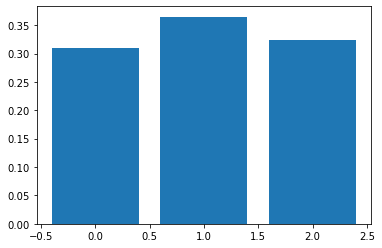

In [239]:
#xgboost
xgboost = XGBRegressor(max_depth = 6, alpha = 6) #max_depth=6, alpha = 6, gamma = 0.155)
xgboost.fit(train[['x_6']+['x_7']+['x_10']],train['y'])

# get importance
importance = xgboost.feature_importances_
# summarize feature importance
for a,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (a,v))
# plot feature importance
pyplot.bar([xy for xy in range(len(importance))], importance)
pyplot.show()


In [240]:
#FOR XGBOOST
c = 0
for element in range(len(test['y'])):
    predict1=xgboost.predict(x_test)
    #predict1=model.predict(new[['x']+['x_1']+['x_2']])
    print('predict: ' + str(predict1[element].reshape(1,-1)))
    print('x[element] 1: ' + str(((test.loc[element,'x_10']))))
    #print('x[element] 2: ' + str(((test.loc[element,'x_1']))))

    print('y[element]: ' + str((test['y'])[element]))
    
    value = (test['y'])[element]
    pred_value = (predict1[element].reshape(1,-1))[0][0]
    if ((pred_value <= 0.5) & (value == 0)):
        print('correct')
        c = c + 1
    elif ((pred_value >= 0.5) & (value == 1)):
        print('correct')
        c = c + 1
    else:
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(test['y'])
print((c/l)*100)

winsound.Beep(frequency, duration)

C:\Users\katya\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


predict: [[0.20498383]]
x[element] 1: 6.656238888888887
y[element]: 1
wrong
********
predict: [[0.8063101]]
x[element] 1: 10.222550458715595
y[element]: 1
correct
********
predict: [[0.7072334]]
x[element] 1: 9.411168478260867
y[element]: 1
correct
********
predict: [[0.47398803]]
x[element] 1: 8.982632782101167
y[element]: 1
wrong
********
predict: [[0.57435894]]
x[element] 1: 8.077067237222757
y[element]: 1
correct
********
predict: [[0.57435894]]
x[element] 1: 8.077067237222757
y[element]: 1
correct
********
predict: [[0.5594196]]
x[element] 1: 8.006843949044585
y[element]: 1
correct
********
predict: [[0.56364506]]
x[element] 1: 10.992746031746032
y[element]: 1
correct
********
predict: [[0.61558324]]
x[element] 1: 9.922303030303027
y[element]: 1
correct
********
predict: [[0.61558324]]
x[element] 1: 9.922303030303027
y[element]: 1
correct
********
predict: [[0.23013392]]
x[element] 1: 7.516584699453551
y[element]: 1
wrong
********
predict: [[0.48699883]]
x[element] 1: 7.4462120946

predict: [[0.891749]]
x[element] 1: 8.16103007518797
y[element]: 1
correct
********
predict: [[0.89136136]]
x[element] 1: 7.992643083555218
y[element]: 1
correct
********
predict: [[0.89136136]]
x[element] 1: 7.992643083555218
y[element]: 1
correct
********
predict: [[0.89136136]]
x[element] 1: 7.992643083555218
y[element]: 1
correct
********
predict: [[0.89136136]]
x[element] 1: 7.992643083555218
y[element]: 1
correct
********
predict: [[0.945827]]
x[element] 1: 9.571443487171699
y[element]: 1
correct
********
predict: [[0.6348524]]
x[element] 1: 8.6813670995671
y[element]: 1
correct
********
predict: [[0.05367125]]
x[element] 1: 8.372630177514793
y[element]: 1
wrong
********
predict: [[0.9063594]]
x[element] 1: 8.723327360774817
y[element]: 1
correct
********
predict: [[0.9063594]]
x[element] 1: 8.723327360774817
y[element]: 1
correct
********
predict: [[0.85618854]]
x[element] 1: 8.6625960591133
y[element]: 1
correct
********
predict: [[0.79757047]]
x[element] 1: 7.9813788819875775


predict: [[0.9372305]]
x[element] 1: 8.122072080155526
y[element]: 1
correct
********
predict: [[0.98118395]]
x[element] 1: 8.420927467773263
y[element]: 1
correct
********
predict: [[0.98118395]]
x[element] 1: 8.420927467773263
y[element]: 1
correct
********
predict: [[0.8450054]]
x[element] 1: 8.606045454545454
y[element]: 1
correct
********
predict: [[0.641607]]
x[element] 1: 8.631880434782609
y[element]: 1
correct
********
predict: [[0.97280675]]
x[element] 1: 9.854273556231002
y[element]: 1
correct
********
predict: [[1.0014384]]
x[element] 1: 8.522342889908256
y[element]: 1
correct
********
predict: [[0.92701733]]
x[element] 1: 8.729069268829026
y[element]: 1
correct
********
predict: [[0.84555644]]
x[element] 1: 8.674377366089407
y[element]: 1
correct
********
predict: [[0.77301323]]
x[element] 1: 8.756
y[element]: 1
correct
********
predict: [[0.77301323]]
x[element] 1: 8.756
y[element]: 1
correct
********
predict: [[0.93303657]]
x[element] 1: 8.823417344173441
y[element]: 1
co

predict: [[0.28184912]]
x[element] 1: 7.149589961880557
y[element]: 1
wrong
********
predict: [[0.28184912]]
x[element] 1: 7.149589961880557
y[element]: 1
wrong
********
predict: [[0.8257285]]
x[element] 1: 10.236529411764703
y[element]: 1
correct
********
predict: [[0.9900514]]
x[element] 1: 8.282361771666856
y[element]: 1
correct
********
predict: [[0.9900514]]
x[element] 1: 8.282361771666856
y[element]: 1
correct
********
predict: [[0.9900514]]
x[element] 1: 8.282361771666856
y[element]: 1
correct
********
predict: [[0.77911127]]
x[element] 1: 8.267122607655503
y[element]: 1
correct
********
predict: [[0.9796035]]
x[element] 1: 8.469666123165684
y[element]: 1
correct
********
predict: [[0.359671]]
x[element] 1: 7.545464994775338
y[element]: 1
wrong
********
predict: [[0.9127611]]
x[element] 1: 8.092569071685837
y[element]: 1
correct
********
predict: [[0.5414026]]
x[element] 1: 9.138042016806724
y[element]: 1
correct
********
predict: [[0.5414026]]
x[element] 1: 9.138042016806724
y[

predict: [[0.93294185]]
x[element] 1: 8.379923333675668
y[element]: 1
correct
********
predict: [[0.5648798]]
x[element] 1: 9.395681297709922
y[element]: 1
correct
********
predict: [[0.8106751]]
x[element] 1: 8.5565
y[element]: 1
correct
********
predict: [[0.8098938]]
x[element] 1: 8.319142857142856
y[element]: 1
correct
********
predict: [[0.9308592]]
x[element] 1: 8.554924277907883
y[element]: 1
correct
********
predict: [[0.6061549]]
x[element] 1: 7.330969488939741
y[element]: 1
correct
********
predict: [[0.9315441]]
x[element] 1: 9.614032258064515
y[element]: 1
correct
********
predict: [[0.9016481]]
x[element] 1: 8.507944018186985
y[element]: 1
correct
********
predict: [[0.9016481]]
x[element] 1: 8.507944018186985
y[element]: 1
correct
********
predict: [[0.9645873]]
x[element] 1: 8.432197741192336
y[element]: 1
correct
********
predict: [[0.34067342]]
x[element] 1: 6.8195896103896105
y[element]: 1
wrong
********
predict: [[0.5498682]]
x[element] 1: 8.94298316831683
y[element]

predict: [[0.04396772]]
x[element] 1: 10.042564935064933
y[element]: 1
wrong
********
predict: [[0.17789274]]
x[element] 1: 9.13103623188406
y[element]: 1
wrong
********
predict: [[0.17789274]]
x[element] 1: 9.13103623188406
y[element]: 1
wrong
********
predict: [[0.17789274]]
x[element] 1: 9.13103623188406
y[element]: 1
wrong
********
predict: [[0.9780436]]
x[element] 1: 8.420454545454545
y[element]: 1
correct
********
predict: [[0.9916968]]
x[element] 1: 8.434540930979132
y[element]: 1
correct
********
predict: [[1.010565]]
x[element] 1: 8.392645010070142
y[element]: 1
correct
********
predict: [[1.010565]]
x[element] 1: 8.392645010070142
y[element]: 1
correct
********
predict: [[0.01347296]]
x[element] 1: 14.000166666666665
y[element]: 1
wrong
********
predict: [[0.9317434]]
x[element] 1: 8.59976501291287
y[element]: 1
correct
********
predict: [[0.8949284]]
x[element] 1: 9.227224794238683
y[element]: 1
correct
********
predict: [[0.6348436]]
x[element] 1: 9.754571428571428
y[elemen

predict: [[0.03704904]]
x[element] 1: 9.684
y[element]: 1
wrong
********
predict: [[0.9436563]]
x[element] 1: 9.47770588235294
y[element]: 1
correct
********
predict: [[0.90722513]]
x[element] 1: 9.256165432098765
y[element]: 1
correct
********
predict: [[0.4175617]]
x[element] 1: 7.508989659264282
y[element]: 1
wrong
********
predict: [[0.54999447]]
x[element] 1: 8.411944408532642
y[element]: 1
correct
********
predict: [[0.9088962]]
x[element] 1: 9.513473684210526
y[element]: 1
correct
********
predict: [[0.48514888]]
x[element] 1: 10.39733126293996
y[element]: 1
wrong
********
predict: [[0.25901183]]
x[element] 1: 6.50441750376695
y[element]: 1
wrong
********
predict: [[0.25901183]]
x[element] 1: 6.50441750376695
y[element]: 1
wrong
********
predict: [[0.9122685]]
x[element] 1: 9.539776098581724
y[element]: 1
correct
********
predict: [[0.5720491]]
x[element] 1: 8.90158420502092
y[element]: 1
correct
********
predict: [[0.5720491]]
x[element] 1: 8.90158420502092
y[element]: 1
correc

correct
********
predict: [[0.4012688]]
x[element] 1: 7.533743784732377
y[element]: 1
wrong
********
predict: [[0.42570424]]
x[element] 1: 7.291011709601872
y[element]: 1
wrong
********
predict: [[0.42570424]]
x[element] 1: 7.291011709601872
y[element]: 1
wrong
********
predict: [[0.9344983]]
x[element] 1: 8.589489758643182
y[element]: 1
correct
********
predict: [[0.9246699]]
x[element] 1: 9.207430769230767
y[element]: 1
correct
********
predict: [[0.9163476]]
x[element] 1: 9.296816091954025
y[element]: 1
correct
********
predict: [[0.8138854]]
x[element] 1: 9.039138047138048
y[element]: 1
correct
********
predict: [[0.9311841]]
x[element] 1: 8.888412935323382
y[element]: 1
correct
********
predict: [[0.56135726]]
x[element] 1: 8.517084701815039
y[element]: 1
correct
********
predict: [[0.9511911]]
x[element] 1: 9.460699693564859
y[element]: 1
correct
********
predict: [[0.9712125]]
x[element] 1: 9.721366204465335
y[element]: 1
correct
********
predict: [[0.81497276]]
x[element] 1: 8.

predict: [[0.9450883]]
x[element] 1: 9.06295744680851
y[element]: 1
correct
********
predict: [[0.9579238]]
x[element] 1: 8.594457680250782
y[element]: 1
correct
********
predict: [[0.94872147]]
x[element] 1: 9.119662486235164
y[element]: 1
correct
********
predict: [[0.88359356]]
x[element] 1: 8.364280032467532
y[element]: 1
correct
********
predict: [[0.70356715]]
x[element] 1: 7.668930214723924
y[element]: 1
correct
********
predict: [[0.7925488]]
x[element] 1: 9.3532875
y[element]: 1
correct
********
predict: [[0.67176175]]
x[element] 1: 26.022552238805968
y[element]: 1
correct
********
predict: [[0.8574427]]
x[element] 1: 8.159665445665446
y[element]: 1
correct
********
predict: [[0.8502377]]
x[element] 1: 8.424633540372671
y[element]: 1
correct
********
predict: [[0.31673223]]
x[element] 1: 7.503349505840073
y[element]: 1
wrong
********
predict: [[0.74127984]]
x[element] 1: 8.19050727953411
y[element]: 1
correct
********
predict: [[0.6899061]]
x[element] 1: 8.041793103448276
y[el

predict: [[0.5070057]]
x[element] 1: 7.622222222222222
y[element]: 1
correct
********
predict: [[0.550286]]
x[element] 1: 7.949433191940615
y[element]: 1
correct
********
predict: [[0.94139105]]
x[element] 1: 8.72951282051282
y[element]: 1
correct
********
predict: [[0.6038188]]
x[element] 1: 9.489494708994707
y[element]: 1
correct
********
predict: [[0.6038188]]
x[element] 1: 9.489494708994707
y[element]: 1
correct
********
predict: [[0.6038188]]
x[element] 1: 9.489494708994707
y[element]: 1
correct
********
predict: [[0.7929129]]
x[element] 1: 7.943866465863452
y[element]: 1
correct
********
predict: [[0.7929129]]
x[element] 1: 7.943866465863452
y[element]: 1
correct
********
predict: [[0.8811075]]
x[element] 1: 8.95304481792717
y[element]: 1
correct
********
predict: [[0.54835534]]
x[element] 1: 9.71279609929078
y[element]: 1
correct
********
predict: [[0.12402119]]
x[element] 1: 9.45892257785467
y[element]: 1
wrong
********
predict: [[0.7171009]]
x[element] 1: 8.06210825596817
y[el

predict: [[0.8793933]]
x[element] 1: 8.634749622926094
y[element]: 1
correct
********
predict: [[0.40452036]]
x[element] 1: 9.7075
y[element]: 1
wrong
********
predict: [[0.40452036]]
x[element] 1: 9.7075
y[element]: 1
wrong
********
predict: [[0.40452036]]
x[element] 1: 9.7075
y[element]: 1
wrong
********
predict: [[0.77072704]]
x[element] 1: 7.908124708624707
y[element]: 1
correct
********
predict: [[0.96811855]]
x[element] 1: 8.369626768519016
y[element]: 1
correct
********
predict: [[0.4681015]]
x[element] 1: 7.396239707579838
y[element]: 1
wrong
********
predict: [[0.817043]]
x[element] 1: 9.736465474416294
y[element]: 1
correct
********
predict: [[0.78260314]]
x[element] 1: 9.8245
y[element]: 1
correct
********
predict: [[0.771789]]
x[element] 1: 8.334679946879149
y[element]: 1
correct
********
predict: [[0.92797077]]
x[element] 1: 10.293334342822533
y[element]: 1
correct
********
predict: [[0.91121596]]
x[element] 1: 8.84597595473833
y[element]: 1
correct
********
predict: [[0.9

predict: [[0.9017173]]
x[element] 1: 7.8239747650539515
y[element]: 1
correct
********
predict: [[0.9017173]]
x[element] 1: 7.8239747650539515
y[element]: 1
correct
********
predict: [[0.2862587]]
x[element] 1: 6.749719367588932
y[element]: 1
wrong
********
predict: [[0.7107858]]
x[element] 1: 7.923791101055808
y[element]: 1
correct
********
predict: [[0.9745799]]
x[element] 1: 8.717067519545129
y[element]: 1
correct
********
predict: [[0.520059]]
x[element] 1: 7.454272208121827
y[element]: 1
correct
********
predict: [[0.69239146]]
x[element] 1: 7.803666618167709
y[element]: 1
correct
********
predict: [[0.69239146]]
x[element] 1: 7.803666618167709
y[element]: 1
correct
********
predict: [[0.69239146]]
x[element] 1: 7.803666618167709
y[element]: 1
correct
********
predict: [[0.7372876]]
x[element] 1: 11.553068627450983
y[element]: 1
correct
********
predict: [[0.6697118]]
x[element] 1: 7.63614697960754
y[element]: 1
correct
********
predict: [[0.6697118]]
x[element] 1: 7.6361469796075

predict: [[0.22966436]]
x[element] 1: 7.196955223880598
y[element]: 1
wrong
********
predict: [[0.8399119]]
x[element] 1: 8.717067519545129
y[element]: 1
correct
********
predict: [[0.8399119]]
x[element] 1: 8.717067519545129
y[element]: 1
correct
********
predict: [[0.9381618]]
x[element] 1: 8.415135802469136
y[element]: 1
correct
********
predict: [[0.43014213]]
x[element] 1: 7.559817093175853
y[element]: 1
wrong
********
predict: [[0.7260669]]
x[element] 1: 8.242803245436107
y[element]: 1
correct
********
predict: [[0.5821246]]
x[element] 1: 7.929277777777778
y[element]: 1
correct
********
predict: [[0.5821246]]
x[element] 1: 7.929277777777778
y[element]: 1
correct
********
predict: [[0.7931338]]
x[element] 1: 8.964142857142857
y[element]: 1
correct
********
predict: [[0.56453866]]
x[element] 1: 7.431983748645719
y[element]: 1
correct
********
predict: [[0.8652765]]
x[element] 1: 8.130166211180125
y[element]: 1
correct
********
predict: [[0.39455104]]
x[element] 1: 7.733498360655737

predict: [[0.9443753]]
x[element] 1: 8.714420634920634
y[element]: 1
correct
********
predict: [[0.8072119]]
x[element] 1: 8.680881750465549
y[element]: 1
correct
********
predict: [[0.63679016]]
x[element] 1: 8.86110686514108
y[element]: 1
correct
********
predict: [[0.5255277]]
x[element] 1: 7.669390852390852
y[element]: 1
correct
********
predict: [[0.93922174]]
x[element] 1: 9.45090476190476
y[element]: 1
correct
********
predict: [[0.67295635]]
x[element] 1: 7.875662337662338
y[element]: 1
correct
********
predict: [[0.67295635]]
x[element] 1: 7.875662337662338
y[element]: 1
correct
********
predict: [[0.7608129]]
x[element] 1: 8.016445705718569
y[element]: 1
correct
********
predict: [[0.06933296]]
x[element] 1: 9.619963963963963
y[element]: 1
wrong
********
predict: [[0.89934206]]
x[element] 1: 9.394940348525466
y[element]: 1
correct
********
predict: [[0.9783917]]
x[element] 1: 8.891545454545453
y[element]: 1
correct
********
predict: [[0.92069864]]
x[element] 1: 8.420854838709

x[element] 1: 9.85285714285714
y[element]: 1
correct
********
predict: [[0.28698716]]
x[element] 1: 7.458878074866309
y[element]: 1
wrong
********
predict: [[0.28698716]]
x[element] 1: 7.458878074866309
y[element]: 1
wrong
********
predict: [[0.3281475]]
x[element] 1: 7.3348325988932155
y[element]: 1
wrong
********
predict: [[0.46227914]]
x[element] 1: 8.34002958801498
y[element]: 1
wrong
********
predict: [[0.9604962]]
x[element] 1: 8.149703703703704
y[element]: 1
correct
********
predict: [[0.62829274]]
x[element] 1: 9.818766666666667
y[element]: 1
correct
********
predict: [[0.8824679]]
x[element] 1: 9.028833820605778
y[element]: 1
correct
********
predict: [[0.80847114]]
x[element] 1: 9.55410983815239
y[element]: 1
correct
********
predict: [[0.43565205]]
x[element] 1: 8.739138217982545
y[element]: 1
wrong
********
predict: [[0.9704955]]
x[element] 1: 7.969310303687634
y[element]: 1
correct
********
predict: [[1.0498064]]
x[element] 1: 8.576938967136151
y[element]: 1
correct
******

predict: [[0.82718784]]
x[element] 1: 10.142815850815849
y[element]: 1
correct
********
predict: [[0.82718784]]
x[element] 1: 10.142815850815849
y[element]: 1
correct
********
predict: [[0.7866045]]
x[element] 1: 8.523
y[element]: 1
correct
********
predict: [[0.72272974]]
x[element] 1: 7.966551156812337
y[element]: 1
correct
********
predict: [[0.72272974]]
x[element] 1: 7.966551156812337
y[element]: 1
correct
********
predict: [[0.72272974]]
x[element] 1: 7.966551156812337
y[element]: 1
correct
********
predict: [[0.92093766]]
x[element] 1: 8.913587360826023
y[element]: 1
correct
********
predict: [[0.73479664]]
x[element] 1: 9.350927135678393
y[element]: 1
correct
********
predict: [[0.26621506]]
x[element] 1: 6.5533787878787875
y[element]: 1
wrong
********
predict: [[0.9497237]]
x[element] 1: 8.121327091633466
y[element]: 1
correct
********
predict: [[0.86189425]]
x[element] 1: 8.952596613912402
y[element]: 1
correct
********
predict: [[0.6390836]]
x[element] 1: 7.537786525974027
y

predict: [[0.66813534]]
x[element] 1: 8.784837423312883
y[element]: 1
correct
********
predict: [[0.17451084]]
x[element] 1: 7.339006014375824
y[element]: 1
wrong
********
predict: [[0.17451084]]
x[element] 1: 7.339006014375824
y[element]: 1
wrong
********
predict: [[0.7303661]]
x[element] 1: 8.187385514018693
y[element]: 1
correct
********
predict: [[0.7303661]]
x[element] 1: 8.187385514018693
y[element]: 1
correct
********
predict: [[0.85462606]]
x[element] 1: 9.223196702002356
y[element]: 1
correct
********
predict: [[0.85462606]]
x[element] 1: 9.223196702002356
y[element]: 1
correct
********
predict: [[1.000346]]
x[element] 1: 8.921078504672899
y[element]: 1
correct
********
predict: [[0.87269074]]
x[element] 1: 8.534915649546827
y[element]: 1
correct
********
predict: [[0.93980455]]
x[element] 1: 8.796803547671841
y[element]: 1
correct
********
predict: [[0.8175344]]
x[element] 1: 8.632288262497246
y[element]: 1
correct
********
predict: [[0.8175344]]
x[element] 1: 8.6322882624972

predict: [[0.1244766]]
x[element] 1: 6.328511649154863
y[element]: 1
wrong
********
predict: [[0.88360244]]
x[element] 1: 8.457923853923852
y[element]: 1
correct
********
predict: [[0.88360244]]
x[element] 1: 8.457923853923852
y[element]: 1
correct
********
predict: [[0.75055385]]
x[element] 1: 8.656808825214899
y[element]: 1
correct
********
predict: [[0.7612991]]
x[element] 1: 9.464504372657505
y[element]: 1
correct
********
predict: [[0.7612991]]
x[element] 1: 9.464504372657505
y[element]: 1
correct
********
predict: [[0.7612991]]
x[element] 1: 9.464504372657505
y[element]: 1
correct
********
predict: [[0.93331623]]
x[element] 1: 8.541797101449275
y[element]: 1
correct
********
predict: [[0.04426704]]
x[element] 1: 5.630556837979095
y[element]: 1
wrong
********
predict: [[0.04426704]]
x[element] 1: 5.630556837979095
y[element]: 1
wrong
********
predict: [[0.7359384]]
x[element] 1: 7.833722222222222
y[element]: 1
correct
********
predict: [[0.951194]]
x[element] 1: 8.866571428571428


predict: [[0.89475375]]
x[element] 1: 8.12890317501968
y[element]: 1
correct
********
predict: [[0.52732164]]
x[element] 1: 7.64258620689655
y[element]: 1
correct
********
predict: [[0.9143656]]
x[element] 1: 8.00977988354835
y[element]: 1
correct
********
predict: [[0.95775306]]
x[element] 1: 8.756063568773234
y[element]: 1
correct
********
predict: [[0.1387171]]
x[element] 1: 8.456117647058822
y[element]: 1
wrong
********
predict: [[0.86482674]]
x[element] 1: 8.639795008912655
y[element]: 1
correct
********
predict: [[0.81184334]]
x[element] 1: 8.333827777777778
y[element]: 1
correct
********
predict: [[0.71176666]]
x[element] 1: 7.629675732455144
y[element]: 1
correct
********
predict: [[0.59576005]]
x[element] 1: 7.814461070559611
y[element]: 1
correct
********
predict: [[0.59576005]]
x[element] 1: 7.814461070559611
y[element]: 1
correct
********
predict: [[0.59576005]]
x[element] 1: 7.814461070559611
y[element]: 1
correct
********
predict: [[0.7626724]]
x[element] 1: 8.42991291469

predict: [[0.9799377]]
x[element] 1: 8.807823220258003
y[element]: 1
correct
********
predict: [[0.79975086]]
x[element] 1: 8.201137331594957
y[element]: 1
correct
********
predict: [[0.98180664]]
x[element] 1: 9.202664805203337
y[element]: 1
correct
********
predict: [[0.91399205]]
x[element] 1: 8.566309784528437
y[element]: 1
correct
********
predict: [[0.75319284]]
x[element] 1: 8.237861003861003
y[element]: 1
correct
********
predict: [[0.75114655]]
x[element] 1: 7.885507042253519
y[element]: 1
correct
********
predict: [[0.93876845]]
x[element] 1: 8.738460554371002
y[element]: 1
correct
********
predict: [[0.8304592]]
x[element] 1: 8.30937593283582
y[element]: 1
correct
********
predict: [[0.24497963]]
x[element] 1: 6.970545454545455
y[element]: 1
wrong
********
predict: [[0.53392595]]
x[element] 1: 7.885476891152612
y[element]: 1
correct
********
predict: [[0.53392595]]
x[element] 1: 7.885476891152612
y[element]: 1
correct
********
predict: [[0.8925464]]
x[element] 1: 8.103571428

predict: [[0.57554257]]
x[element] 1: 9.377567645469282
y[element]: 1
correct
********
predict: [[0.943783]]
x[element] 1: 8.458088435374151
y[element]: 1
correct
********
predict: [[0.943783]]
x[element] 1: 8.458088435374151
y[element]: 1
correct
********
predict: [[0.30548927]]
x[element] 1: 7.805513593699429
y[element]: 1
wrong
********
predict: [[0.76533]]
x[element] 1: 8.84000974025974
y[element]: 1
correct
********
predict: [[0.22937702]]
x[element] 1: 6.951220187793428
y[element]: 1
wrong
********
predict: [[0.22937702]]
x[element] 1: 6.951220187793428
y[element]: 1
wrong
********
predict: [[0.7655484]]
x[element] 1: 8.642048800661701
y[element]: 1
correct
********
predict: [[0.63899183]]
x[element] 1: 8.787810371517027
y[element]: 1
correct
********
predict: [[0.6243373]]
x[element] 1: 9.332895150720839
y[element]: 1
correct
********
predict: [[0.6495154]]
x[element] 1: 7.7847857142857135
y[element]: 1
correct
********
predict: [[0.6495154]]
x[element] 1: 7.7847857142857135
y[e

predict: [[0.6605992]]
x[element] 1: 8.307696202531645
y[element]: 1
correct
********
predict: [[0.41557327]]
x[element] 1: 8.679941770647654
y[element]: 1
wrong
********
predict: [[0.967489]]
x[element] 1: 9.05141220481646
y[element]: 1
correct
********
predict: [[0.42827508]]
x[element] 1: 8.434752747252746
y[element]: 1
wrong
********
predict: [[0.42827508]]
x[element] 1: 8.434752747252746
y[element]: 1
wrong
********
predict: [[0.61730564]]
x[element] 1: 9.21115343915344
y[element]: 1
correct
********
predict: [[0.91951406]]
x[element] 1: 8.590820905587668
y[element]: 1
correct
********
predict: [[0.13395222]]
x[element] 1: 9.650825396825397
y[element]: 1
wrong
********
predict: [[0.37815025]]
x[element] 1: 7.370977095393907
y[element]: 1
wrong
********
predict: [[0.37815025]]
x[element] 1: 7.370977095393907
y[element]: 1
wrong
********
predict: [[0.76045924]]
x[element] 1: 9.03369458128079
y[element]: 1
correct
********
predict: [[0.8187838]]
x[element] 1: 8.064959222252227
y[elem

predict: [[0.947416]]
x[element] 1: 9.263645208779444
y[element]: 1
correct
********
predict: [[0.660706]]
x[element] 1: 8.38212295081967
y[element]: 1
correct
********
predict: [[0.7328189]]
x[element] 1: 8.644317585301836
y[element]: 1
correct
********
predict: [[0.88466674]]
x[element] 1: 8.58869251396648
y[element]: 1
correct
********
predict: [[0.88466674]]
x[element] 1: 8.58869251396648
y[element]: 1
correct
********
predict: [[0.93346024]]
x[element] 1: 9.696230769230768
y[element]: 1
correct
********
predict: [[0.84879154]]
x[element] 1: 8.906729338842975
y[element]: 1
correct
********
predict: [[1.0036371]]
x[element] 1: 8.749845122430273
y[element]: 1
correct
********
predict: [[0.71778864]]
x[element] 1: 8.155016996835071
y[element]: 1
correct
********
predict: [[0.7198203]]
x[element] 1: 8.530662234042552
y[element]: 1
correct
********
predict: [[0.16654445]]
x[element] 1: 7.313349245349245
y[element]: 1
wrong
********
predict: [[1.0338863]]
x[element] 1: 8.219328620394172


x[element] 1: 7.630737768240343
y[element]: 1
correct
********
predict: [[1.0077351]]
x[element] 1: 8.189410256410255
y[element]: 1
correct
********
predict: [[0.1311905]]
x[element] 1: 8.071001342281878
y[element]: 1
wrong
********
predict: [[0.8585019]]
x[element] 1: 9.621597116585312
y[element]: 1
correct
********
predict: [[0.9229894]]
x[element] 1: 8.378723483483483
y[element]: 1
correct
********
predict: [[0.55684376]]
x[element] 1: 7.8767999999999985
y[element]: 1
correct
********
predict: [[0.7873295]]
x[element] 1: 7.968863636363636
y[element]: 1
correct
********
predict: [[0.22020505]]
x[element] 1: 11.066229007633586
y[element]: 1
wrong
********
predict: [[0.22020505]]
x[element] 1: 11.066229007633586
y[element]: 1
wrong
********
predict: [[0.96658546]]
x[element] 1: 8.566672911787665
y[element]: 1
correct
********
predict: [[0.96658546]]
x[element] 1: 8.566672911787665
y[element]: 1
correct
********
predict: [[0.2564332]]
x[element] 1: 7.420004567755033
y[element]: 1
wrong


predict: [[0.9346377]]
x[element] 1: 8.595629629629629
y[element]: 1
correct
********
predict: [[0.95282567]]
x[element] 1: 8.036993808920784
y[element]: 1
correct
********
predict: [[0.72527343]]
x[element] 1: 8.089629455772334
y[element]: 1
correct
********
predict: [[0.8548339]]
x[element] 1: 8.175691548068544
y[element]: 1
correct
********
predict: [[0.4025261]]
x[element] 1: 8.805451718494274
y[element]: 1
wrong
********
predict: [[0.4025261]]
x[element] 1: 8.805451718494274
y[element]: 1
wrong
********
predict: [[0.9568817]]
x[element] 1: 9.446643964807901
y[element]: 1
correct
********
predict: [[0.54308313]]
x[element] 1: 7.875851674641148
y[element]: 1
correct
********
predict: [[0.54308313]]
x[element] 1: 7.875851674641148
y[element]: 1
correct
********
predict: [[0.5002135]]
x[element] 1: 7.370136764132552
y[element]: 1
correct
********
predict: [[0.5002135]]
x[element] 1: 7.370136764132552
y[element]: 1
correct
********
predict: [[0.5002135]]
x[element] 1: 7.370136764132552

correct
********
predict: [[0.92686826]]
x[element] 1: 9.8547572815534
y[element]: 1
correct
********
predict: [[0.46979886]]
x[element] 1: 7.398851351351353
y[element]: 1
wrong
********
predict: [[0.959161]]
x[element] 1: 8.169986394557823
y[element]: 1
correct
********
predict: [[0.8944971]]
x[element] 1: 8.780190476190475
y[element]: 1
correct
********
predict: [[0.8944971]]
x[element] 1: 8.780190476190475
y[element]: 1
correct
********
predict: [[0.7114274]]
x[element] 1: 9.49716643550624
y[element]: 1
correct
********
predict: [[0.9927688]]
x[element] 1: 8.439759292035399
y[element]: 1
correct
********
predict: [[0.6816834]]
x[element] 1: 8.218855072463768
y[element]: 1
correct
********
predict: [[1.0432628]]
x[element] 1: 8.57975808080808
y[element]: 1
correct
********
predict: [[0.5370208]]
x[element] 1: 8.031898550724637
y[element]: 1
correct
********
predict: [[0.84056824]]
x[element] 1: 8.500130952380951
y[element]: 1
correct
********
predict: [[0.84056824]]
x[element] 1: 8.5

predict: [[0.90909487]]
x[element] 1: 8.035228482003129
y[element]: 1
correct
********
predict: [[0.9332875]]
x[element] 1: 8.394496021220156
y[element]: 1
correct
********
predict: [[0.88947165]]
x[element] 1: 8.3239
y[element]: 1
correct
********
predict: [[0.7712426]]
x[element] 1: 8.430217948717948
y[element]: 1
correct
********
predict: [[0.8330265]]
x[element] 1: 8.200513071895424
y[element]: 1
correct
********
predict: [[0.963473]]
x[element] 1: 8.281275252525251
y[element]: 1
correct
********
predict: [[0.1416658]]
x[element] 1: 7.895913043478261
y[element]: 1
wrong
********
predict: [[0.95497906]]
x[element] 1: 8.876167338709678
y[element]: 1
correct
********
predict: [[0.82571745]]
x[element] 1: 7.7795845410628015
y[element]: 1
correct
********
predict: [[0.82571745]]
x[element] 1: 7.7795845410628015
y[element]: 1
correct
********
predict: [[0.03373996]]
x[element] 1: 8.928642316258351
y[element]: 1
wrong
********
predict: [[0.35316372]]
x[element] 1: 9.261481092436977
y[elem

predict: [[0.50412446]]
x[element] 1: 7.579496607869741
y[element]: 1
correct
********
predict: [[0.6994616]]
x[element] 1: 8.757695717131474
y[element]: 1
correct
********
predict: [[0.6994616]]
x[element] 1: 8.757695717131474
y[element]: 1
correct
********
predict: [[0.6645712]]
x[element] 1: 9.185546489563569
y[element]: 1
correct
********
predict: [[0.68650174]]
x[element] 1: 8.391470779220779
y[element]: 1
correct
********
predict: [[0.95619863]]
x[element] 1: 9.160115853658537
y[element]: 1
correct
********
predict: [[0.83612806]]
x[element] 1: 9.649239784463402
y[element]: 1
correct
********
predict: [[0.91232324]]
x[element] 1: 7.803510786802031
y[element]: 1
correct
********
predict: [[0.91522145]]
x[element] 1: 8.858056306306306
y[element]: 1
correct
********
predict: [[0.5361308]]
x[element] 1: 7.990205273259924
y[element]: 1
correct
********
predict: [[0.44973677]]
x[element] 1: 7.243914731148584
y[element]: 1
wrong
********
predict: [[0.30135855]]
x[element] 1: 7.578915294

predict: [[0.7762733]]
x[element] 1: 8.954612903225806
y[element]: 1
correct
********
predict: [[0.210713]]
x[element] 1: 7.132384111384112
y[element]: 1
wrong
********
predict: [[0.8321942]]
x[element] 1: 8.658964972273568
y[element]: 1
correct
********
predict: [[0.718668]]
x[element] 1: 7.4710785073050525
y[element]: 1
correct
********
predict: [[0.8724757]]
x[element] 1: 7.836685714285713
y[element]: 1
correct
********
predict: [[0.76122415]]
x[element] 1: 8.293152046783625
y[element]: 1
correct
********
predict: [[0.8300273]]
x[element] 1: 8.945850815850816
y[element]: 1
correct
********
predict: [[0.5519441]]
x[element] 1: 9.33836231884058
y[element]: 1
correct
********
predict: [[0.93361646]]
x[element] 1: 8.631495380241647
y[element]: 1
correct
********
predict: [[0.99173295]]
x[element] 1: 8.700221719457012
y[element]: 1
correct
********
predict: [[0.9409007]]
x[element] 1: 8.947572649572649
y[element]: 1
correct
********
predict: [[0.8460706]]
x[element] 1: 10.229541241890637

predict: [[0.39722574]]
x[element] 1: 7.539061776061776
y[element]: 1
wrong
********
predict: [[0.9724362]]
x[element] 1: 8.187450980392155
y[element]: 1
correct
********
predict: [[0.8234504]]
x[element] 1: 8.2022133190406
y[element]: 1
correct
********
predict: [[0.8234504]]
x[element] 1: 8.2022133190406
y[element]: 1
correct
********
predict: [[0.9048841]]
x[element] 1: 8.703999999999999
y[element]: 1
correct
********
predict: [[0.9572092]]
x[element] 1: 9.861504082059868
y[element]: 1
correct
********
predict: [[0.9572092]]
x[element] 1: 9.861504082059868
y[element]: 1
correct
********
predict: [[0.8616789]]
x[element] 1: 7.631228494623656
y[element]: 1
correct
********
predict: [[0.78559524]]
x[element] 1: 8.381045454545454
y[element]: 1
correct
********
predict: [[0.5622507]]
x[element] 1: 9.798081469358063
y[element]: 1
correct
********
predict: [[0.97957414]]
x[element] 1: 9.42371173762946
y[element]: 1
correct
********
predict: [[0.97957414]]
x[element] 1: 9.42371173762946
y[e

predict: [[0.7744844]]
x[element] 1: 7.924380952380952
y[element]: 1
correct
********
predict: [[0.9042372]]
x[element] 1: 8.449556603773585
y[element]: 1
correct
********
predict: [[1.025823]]
x[element] 1: 8.197930161943319
y[element]: 1
correct
********
predict: [[0.9324816]]
x[element] 1: 8.739827067669172
y[element]: 1
correct
********
predict: [[0.9106961]]
x[element] 1: 9.816886214030466
y[element]: 1
correct
********
predict: [[0.8042607]]
x[element] 1: 8.749835682886161
y[element]: 1
correct
********
predict: [[0.65286684]]
x[element] 1: 8.224834225931
y[element]: 1
correct
********
predict: [[0.6871576]]
x[element] 1: 8.850369672557171
y[element]: 1
correct
********
predict: [[0.786334]]
x[element] 1: 9.59653774834437
y[element]: 1
correct
********
predict: [[0.786334]]
x[element] 1: 9.59653774834437
y[element]: 1
correct
********
predict: [[0.69697815]]
x[element] 1: 8.757325791855202
y[element]: 1
correct
********
predict: [[0.8338314]]
x[element] 1: 8.293583975346689
y[ele

predict: [[0.74460286]]
x[element] 1: 7.951217812449213
y[element]: 1
correct
********
predict: [[0.74460286]]
x[element] 1: 7.951217812449213
y[element]: 1
correct
********
predict: [[0.78194636]]
x[element] 1: 8.192836996336997
y[element]: 1
correct
********
predict: [[0.8838304]]
x[element] 1: 7.9960960028551025
y[element]: 1
correct
********
predict: [[0.86665237]]
x[element] 1: 7.888367304860088
y[element]: 1
correct
********
predict: [[0.9223785]]
x[element] 1: 8.982736285626723
y[element]: 1
correct
********
predict: [[0.9223785]]
x[element] 1: 8.982736285626723
y[element]: 1
correct
********
predict: [[0.7298882]]
x[element] 1: 8.740807881773398
y[element]: 1
correct
********
predict: [[0.48995286]]
x[element] 1: 7.407549019607843
y[element]: 1
wrong
********
predict: [[0.6252729]]
x[element] 1: 7.6055747354497365
y[element]: 1
correct
********
predict: [[0.86257917]]
x[element] 1: 8.746334394904459
y[element]: 1
correct
********
predict: [[0.49880245]]
x[element] 1: 7.36891538

predict: [[0.6595313]]
x[element] 1: 9.518217687074829
y[element]: 1
correct
********
predict: [[0.766056]]
x[element] 1: 8.33023469387755
y[element]: 1
correct
********
predict: [[0.91195446]]
x[element] 1: 8.565731996885948
y[element]: 1
correct
********
predict: [[0.91195446]]
x[element] 1: 8.565731996885948
y[element]: 1
correct
********
predict: [[0.64575946]]
x[element] 1: 9.400229198456152
y[element]: 1
correct
********
predict: [[0.9648305]]
x[element] 1: 9.692212208398132
y[element]: 1
correct
********
predict: [[0.87330383]]
x[element] 1: 8.264771045576406
y[element]: 1
correct
********
predict: [[0.40964705]]
x[element] 1: 8.234124752475246
y[element]: 1
wrong
********
predict: [[0.5329792]]
x[element] 1: 7.4043753226639115
y[element]: 1
correct
********
predict: [[0.5329792]]
x[element] 1: 7.4043753226639115
y[element]: 1
correct
********
predict: [[0.92792183]]
x[element] 1: 9.349380025940338
y[element]: 1
correct
********
predict: [[0.92792183]]
x[element] 1: 9.3493800259

predict: [[0.6395208]]
x[element] 1: 7.9567999999999985
y[element]: 1
correct
********
predict: [[0.7443412]]
x[element] 1: 10.18998319327731
y[element]: 1
correct
********
predict: [[0.4349813]]
x[element] 1: 8.900136554621849
y[element]: 1
wrong
********
predict: [[0.96686363]]
x[element] 1: 9.334268459915613
y[element]: 1
correct
********
predict: [[0.7655241]]
x[element] 1: 8.492606837606838
y[element]: 1
correct
********
predict: [[0.49648088]]
x[element] 1: 10.527000000000001
y[element]: 1
wrong
********
predict: [[0.49648088]]
x[element] 1: 10.527000000000001
y[element]: 1
wrong
********
predict: [[0.06395873]]
x[element] 1: 18.238786516853928
y[element]: 1
wrong
********
predict: [[0.3221316]]
x[element] 1: 8.468222222222222
y[element]: 1
wrong
********
predict: [[0.7895097]]
x[element] 1: 8.165550895140665
y[element]: 1
correct
********
predict: [[0.9683707]]
x[element] 1: 8.691185185185184
y[element]: 1
correct
********
predict: [[0.6578919]]
x[element] 1: 7.9779360040567955


predict: [[0.46072048]]
x[element] 1: 7.3871654191616765
y[element]: 1
wrong
********
predict: [[0.46072048]]
x[element] 1: 7.3871654191616765
y[element]: 1
wrong
********
predict: [[0.77003753]]
x[element] 1: 8.148905518394647
y[element]: 1
correct
********
predict: [[0.89287144]]
x[element] 1: 8.493904761904764
y[element]: 1
correct
********
predict: [[0.89287144]]
x[element] 1: 8.493904761904764
y[element]: 1
correct
********
predict: [[0.30908173]]
x[element] 1: 9.020704160246533
y[element]: 1
wrong
********
predict: [[0.94476116]]
x[element] 1: 9.102360576923076
y[element]: 1
correct
********
predict: [[0.13495149]]
x[element] 1: 8.223119152691968
y[element]: 1
wrong
********
predict: [[0.13495149]]
x[element] 1: 8.223119152691968
y[element]: 1
wrong
********
predict: [[0.77373296]]
x[element] 1: 7.947801876438308
y[element]: 1
correct
********
predict: [[0.97068757]]
x[element] 1: 8.463778072788497
y[element]: 1
correct
********
predict: [[0.9536917]]
x[element] 1: 8.956654784240

predict: [[0.76490396]]
x[element] 1: 10.858369631901839
y[element]: 1
correct
********
predict: [[0.76490396]]
x[element] 1: 10.858369631901839
y[element]: 1
correct
********
predict: [[0.7199108]]
x[element] 1: 7.922318315665487
y[element]: 1
correct
********
predict: [[0.7103471]]
x[element] 1: 7.94520825787758
y[element]: 1
correct
********
predict: [[0.98502135]]
x[element] 1: 8.836730328495035
y[element]: 1
correct
********
predict: [[0.97916645]]
x[element] 1: 8.857680823680823
y[element]: 1
correct
********
predict: [[0.67506504]]
x[element] 1: 8.21028861662531
y[element]: 1
correct
********
predict: [[0.94203645]]
x[element] 1: 8.564333333333332
y[element]: 1
correct
********
predict: [[0.18922721]]
x[element] 1: 7.447217391304347
y[element]: 1
wrong
********
predict: [[0.28223827]]
x[element] 1: 9.223326898326896
y[element]: 1
wrong
********
predict: [[0.967489]]
x[element] 1: 9.139666666666667
y[element]: 1
correct
********
predict: [[0.17007214]]
x[element] 1: 6.97958904109

predict: [[0.8201124]]
x[element] 1: 8.788482442450253
y[element]: 1
correct
********
predict: [[0.8381189]]
x[element] 1: 8.515576923076923
y[element]: 1
correct
********
predict: [[0.980112]]
x[element] 1: 8.738641735228123
y[element]: 1
correct
********
predict: [[0.980112]]
x[element] 1: 8.738641735228123
y[element]: 1
correct
********
predict: [[0.5671365]]
x[element] 1: 7.9220801526717555
y[element]: 1
correct
********
predict: [[0.5671365]]
x[element] 1: 7.9220801526717555
y[element]: 1
correct
********
predict: [[0.47105432]]
x[element] 1: 7.047164815749621
y[element]: 1
wrong
********
predict: [[0.8301701]]
x[element] 1: 9.371054251112211
y[element]: 1
correct
********
predict: [[0.12630838]]
x[element] 1: 8.713877551020406
y[element]: 1
wrong
********
predict: [[0.6638124]]
x[element] 1: 8.084661764705881
y[element]: 1
correct
********
predict: [[0.79408866]]
x[element] 1: 10.181675675675676
y[element]: 1
correct
********
predict: [[0.79408866]]
x[element] 1: 10.1816756756756

predict: [[0.8662035]]
x[element] 1: 8.449594914251922
y[element]: 1
correct
********
predict: [[0.9745799]]
x[element] 1: 8.70903448275862
y[element]: 1
correct
********
predict: [[0.35528556]]
x[element] 1: 7.793365399841646
y[element]: 1
wrong
********
predict: [[0.9123995]]
x[element] 1: 8.396336987159412
y[element]: 1
correct
********
predict: [[0.8298919]]
x[element] 1: 8.92173482032218
y[element]: 1
correct
********
predict: [[0.81996506]]
x[element] 1: 8.99354497816594
y[element]: 1
correct
********
predict: [[0.9819824]]
x[element] 1: 9.129151949541283
y[element]: 1
correct
********
predict: [[0.9819824]]
x[element] 1: 9.129151949541283
y[element]: 1
correct
********
predict: [[0.5742594]]
x[element] 1: 8.28024251968504
y[element]: 1
correct
********
predict: [[0.9930476]]
x[element] 1: 8.714012970405554
y[element]: 1
correct
********
predict: [[0.8877889]]
x[element] 1: 8.629429824561402
y[element]: 1
correct
********
predict: [[0.8877889]]
x[element] 1: 8.629429824561402
y[e

predict: [[0.9550458]]
x[element] 1: 8.941454545454548
y[element]: 1
correct
********
predict: [[0.93312347]]
x[element] 1: 8.573659863945577
y[element]: 1
correct
********
predict: [[0.93312347]]
x[element] 1: 8.573659863945577
y[element]: 1
correct
********
predict: [[0.6425669]]
x[element] 1: 9.376275862068963
y[element]: 1
correct
********
predict: [[0.98171264]]
x[element] 1: 8.909281846025339
y[element]: 1
correct
********
predict: [[0.7839132]]
x[element] 1: 8.362884552845529
y[element]: 1
correct
********
predict: [[0.70102936]]
x[element] 1: 9.18272735760971
y[element]: 1
correct
********
predict: [[0.13399671]]
x[element] 1: 7.7573846153846135
y[element]: 1
wrong
********
predict: [[0.9521107]]
x[element] 1: 9.10644318181818
y[element]: 1
correct
********
predict: [[0.91323906]]
x[element] 1: 8.658031698564594
y[element]: 1
correct
********
predict: [[0.99795413]]
x[element] 1: 8.100176995418375
y[element]: 1
correct
********
predict: [[0.84721756]]
x[element] 1: 8.8064736842

predict: [[0.8863128]]
x[element] 1: 9.369871951219512
y[element]: 1
correct
********
predict: [[0.28644997]]
x[element] 1: 6.795505494505495
y[element]: 1
wrong
********
predict: [[0.3311131]]
x[element] 1: 7.617602279202279
y[element]: 1
wrong
********
predict: [[0.3311131]]
x[element] 1: 7.617602279202279
y[element]: 1
wrong
********
predict: [[0.3311131]]
x[element] 1: 7.617602279202279
y[element]: 1
wrong
********
predict: [[0.3311131]]
x[element] 1: 7.617602279202279
y[element]: 1
wrong
********
predict: [[0.824518]]
x[element] 1: 9.183919421487603
y[element]: 1
correct
********
predict: [[0.8996416]]
x[element] 1: 7.869153508771929
y[element]: 1
correct
********
predict: [[0.5401896]]
x[element] 1: 9.021343440014972
y[element]: 1
correct
********
predict: [[0.12095141]]
x[element] 1: 6.955391129032257
y[element]: 1
wrong
********
predict: [[0.95470065]]
x[element] 1: 8.177917050691244
y[element]: 1
correct
********
predict: [[0.3838643]]
x[element] 1: 7.166
y[element]: 1
wrong
*

predict: [[0.23909825]]
x[element] 1: 9.148302631578947
y[element]: 1
wrong
********
predict: [[0.38955578]]
x[element] 1: 8.818939393939393
y[element]: 1
wrong
********
predict: [[0.8754869]]
x[element] 1: 8.738457784532253
y[element]: 1
correct
********
predict: [[0.75408995]]
x[element] 1: 8.510307289484707
y[element]: 1
correct
********
predict: [[0.9095105]]
x[element] 1: 7.903249371818825
y[element]: 1
correct
********
predict: [[0.9764783]]
x[element] 1: 8.496419842710223
y[element]: 1
correct
********
predict: [[0.9815405]]
x[element] 1: 9.804974025974023
y[element]: 1
correct
********
predict: [[0.09304702]]
x[element] 1: 6.397084870964206
y[element]: 1
wrong
********
predict: [[0.09304702]]
x[element] 1: 6.397084870964206
y[element]: 1
wrong
********
predict: [[0.76394063]]
x[element] 1: 8.076018248175183
y[element]: 1
correct
********
predict: [[0.9642692]]
x[element] 1: 9.29995325203252
y[element]: 1
correct
********
predict: [[0.9720098]]
x[element] 1: 8.70101801136783
y[e

predict: [[0.21152242]]
x[element] 1: 11.292596074851662
y[element]: 0
correct
********
predict: [[0.00736686]]
x[element] 1: 10.914329431438127
y[element]: 0
correct
********
predict: [[0.37068367]]
x[element] 1: 8.329376489028213
y[element]: 0
correct
********
predict: [[0.27262843]]
x[element] 1: 9.037877459475991
y[element]: 0
correct
********
predict: [[0.89065945]]
x[element] 1: 9.209545654565456
y[element]: 0
wrong
********
predict: [[0.37005335]]
x[element] 1: 7.708962025316456
y[element]: 0
correct
********
predict: [[0.12317852]]
x[element] 1: 6.438158163265308
y[element]: 0
correct
********
predict: [[0.13571934]]
x[element] 1: 11.193819143819145
y[element]: 0
correct
********
predict: [[0.07899538]]
x[element] 1: 10.007529411764708
y[element]: 0
correct
********
predict: [[0.16719173]]
x[element] 1: 6.655066937119676
y[element]: 0
correct
********
predict: [[0.06908063]]
x[element] 1: 6.173326923076923
y[element]: 0
correct
********
predict: [[0.48528636]]
x[element] 1: 7.7

predict: [[0.22814639]]
x[element] 1: 6.9664720496894414
y[element]: 0
correct
********
predict: [[0.33837423]]
x[element] 1: 7.475450064850843
y[element]: 0
correct
********
predict: [[0.41944745]]
x[element] 1: 8.452751336898395
y[element]: 0
correct
********
predict: [[0.2766738]]
x[element] 1: 6.912331980519482
y[element]: 0
correct
********
predict: [[0.83066976]]
x[element] 1: 8.848922222222223
y[element]: 0
wrong
********
predict: [[0.10222124]]
x[element] 1: 5.771699999999999
y[element]: 0
correct
********
predict: [[0.6795485]]
x[element] 1: 8.17012567811935
y[element]: 0
wrong
********
predict: [[0.07586779]]
x[element] 1: 7.27432318501171
y[element]: 0
correct
********
predict: [[0.07586779]]
x[element] 1: 7.27432318501171
y[element]: 0
correct
********
predict: [[0.02150551]]
x[element] 1: 6.097988524590164
y[element]: 0
correct
********
predict: [[0.79012436]]
x[element] 1: 8.352600509987251
y[element]: 0
wrong
********
predict: [[0.15052164]]
x[element] 1: 7.0036352941176

predict: [[0.49850482]]
x[element] 1: 8.051915057915059
y[element]: 0
correct
********
predict: [[0.06158409]]
x[element] 1: 16.005848101265823
y[element]: 0
correct
********
predict: [[0.09453521]]
x[element] 1: 7.254233082706767
y[element]: 0
correct
********
predict: [[0.7432193]]
x[element] 1: 9.65249192546584
y[element]: 0
wrong
********
predict: [[0.09992792]]
x[element] 1: 6.2607193479801575
y[element]: 0
correct
********
predict: [[0.01426263]]
x[element] 1: 11.282586703601108
y[element]: 0
correct
********
predict: [[0.8006614]]
x[element] 1: 9.545089743589745
y[element]: 0
wrong
********
predict: [[0.32284477]]
x[element] 1: 8.386106159895151
y[element]: 0
correct
********
predict: [[0.34184694]]
x[element] 1: 8.084373177436753
y[element]: 0
correct
********
predict: [[0.22496323]]
x[element] 1: 7.199615837696335
y[element]: 0
correct
********
predict: [[0.14161274]]
x[element] 1: 8.968650632911393
y[element]: 0
correct
********
predict: [[0.00175535]]
x[element] 1: 11.323517

predict: [[0.02128873]]
x[element] 1: 18.307684210526315
y[element]: 0
correct
********
predict: [[0.03624019]]
x[element] 1: 9.320409666283084
y[element]: 0
correct
********
predict: [[0.08604839]]
x[element] 1: 6.637273488018257
y[element]: 0
correct
********
predict: [[0.7061512]]
x[element] 1: 7.541511936339521
y[element]: 0
wrong
********
predict: [[0.01176732]]
x[element] 1: 10.494998069498068
y[element]: 0
correct
********
predict: [[0.08096483]]
x[element] 1: 10.470628099173554
y[element]: 0
correct
********
predict: [[0.7911705]]
x[element] 1: 9.09593341869398
y[element]: 0
wrong
********
predict: [[0.14870028]]
x[element] 1: 7.4500650154798755
y[element]: 0
correct
********
predict: [[0.14870028]]
x[element] 1: 7.4500650154798755
y[element]: 0
correct
********
predict: [[0.9033109]]
x[element] 1: 8.685684623430962
y[element]: 0
wrong
********
predict: [[0.01118833]]
x[element] 1: 5.677147392290246
y[element]: 0
correct
********
predict: [[0.28517917]]
x[element] 1: 6.80709071

predict: [[0.05006292]]
x[element] 1: 6.179114974937344
y[element]: 0
correct
********
predict: [[0.00917003]]
x[element] 1: 11.288691907514448
y[element]: 0
correct
********
predict: [[0.00917003]]
x[element] 1: 11.288691907514448
y[element]: 0
correct
********
predict: [[-0.00463214]]
x[element] 1: 10.635235897435896
y[element]: 0
correct
********
predict: [[0.4215012]]
x[element] 1: 10.889293670886076
y[element]: 0
correct
********
predict: [[0.16994071]]
x[element] 1: 6.870443309499488
y[element]: 0
correct
********
predict: [[0.77715546]]
x[element] 1: 7.998192413646957
y[element]: 0
wrong
********
predict: [[0.5371116]]
x[element] 1: 7.184799999999999
y[element]: 0
wrong
********
predict: [[0.6366418]]
x[element] 1: 8.292437275985662
y[element]: 0
wrong
********
predict: [[0.35993195]]
x[element] 1: 10.01030698254364
y[element]: 0
correct
********
predict: [[0.37480634]]
x[element] 1: 8.527697308319738
y[element]: 0
correct
********
predict: [[0.37480634]]
x[element] 1: 8.5276973

predict: [[0.07404662]]
x[element] 1: 5.7811578947368405
y[element]: 0
correct
********
predict: [[0.24476507]]
x[element] 1: 8.414857142857143
y[element]: 0
correct
********
predict: [[0.20627318]]
x[element] 1: 9.579537634408599
y[element]: 0
correct
********
predict: [[0.00975048]]
x[element] 1: 13.75901231671554
y[element]: 0
correct
********
predict: [[0.32284477]]
x[element] 1: 8.386106159895151
y[element]: 0
correct
********
predict: [[0.11552154]]
x[element] 1: 6.159310606060607
y[element]: 0
correct
********
predict: [[0.54109585]]
x[element] 1: 9.502831683168315
y[element]: 0
wrong
********
predict: [[0.00996153]]
x[element] 1: 11.040605006146524
y[element]: 0
correct
********
predict: [[0.00996153]]
x[element] 1: 11.040605006146524
y[element]: 0
correct
********
predict: [[0.25555593]]
x[element] 1: 6.68651148409894
y[element]: 0
correct
********
predict: [[0.25555593]]
x[element] 1: 6.68651148409894
y[element]: 0
correct
********
predict: [[0.35732225]]
x[element] 1: 8.8836

predict: [[0.42985997]]
x[element] 1: 6.695821428571428
y[element]: 0
correct
********
predict: [[0.3718999]]
x[element] 1: 9.2985376076555
y[element]: 0
correct
********
predict: [[0.07879176]]
x[element] 1: 7.3172482619421375
y[element]: 0
correct
********
predict: [[0.09548873]]
x[element] 1: 25.67598534201954
y[element]: 0
correct
********
predict: [[0.82324606]]
x[element] 1: 8.849189783026643
y[element]: 0
wrong
********
predict: [[0.05274479]]
x[element] 1: 19.23491463414634
y[element]: 0
correct
********
predict: [[0.23099254]]
x[element] 1: 7.1310567514677095
y[element]: 0
correct
********
predict: [[0.6360413]]
x[element] 1: 7.959700854700854
y[element]: 0
wrong
********
predict: [[0.63679016]]
x[element] 1: 8.856159073935773
y[element]: 0
wrong
********
predict: [[0.02520632]]
x[element] 1: 11.101127366609292
y[element]: 0
correct
********
predict: [[0.21645284]]
x[element] 1: 10.281500521376433
y[element]: 0
correct
********
predict: [[0.17833923]]
x[element] 1: 9.395924041

y[element]: 0
correct
********
predict: [[0.7022897]]
x[element] 1: 9.569489795918367
y[element]: 0
wrong
********
predict: [[0.5101931]]
x[element] 1: 7.354442307692307
y[element]: 0
wrong
********
predict: [[0.69880843]]
x[element] 1: 8.845624489795918
y[element]: 0
wrong
********
predict: [[0.10700802]]
x[element] 1: 7.58164061913696
y[element]: 0
correct
********
predict: [[-0.03432558]]
x[element] 1: 8.031222222222219
y[element]: 0
correct
********
predict: [[0.0840193]]
x[element] 1: 6.155178854625549
y[element]: 0
correct
********
predict: [[0.03321994]]
x[element] 1: 6.283437379576108
y[element]: 0
correct
********
predict: [[0.04312926]]
x[element] 1: 9.27437634408602
y[element]: 0
correct
********
predict: [[0.13813251]]
x[element] 1: 10.142563302752293
y[element]: 0
correct
********
predict: [[0.5195498]]
x[element] 1: 7.703242768373688
y[element]: 0
wrong
********
predict: [[0.43823817]]
x[element] 1: 7.973484352917423
y[element]: 0
correct
********
predict: [[0.7020305]]
x

predict: [[0.06540325]]
x[element] 1: 5.897579657965796
y[element]: 0
correct
********
predict: [[0.7335646]]
x[element] 1: 8.30228320802005
y[element]: 0
wrong
********
predict: [[0.7335646]]
x[element] 1: 8.30228320802005
y[element]: 0
wrong
********
predict: [[0.0820518]]
x[element] 1: 6.6241360879843745
y[element]: 0
correct
********
predict: [[0.01350542]]
x[element] 1: 11.074229885057473
y[element]: 0
correct
********
predict: [[0.11531379]]
x[element] 1: 5.936306067588326
y[element]: 0
correct
********
predict: [[0.15211707]]
x[element] 1: 8.630415492957747
y[element]: 0
correct
********
predict: [[0.37560254]]
x[element] 1: 7.3125909090909085
y[element]: 0
correct
********
predict: [[0.18599948]]
x[element] 1: 7.389638326585696
y[element]: 0
correct
********
predict: [[0.21221381]]
x[element] 1: 7.873763248847926
y[element]: 0
correct
********
predict: [[0.68629146]]
x[element] 1: 10.039867924528304
y[element]: 0
wrong
********
predict: [[0.36045158]]
x[element] 1: 7.9929999999

predict: [[0.0273303]]
x[element] 1: 9.14441739606127
y[element]: 0
correct
********
predict: [[0.17867701]]
x[element] 1: 8.728669154228855
y[element]: 0
correct
********
predict: [[0.35673353]]
x[element] 1: 8.050837345581249
y[element]: 0
correct
********
predict: [[0.6835519]]
x[element] 1: 8.993922176965075
y[element]: 0
wrong
********
predict: [[0.29314598]]
x[element] 1: 8.346877049180328
y[element]: 0
correct
********
predict: [[0.55940884]]
x[element] 1: 9.520087335576628
y[element]: 0
wrong
********
predict: [[0.34487462]]
x[element] 1: 8.446982314084806
y[element]: 0
correct
********
predict: [[0.14880376]]
x[element] 1: 7.394913374913377
y[element]: 0
correct
********
predict: [[0.14880376]]
x[element] 1: 7.394913374913377
y[element]: 0
correct
********
predict: [[0.12029435]]
x[element] 1: 7.665672782329889
y[element]: 0
correct
********
predict: [[0.27213925]]
x[element] 1: 10.102647045999564
y[element]: 0
correct
********
predict: [[0.07831993]]
x[element] 1: 8.555960784

predict: [[0.12022579]]
x[element] 1: 10.144584699453553
y[element]: 0
correct
********
predict: [[0.6615937]]
x[element] 1: 8.124585714285713
y[element]: 0
wrong
********
predict: [[0.22353692]]
x[element] 1: 6.800643668831168
y[element]: 0
correct
********
predict: [[0.5670054]]
x[element] 1: 8.638961538461539
y[element]: 0
wrong
********
predict: [[0.02128873]]
x[element] 1: 15.103996437054631
y[element]: 0
correct
********
predict: [[0.72365594]]
x[element] 1: 8.454983317886931
y[element]: 0
wrong
********
predict: [[0.72365594]]
x[element] 1: 8.454983317886931
y[element]: 0
wrong
********
predict: [[0.48235944]]
x[element] 1: 7.634070309001343
y[element]: 0
correct
********
predict: [[0.7836666]]
x[element] 1: 8.025921052631578
y[element]: 0
wrong
********
predict: [[0.18173449]]
x[element] 1: 6.725266321913381
y[element]: 0
correct
********
predict: [[0.25665852]]
x[element] 1: 10.305714285714286
y[element]: 0
correct
********
predict: [[-0.03008476]]
x[element] 1: 6.327312159709

predict: [[0.6333714]]
x[element] 1: 7.804845800702134
y[element]: 0
wrong
********
predict: [[0.1500087]]
x[element] 1: 8.204964975303097
y[element]: 0
correct
********
predict: [[0.11199289]]
x[element] 1: 10.33562297496318
y[element]: 0
correct
********
predict: [[0.2842554]]
x[element] 1: 6.8655717600265165
y[element]: 0
correct
********
predict: [[0.73470414]]
x[element] 1: 8.56036099333737
y[element]: 0
wrong
********
predict: [[0.5516715]]
x[element] 1: 8.991617821195973
y[element]: 0
wrong
********
predict: [[0.32182175]]
x[element] 1: 6.996331473932631
y[element]: 0
correct
********
predict: [[0.4621934]]
x[element] 1: 7.95051282051282
y[element]: 0
correct
********
predict: [[0.18349956]]
x[element] 1: 7.3210233009708725
y[element]: 0
correct
********
predict: [[0.4651284]]
x[element] 1: 7.295628063241107
y[element]: 0
correct
********
predict: [[0.09202058]]
x[element] 1: 10.098619047619048
y[element]: 0
correct
********
predict: [[0.03147893]]
x[element] 1: 8.22198156682027

predict: [[0.71636975]]
x[element] 1: 8.263548621190129
y[element]: 0
wrong
********
predict: [[0.18035509]]
x[element] 1: 7.444105508870214
y[element]: 0
correct
********
predict: [[0.09535509]]
x[element] 1: 10.1330907504363
y[element]: 0
correct
********
predict: [[0.67215395]]
x[element] 1: 7.784123219680621
y[element]: 0
wrong
********
predict: [[0.85085535]]
x[element] 1: 8.624072493224933
y[element]: 0
wrong
********
predict: [[0.10611875]]
x[element] 1: 10.83127697495183
y[element]: 0
correct
********
predict: [[0.0378552]]
x[element] 1: 8.635758353221956
y[element]: 0
correct
********
predict: [[0.8420119]]
x[element] 1: 9.139666666666667
y[element]: 0
wrong
********
predict: [[0.46856743]]
x[element] 1: 7.961952254641909
y[element]: 0
correct
********
predict: [[0.6119517]]
x[element] 1: 9.231661984196665
y[element]: 0
wrong
********
predict: [[0.4940912]]
x[element] 1: 8.80475781664017
y[element]: 0
correct
********
predict: [[0.33821803]]
x[element] 1: 9.147657803468206
y[e

predict: [[0.00588714]]
x[element] 1: 13.975174028268551
y[element]: 0
correct
********
predict: [[0.15850107]]
x[element] 1: 9.865114285714286
y[element]: 0
correct
********
predict: [[0.68633515]]
x[element] 1: 8.313592857142856
y[element]: 0
wrong
********
predict: [[0.6985673]]
x[element] 1: 9.202702266288949
y[element]: 0
wrong
********
predict: [[0.21562827]]
x[element] 1: 8.077874407020872
y[element]: 0
correct
********
predict: [[0.08207006]]
x[element] 1: 6.547241666666666
y[element]: 0
correct
********
predict: [[0.03838414]]
x[element] 1: 5.9407142079477415
y[element]: 0
correct
********
predict: [[0.0780357]]
x[element] 1: 6.313860059631837
y[element]: 0
correct
********
predict: [[0.5227068]]
x[element] 1: 9.997351226158036
y[element]: 0
wrong
********
predict: [[0.7859114]]
x[element] 1: 8.065927966101695
y[element]: 0
wrong
********
predict: [[0.43231446]]
x[element] 1: 6.907544398907103
y[element]: 0
correct
********
predict: [[0.06985735]]
x[element] 1: 6.0907226631393

predict: [[0.53768647]]
x[element] 1: 7.958813549507816
y[element]: 0
wrong
********
predict: [[0.7110578]]
x[element] 1: 8.754314589665652
y[element]: 0
wrong
********
predict: [[0.10583687]]
x[element] 1: 8.584765193370165
y[element]: 0
correct
********
predict: [[0.21652989]]
x[element] 1: 10.071666666666667
y[element]: 0
correct
********
predict: [[0.13404648]]
x[element] 1: 6.751266666666666
y[element]: 0
correct
********
predict: [[0.1709008]]
x[element] 1: 6.882899815327793
y[element]: 0
correct
********
predict: [[0.66834575]]
x[element] 1: 8.637177763413057
y[element]: 0
wrong
********
predict: [[-0.02346392]]
x[element] 1: 9.082006896551725
y[element]: 0
correct
********
predict: [[0.01703401]]
x[element] 1: 14.370575163398692
y[element]: 0
correct
********
predict: [[0.05274479]]
x[element] 1: 21.470615384615378
y[element]: 0
correct
********
predict: [[0.05274479]]
x[element] 1: 21.470615384615378
y[element]: 0
correct
********
predict: [[0.24816944]]
x[element] 1: 6.940577

predict: [[0.5090752]]
x[element] 1: 7.331610106051151
y[element]: 0
wrong
********
predict: [[0.42511708]]
x[element] 1: 8.680768907563024
y[element]: 0
correct
********
predict: [[0.19034779]]
x[element] 1: 6.711973325635103
y[element]: 0
correct
********
predict: [[0.19034779]]
x[element] 1: 6.711973325635103
y[element]: 0
correct
********
predict: [[0.30420974]]
x[element] 1: 7.08430179028133
y[element]: 0
correct
********
predict: [[0.2543932]]
x[element] 1: 6.9591564625850335
y[element]: 0
correct
********
predict: [[0.23107684]]
x[element] 1: 8.112882571534744
y[element]: 0
correct
********
predict: [[0.54129285]]
x[element] 1: 7.544428571428571
y[element]: 0
wrong
********
predict: [[0.21283378]]
x[element] 1: 10.566267716535432
y[element]: 0
correct
********
predict: [[0.10210986]]
x[element] 1: 7.814387755102039
y[element]: 0
correct
********
predict: [[0.12956107]]
x[element] 1: 7.870817908817909
y[element]: 0
correct
********
predict: [[0.30877188]]
x[element] 1: 9.28055882

predict: [[0.32804787]]
x[element] 1: 6.805571255306246
y[element]: 0
correct
********
predict: [[0.05131714]]
x[element] 1: 6.2908808959138405
y[element]: 0
correct
********
predict: [[0.46854562]]
x[element] 1: 9.065
y[element]: 0
correct
********
predict: [[0.4017054]]
x[element] 1: 8.70883125
y[element]: 0
correct
********
predict: [[0.0089997]]
x[element] 1: 6.308953880764904
y[element]: 0
correct
********
predict: [[0.2547541]]
x[element] 1: 6.817978021978022
y[element]: 0
correct
********
predict: [[0.58162713]]
x[element] 1: 8.371341203351102
y[element]: 0
wrong
********
predict: [[0.4577546]]
x[element] 1: 7.850718521897808
y[element]: 0
correct
********
predict: [[0.16320387]]
x[element] 1: 9.901911237016053
y[element]: 0
correct
********
predict: [[0.16218998]]
x[element] 1: 9.39653309608541
y[element]: 0
correct
********
predict: [[0.31347203]]
x[element] 1: 6.843066026410566
y[element]: 0
correct
********
predict: [[0.31347203]]
x[element] 1: 6.843066026410566
y[element]: 

predict: [[0.22770749]]
x[element] 1: 6.803036918138042
y[element]: 0
correct
********
predict: [[0.8930417]]
x[element] 1: 8.468316953316952
y[element]: 0
wrong
********
predict: [[0.24900214]]
x[element] 1: 7.249990849875929
y[element]: 0
correct
********
predict: [[0.40786648]]
x[element] 1: 6.8340467328370575
y[element]: 0
correct
********
predict: [[0.09859212]]
x[element] 1: 10.018814814814817
y[element]: 0
correct
********
predict: [[0.04802505]]
x[element] 1: 10.749801216685979
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.9692237654321
y[element]: 0
correct
********
predict: [[0.33033505]]
x[element] 1: 8.961040404040405
y[element]: 0
correct
********
predict: [[0.4446435]]
x[element] 1: 7.245764264335598
y[element]: 0
correct
********
predict: [[0.246233]]
x[element] 1: 7.411740415704387
y[element]: 0
correct
********
predict: [[0.7933109]]
x[element] 1: 8.549932511737088
y[element]: 0
wrong
********
predict: [[0.07964088]]
x[element] 1: 7.6907948717

predict: [[-0.00979665]]
x[element] 1: 10.498508333333332
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.966613095238097
y[element]: 0
correct
********
predict: [[0.28982833]]
x[element] 1: 9.07501034584688
y[element]: 0
correct
********
predict: [[0.24532415]]
x[element] 1: 7.361701149425286
y[element]: 0
correct
********
predict: [[0.07510887]]
x[element] 1: 6.699227118644068
y[element]: 0
correct
********
predict: [[0.9250363]]
x[element] 1: 8.405590215884331
y[element]: 0
wrong
********
predict: [[0.10232206]]
x[element] 1: 6.423434000678656
y[element]: 0
correct
********
predict: [[0.06345038]]
x[element] 1: 9.033113636363636
y[element]: 0
correct
********
predict: [[0.16205399]]
x[element] 1: 6.490677489177488
y[element]: 0
correct
********
predict: [[0.05929615]]
x[element] 1: 9.776904306220095
y[element]: 0
correct
********
predict: [[0.0030647]]
x[element] 1: 10.939768177929855
y[element]: 0
correct
********
predict: [[0.5785717]]
x[element] 1: 7.64126

predict: [[0.09399866]]
x[element] 1: 8.757240920958937
y[element]: 0
correct
********
predict: [[0.60806674]]
x[element] 1: 7.850920905615995
y[element]: 0
wrong
********
predict: [[0.06392083]]
x[element] 1: 10.493349462365591
y[element]: 0
correct
********
predict: [[0.7112022]]
x[element] 1: 8.183615384615385
y[element]: 0
wrong
********
predict: [[0.5573542]]
x[element] 1: 7.907899072558646
y[element]: 0
wrong
********
predict: [[0.05725165]]
x[element] 1: 8.276160087719298
y[element]: 0
correct
********
predict: [[0.38326672]]
x[element] 1: 7.5931931197857665
y[element]: 0
correct
********
predict: [[-0.00320814]]
x[element] 1: 5.909222222222222
y[element]: 0
correct
********
predict: [[0.62015265]]
x[element] 1: 7.43644821658788
y[element]: 0
wrong
********
predict: [[0.62015265]]
x[element] 1: 7.43644821658788
y[element]: 0
wrong
********
predict: [[0.6410343]]
x[element] 1: 7.493226293796207
y[element]: 0
wrong
********
predict: [[0.40120614]]
x[element] 1: 8.44799460608042
y[

predict: [[0.00917003]]
x[element] 1: 11.34640758676352
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.9692237654321
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.9692237654321
y[element]: 0
correct
********
predict: [[0.04200867]]
x[element] 1: 9.409667953667952
y[element]: 0
correct
********
predict: [[0.22397605]]
x[element] 1: 7.904124999999999
y[element]: 0
correct
********
predict: [[0.37994963]]
x[element] 1: 7.594098567335244
y[element]: 0
correct
********
predict: [[0.31811994]]
x[element] 1: 6.769018525334313
y[element]: 0
correct
********
predict: [[0.07945935]]
x[element] 1: 12.584342857142856
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.824894063517004
y[element]: 0
correct
********
predict: [[0.01346099]]
x[element] 1: 5.9286849653808105
y[element]: 0
correct
********
predict: [[0.8078778]]
x[element] 1: 8.462685011709599
y[element]: 0
wrong
********
predict: [[-0.01083214]]
x[element] 1: 6.1960

predict: [[0.15908323]]
x[element] 1: 8.165445488721803
y[element]: 0
correct
********
predict: [[0.3488687]]
x[element] 1: 7.076775258552108
y[element]: 0
correct
********
predict: [[0.2732351]]
x[element] 1: 7.816902970297027
y[element]: 0
correct
********
predict: [[0.2732351]]
x[element] 1: 7.816902970297027
y[element]: 0
correct
********
predict: [[0.2732351]]
x[element] 1: 7.816902970297027
y[element]: 0
correct
********
predict: [[0.12182893]]
x[element] 1: 7.1124912019973845
y[element]: 0
correct
********
predict: [[0.06540325]]
x[element] 1: 5.9417254901960765
y[element]: 0
correct
********
predict: [[0.02078555]]
x[element] 1: 4.986626373626374
y[element]: 0
correct
********
predict: [[0.6120122]]
x[element] 1: 9.33326868556701
y[element]: 0
wrong
********
predict: [[0.0064739]]
x[element] 1: 13.224339142091152
y[element]: 0
correct
********
predict: [[0.0064739]]
x[element] 1: 13.224339142091152
y[element]: 0
correct
********
predict: [[-0.04862465]]
x[element] 1: 8.53073076

predict: [[0.88906574]]
x[element] 1: 8.699310801393727
y[element]: 0
wrong
********
predict: [[0.23639198]]
x[element] 1: 6.8543839838492575
y[element]: 0
correct
********
predict: [[0.02155327]]
x[element] 1: 13.109653434152488
y[element]: 0
correct
********
predict: [[0.8754102]]
x[element] 1: 8.707273203236554
y[element]: 0
wrong
********
predict: [[0.33049297]]
x[element] 1: 7.616473724295505
y[element]: 0
correct
********
predict: [[0.08578403]]
x[element] 1: 9.825740174672488
y[element]: 0
correct
********
predict: [[0.7752757]]
x[element] 1: 9.191297625940939
y[element]: 0
wrong
********
predict: [[0.46108735]]
x[element] 1: 7.716704402515722
y[element]: 0
correct
********
predict: [[0.32765695]]
x[element] 1: 7.2763615096693695
y[element]: 0
correct
********
predict: [[0.3207822]]
x[element] 1: 7.040173800738008
y[element]: 0
correct
********
predict: [[0.4966327]]
x[element] 1: 7.388710365853658
y[element]: 0
correct
********
predict: [[0.22654718]]
x[element] 1: 6.6220322234

predict: [[0.040215]]
x[element] 1: 6.3982817982456135
y[element]: 0
correct
********
predict: [[0.24205032]]
x[element] 1: 6.402008138195777
y[element]: 0
correct
********
predict: [[0.20088352]]
x[element] 1: 7.96576011157601
y[element]: 0
correct
********
predict: [[0.20088352]]
x[element] 1: 7.96576011157601
y[element]: 0
correct
********
predict: [[0.07964088]]
x[element] 1: 7.690794871794871
y[element]: 0
correct
********
predict: [[0.08578403]]
x[element] 1: 9.825740174672488
y[element]: 0
correct
********
predict: [[-0.00829568]]
x[element] 1: 9.373697164258964
y[element]: 0
correct
********
predict: [[0.01818249]]
x[element] 1: 5.673005467101477
y[element]: 0
correct
********
predict: [[0.12825495]]
x[element] 1: 6.055636787564768
y[element]: 0
correct
********
predict: [[0.2558655]]
x[element] 1: 6.744962085179981
y[element]: 0
correct
********
predict: [[0.2734604]]
x[element] 1: 7.025323503713411
y[element]: 0
correct
********
predict: [[0.2734604]]
x[element] 1: 7.02532350

predict: [[0.47372913]]
x[element] 1: 7.737586353040898
y[element]: 0
correct
********
predict: [[0.4681825]]
x[element] 1: 7.2130057055914785
y[element]: 0
correct
********
predict: [[0.4681825]]
x[element] 1: 7.2130057055914785
y[element]: 0
correct
********
predict: [[0.02128873]]
x[element] 1: 16.806682320441986
y[element]: 0
correct
********
predict: [[0.43593407]]
x[element] 1: 7.911830036968577
y[element]: 0
correct
********
predict: [[0.8587686]]
x[element] 1: 8.722246421493063
y[element]: 0
wrong
********
predict: [[0.05070353]]
x[element] 1: 9.387410886225194
y[element]: 0
correct
********
predict: [[0.26356727]]
x[element] 1: 8.391779326364691
y[element]: 0
correct
********
predict: [[0.01004833]]
x[element] 1: 5.250739188736171
y[element]: 0
correct
********
predict: [[0.31178224]]
x[element] 1: 7.200478797935102
y[element]: 0
correct
********
predict: [[0.00768855]]
x[element] 1: 5.54405820610687
y[element]: 0
correct
********
predict: [[0.26864395]]
x[element] 1: 10.10712

predict: [[0.11175454]]
x[element] 1: 6.322429850746268
y[element]: 0
correct
********
predict: [[0.16235064]]
x[element] 1: 11.608053108808289
y[element]: 0
correct
********
predict: [[-0.00683098]]
x[element] 1: 6.104314814814815
y[element]: 0
correct
********
predict: [[0.39398637]]
x[element] 1: 8.547649999999999
y[element]: 0
correct
********
predict: [[0.69728047]]
x[element] 1: 10.09122164093403
y[element]: 0
wrong
********
predict: [[0.48475817]]
x[element] 1: 7.456506659142213
y[element]: 0
correct
********
predict: [[-0.0199167]]
x[element] 1: 10.787567567567567
y[element]: 0
correct
********
predict: [[0.16253641]]
x[element] 1: 7.2441853658536575
y[element]: 0
correct
********
predict: [[0.11487533]]
x[element] 1: 6.861025284450062
y[element]: 0
correct
********
predict: [[0.18602157]]
x[element] 1: 6.956789440734558
y[element]: 0
correct
********
predict: [[0.01800233]]
x[element] 1: 5.396840909090908
y[element]: 0
correct
********
predict: [[0.915264]]
x[element] 1: 9.219

predict: [[0.3633192]]
x[element] 1: 7.250310897435898
y[element]: 0
correct
********
predict: [[0.19434299]]
x[element] 1: 10.655407339449539
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.528892857142855
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.528892857142855
y[element]: 0
correct
********
predict: [[0.5512894]]
x[element] 1: 7.768117647058822
y[element]: 0
wrong
********
predict: [[0.5512894]]
x[element] 1: 7.768117647058822
y[element]: 0
wrong
********
predict: [[0.5512894]]
x[element] 1: 7.768117647058822
y[element]: 0
wrong
********
predict: [[0.09645949]]
x[element] 1: 9.972871641791043
y[element]: 0
correct
********
predict: [[0.05274479]]
x[element] 1: 22.111999999999995
y[element]: 0
correct
********
predict: [[0.7084056]]
x[element] 1: 7.948388888888888
y[element]: 0
wrong
********
predict: [[0.14030565]]
x[element] 1: 9.066440201320413
y[element]: 0
correct
********
predict: [[0.29580292]]
x[element] 1: 8.884629446064

predict: [[0.32218003]]
x[element] 1: 7.330010456273763
y[element]: 0
correct
********
predict: [[0.32218003]]
x[element] 1: 7.330010456273763
y[element]: 0
correct
********
predict: [[0.40450215]]
x[element] 1: 8.309
y[element]: 0
correct
********
predict: [[0.08617852]]
x[element] 1: 9.666440869272238
y[element]: 0
correct
********
predict: [[0.6161198]]
x[element] 1: 9.318068292682927
y[element]: 0
wrong
********
predict: [[0.17978045]]
x[element] 1: 8.011999999999999
y[element]: 0
correct
********
predict: [[0.09215285]]
x[element] 1: 6.074280885780885
y[element]: 0
correct
********
predict: [[0.09215285]]
x[element] 1: 6.074280885780885
y[element]: 0
correct
********
predict: [[0.12182893]]
x[element] 1: 7.1124912019973845
y[element]: 0
correct
********
predict: [[0.23777746]]
x[element] 1: 6.173487943262413
y[element]: 0
correct
********
predict: [[0.4415784]]
x[element] 1: 7.394120485624122
y[element]: 0
correct
********
predict: [[0.21333486]]
x[element] 1: 6.584120879120878
y[

predict: [[0.03330862]]
x[element] 1: 5.779159498417907
y[element]: 0
correct
********
predict: [[0.21298791]]
x[element] 1: 6.995133137829912
y[element]: 0
correct
********
predict: [[0.72677773]]
x[element] 1: 7.835766705344343
y[element]: 0
wrong
********
predict: [[0.01703401]]
x[element] 1: 15.293744329896905
y[element]: 0
correct
********
predict: [[0.02630326]]
x[element] 1: 4.8629063561813215
y[element]: 0
correct
********
predict: [[0.1521177]]
x[element] 1: 7.890545716432864
y[element]: 0
correct
********
predict: [[0.68641174]]
x[element] 1: 8.198602040816326
y[element]: 0
wrong
********
predict: [[0.47510087]]
x[element] 1: 7.626055555555557
y[element]: 0
correct
********
predict: [[0.18301316]]
x[element] 1: 7.473416817359855
y[element]: 0
correct
********
predict: [[0.72646314]]
x[element] 1: 9.244080808080806
y[element]: 0
wrong
********
predict: [[0.67123723]]
x[element] 1: 7.9899147609147585
y[element]: 0
wrong
********
predict: [[0.5984072]]
x[element] 1: 7.5906049059

predict: [[0.30335543]]
x[element] 1: 8.447162464985992
y[element]: 0
correct
********
predict: [[0.59568566]]
x[element] 1: 7.9045
y[element]: 0
wrong
********
predict: [[0.11555789]]
x[element] 1: 8.750602272727273
y[element]: 0
correct
********
predict: [[0.6938119]]
x[element] 1: 8.35005733944954
y[element]: 0
wrong
********
predict: [[-0.02142021]]
x[element] 1: 6.088306544202067
y[element]: 0
correct
********
predict: [[0.11297033]]
x[element] 1: 6.7299350649350655
y[element]: 0
correct
********
predict: [[0.39153144]]
x[element] 1: 7.13667563837129
y[element]: 0
correct
********
predict: [[0.7853176]]
x[element] 1: 10.246756147540983
y[element]: 0
wrong
********
predict: [[0.7237299]]
x[element] 1: 8.230495675453048
y[element]: 0
wrong
********
predict: [[0.9212166]]
x[element] 1: 9.226807017543859
y[element]: 0
wrong
********
predict: [[0.29749948]]
x[element] 1: 8.327890862944162
y[element]: 0
correct
********
predict: [[0.7512261]]
x[element] 1: 7.796067519484921
y[element]: 

predict: [[0.11988954]]
x[element] 1: 6.728841334341334
y[element]: 0
correct
********
predict: [[0.6250273]]
x[element] 1: 8.55179802955665
y[element]: 0
wrong
********
predict: [[0.20865622]]
x[element] 1: 6.963725274725274
y[element]: 0
correct
********
predict: [[0.05037016]]
x[element] 1: 17.923013661202184
y[element]: 0
correct
********
predict: [[0.14735197]]
x[element] 1: 8.810435406698565
y[element]: 0
correct
********
predict: [[0.5868193]]
x[element] 1: 7.581156043956044
y[element]: 0
wrong
********
predict: [[0.7230793]]
x[element] 1: 7.4479150753768835
y[element]: 0
wrong
********
predict: [[0.40002105]]
x[element] 1: 10.018048780487804
y[element]: 0
correct
********
predict: [[0.0188488]]
x[element] 1: 10.261388253537506
y[element]: 0
correct
********
predict: [[0.30077067]]
x[element] 1: 7.188754147812969
y[element]: 0
correct
********
predict: [[0.04169711]]
x[element] 1: 6.4370430904792615
y[element]: 0
correct
********
predict: [[0.5984079]]
x[element] 1: 10.000285714

predict: [[0.21897973]]
x[element] 1: 6.541434210526315
y[element]: 0
correct
********
predict: [[0.21897973]]
x[element] 1: 6.541434210526315
y[element]: 0
correct
********
predict: [[0.21897973]]
x[element] 1: 6.541434210526315
y[element]: 0
correct
********
predict: [[0.04351872]]
x[element] 1: 9.167834498834498
y[element]: 0
correct
********
predict: [[0.24399485]]
x[element] 1: 8.634082474226805
y[element]: 0
correct
********
predict: [[0.02947069]]
x[element] 1: 5.9293949579831935
y[element]: 0
correct
********
predict: [[0.10241237]]
x[element] 1: 10.827298507462686
y[element]: 0
correct
********
predict: [[0.74660677]]
x[element] 1: 7.86497729618163
y[element]: 0
wrong
********
predict: [[0.09049157]]
x[element] 1: 11.448013559322035
y[element]: 0
correct
********
predict: [[0.11531379]]
x[element] 1: 5.925660368870895
y[element]: 0
correct
********
predict: [[0.5635833]]
x[element] 1: 8.503066666666665
y[element]: 0
wrong
********
predict: [[0.6657937]]
x[element] 1: 6.9822187

predict: [[0.01703401]]
x[element] 1: 15.344000000000001
y[element]: 0
correct
********
predict: [[0.31149626]]
x[element] 1: 8.484240040945151
y[element]: 0
correct
********
predict: [[0.07355464]]
x[element] 1: 9.698956521739133
y[element]: 0
correct
********
predict: [[0.18850315]]
x[element] 1: 7.302894409937887
y[element]: 0
correct
********
predict: [[0.06439804]]
x[element] 1: 9.852759316770186
y[element]: 0
correct
********
predict: [[0.6641354]]
x[element] 1: 7.870655367231637
y[element]: 0
wrong
********
predict: [[0.09052231]]
x[element] 1: 7.158832449628843
y[element]: 0
correct
********
predict: [[0.6825258]]
x[element] 1: 7.985521458933223
y[element]: 0
wrong
********
predict: [[0.5975055]]
x[element] 1: 7.966671517671517
y[element]: 0
wrong
********
predict: [[0.2124217]]
x[element] 1: 7.7076995798319325
y[element]: 0
correct
********
predict: [[0.06539232]]
x[element] 1: 5.949710066931982
y[element]: 0
correct
********
predict: [[0.06539232]]
x[element] 1: 5.94971006693

predict: [[0.5383617]]
x[element] 1: 8.12341693121693
y[element]: 0
wrong
********
predict: [[0.5383617]]
x[element] 1: 8.12341693121693
y[element]: 0
wrong
********
predict: [[0.15157756]]
x[element] 1: 8.872732673267326
y[element]: 0
correct
********
predict: [[0.1123312]]
x[element] 1: 8.498480279898217
y[element]: 0
correct
********
predict: [[0.07907584]]
x[element] 1: 11.606368936392856
y[element]: 0
correct
********
predict: [[0.8653514]]
x[element] 1: 9.392085561497325
y[element]: 0
wrong
********
predict: [[0.03040593]]
x[element] 1: 7.4625519480519475
y[element]: 0
correct
********
predict: [[0.58995026]]
x[element] 1: 7.723701612903224
y[element]: 0
wrong
********
predict: [[0.2983575]]
x[element] 1: 7.070294117647059
y[element]: 0
correct
********
predict: [[0.01047749]]
x[element] 1: 6.239377574559236
y[element]: 0
correct
********
predict: [[0.05855272]]
x[element] 1: 12.17432258064516
y[element]: 0
correct
********
predict: [[0.11936785]]
x[element] 1: 6.5215108664155315

predict: [[0.28671968]]
x[element] 1: 7.537903024911031
y[element]: 0
correct
********
predict: [[0.0052068]]
x[element] 1: 6.062363764044943
y[element]: 0
correct
********
predict: [[0.5138963]]
x[element] 1: 7.84611390284757
y[element]: 0
wrong
********
predict: [[0.02488883]]
x[element] 1: 11.913653846153846
y[element]: 0
correct
********
predict: [[0.26902574]]
x[element] 1: 7.51626917562724
y[element]: 0
correct
********
predict: [[0.26902574]]
x[element] 1: 7.51626917562724
y[element]: 0
correct
********
predict: [[0.26902574]]
x[element] 1: 7.51626917562724
y[element]: 0
correct
********
predict: [[0.26902574]]
x[element] 1: 7.51626917562724
y[element]: 0
correct
********
predict: [[0.1608027]]
x[element] 1: 7.849961596958176
y[element]: 0
correct
********
predict: [[0.45520648]]
x[element] 1: 7.174907649813858
y[element]: 0
correct
********
predict: [[0.188464]]
x[element] 1: 9.787080678851174
y[element]: 0
correct
********
predict: [[0.21909142]]
x[element] 1: 6.86254417718504

predict: [[0.89009565]]
x[element] 1: 9.596714822546973
y[element]: 0
wrong
********
predict: [[0.23854044]]
x[element] 1: 9.792700854700854
y[element]: 0
correct
********
predict: [[0.8431065]]
x[element] 1: 8.381224159402242
y[element]: 0
wrong
********
predict: [[0.41931212]]
x[element] 1: 8.807194771241829
y[element]: 0
correct
********
predict: [[0.35968494]]
x[element] 1: 9.772716823406476
y[element]: 0
correct
********
predict: [[0.54787815]]
x[element] 1: 7.392922023583112
y[element]: 0
wrong
********
predict: [[0.275063]]
x[element] 1: 8.891278293135436
y[element]: 0
correct
********
predict: [[-0.01419563]]
x[element] 1: 10.585886486486483
y[element]: 0
correct
********
predict: [[0.81134844]]
x[element] 1: 8.635808828410221
y[element]: 0
wrong
********
predict: [[0.00181322]]
x[element] 1: 10.268942464358453
y[element]: 0
correct
********
predict: [[0.5296595]]
x[element] 1: 8.011237229437231
y[element]: 0
wrong
********
predict: [[0.1847418]]
x[element] 1: 10.7145641025641


********
predict: [[0.7242066]]
x[element] 1: 8.143965055329064
y[element]: 0
wrong
********
predict: [[0.09177385]]
x[element] 1: 6.875766292134831
y[element]: 0
correct
********
predict: [[0.17276771]]
x[element] 1: 8.838197278911561
y[element]: 0
correct
********
predict: [[0.92379665]]
x[element] 1: 8.71975418660287
y[element]: 0
wrong
********
predict: [[0.05467136]]
x[element] 1: 9.065
y[element]: 0
correct
********
predict: [[0.40156856]]
x[element] 1: 9.047255123255123
y[element]: 0
correct
********
predict: [[0.7264039]]
x[element] 1: 8.793354750512645
y[element]: 0
wrong
********
predict: [[0.25173873]]
x[element] 1: 7.33951390035783
y[element]: 0
correct
********
predict: [[0.7648881]]
x[element] 1: 8.107630769230768
y[element]: 0
wrong
********
predict: [[0.2869324]]
x[element] 1: 10.783867203219316
y[element]: 0
correct
********
predict: [[0.2869324]]
x[element] 1: 10.783867203219316
y[element]: 0
correct
********
predict: [[0.28289145]]
x[element] 1: 7.9048710801393725
y[

predict: [[0.01703401]]
x[element] 1: 14.562786920980926
y[element]: 0
correct
********
predict: [[0.07273384]]
x[element] 1: 6.645813692946057
y[element]: 0
correct
********
predict: [[0.01703401]]
x[element] 1: 18.438576923076923
y[element]: 0
correct
********
predict: [[-0.01140198]]
x[element] 1: 10.622679487179488
y[element]: 0
correct
********
predict: [[0.01545305]]
x[element] 1: 12.679353238866394
y[element]: 0
correct
********
predict: [[0.54485583]]
x[element] 1: 8.794561746763874
y[element]: 0
wrong
********
predict: [[0.596082]]
x[element] 1: 7.418982113821138
y[element]: 0
wrong
********
predict: [[0.596082]]
x[element] 1: 7.418982113821138
y[element]: 0
wrong
********
predict: [[0.06115099]]
x[element] 1: 7.165112619406736
y[element]: 0
correct
********
predict: [[0.03378713]]
x[element] 1: 11.197507936507938
y[element]: 0
correct
********
predict: [[0.73536897]]
x[element] 1: 7.8823333333333325
y[element]: 0
wrong
********
predict: [[0.2695012]]
x[element] 1: 9.092978351

predict: [[0.27552155]]
x[element] 1: 9.197368786127168
y[element]: 0
correct
********
predict: [[0.21082908]]
x[element] 1: 7.837213302752294
y[element]: 0
correct
********
predict: [[0.07030857]]
x[element] 1: 8.791917840375586
y[element]: 0
correct
********
predict: [[0.07030857]]
x[element] 1: 8.791917840375586
y[element]: 0
correct
********
predict: [[0.19809866]]
x[element] 1: 8.421565443425076
y[element]: 0
correct
********
predict: [[0.20346622]]
x[element] 1: 7.337466819221968
y[element]: 0
correct
********
predict: [[0.0052068]]
x[element] 1: 6.159021949078138
y[element]: 0
correct
********
predict: [[0.00363695]]
x[element] 1: 14.352729729729731
y[element]: 0
correct
********
predict: [[0.7672174]]
x[element] 1: 7.942010328222024
y[element]: 0
wrong
********
predict: [[0.06951296]]
x[element] 1: 7.290784098939929
y[element]: 0
correct
********
predict: [[0.06951296]]
x[element] 1: 7.290784098939929
y[element]: 0
correct
********
predict: [[0.04074953]]
x[element] 1: 6.446153

predict: [[0.3421783]]
x[element] 1: 8.481353727529884
y[element]: 0
correct
********
predict: [[0.2292414]]
x[element] 1: 6.916384297520661
y[element]: 0
correct
********
predict: [[0.16537273]]
x[element] 1: 6.009357142857143
y[element]: 0
correct
********
predict: [[-0.01437495]]
x[element] 1: 6.366954415954416
y[element]: 0
correct
********
predict: [[0.8020998]]
x[element] 1: 7.794706800904048
y[element]: 0
wrong
********
predict: [[0.74969923]]
x[element] 1: 8.563311910022094
y[element]: 0
wrong
********
predict: [[0.5132326]]
x[element] 1: 10.994000000000002
y[element]: 0
wrong
********
predict: [[0.43173978]]
x[element] 1: 7.611525606469003
y[element]: 0
correct
********
predict: [[0.3060812]]
x[element] 1: 7.8647615184004644
y[element]: 0
correct
********
predict: [[0.11999264]]
x[element] 1: 6.368273344947735
y[element]: 0
correct
********
predict: [[0.4634657]]
x[element] 1: 9.687766990291262
y[element]: 0
correct
********
predict: [[0.7766907]]
x[element] 1: 8.0272307805488

predict: [[0.49035737]]
x[element] 1: 7.353290598290597
y[element]: 0
correct
********
predict: [[0.20176984]]
x[element] 1: 8.532404040404039
y[element]: 0
correct
********
predict: [[0.8541913]]
x[element] 1: 9.305935064935065
y[element]: 0
wrong
********
predict: [[0.65527683]]
x[element] 1: 9.300647058823527
y[element]: 0
wrong
********
predict: [[0.7388923]]
x[element] 1: 9.116345098039217
y[element]: 0
wrong
********
predict: [[0.7388923]]
x[element] 1: 9.116345098039217
y[element]: 0
wrong
********
predict: [[0.23423694]]
x[element] 1: 6.371307692307693
y[element]: 0
correct
********
predict: [[0.04729893]]
x[element] 1: 8.90770611439842
y[element]: 0
correct
********
predict: [[0.09459896]]
x[element] 1: 9.380960244648321
y[element]: 0
correct
********
predict: [[0.70273685]]
x[element] 1: 7.733623263480103
y[element]: 0
wrong
********
predict: [[0.5361831]]
x[element] 1: 7.679084459459458
y[element]: 0
wrong
********
predict: [[0.27003977]]
x[element] 1: 7.116893628133704
y[el

predict: [[0.02328148]]
x[element] 1: 5.4960283140283135
y[element]: 0
correct
********
predict: [[0.18253115]]
x[element] 1: 7.842729584141347
y[element]: 0
correct
********
predict: [[0.18253115]]
x[element] 1: 7.842729584141347
y[element]: 0
correct
********
predict: [[0.03381136]]
x[element] 1: 6.4181157212885145
y[element]: 0
correct
********
predict: [[0.45158392]]
x[element] 1: 7.380492348111657
y[element]: 0
correct
********
predict: [[0.12292805]]
x[element] 1: 8.777708624708621
y[element]: 0
correct
********
predict: [[0.35067302]]
x[element] 1: 10.041874005305038
y[element]: 0
correct
********
predict: [[0.08207712]]
x[element] 1: 12.305535714285714
y[element]: 0
correct
********
predict: [[0.12377632]]
x[element] 1: 9.499671690694626
y[element]: 0
correct
********
predict: [[0.8045157]]
x[element] 1: 7.843461538461537
y[element]: 0
wrong
********
predict: [[0.8045157]]
x[element] 1: 7.843461538461537
y[element]: 0
wrong
********
predict: [[0.8045157]]
x[element] 1: 7.843461

predict: [[0.22309417]]
x[element] 1: 6.945736842105262
y[element]: 0
correct
********
predict: [[0.47625285]]
x[element] 1: 7.757110776640578
y[element]: 0
correct
********
predict: [[0.60408586]]
x[element] 1: 10.01843886868087
y[element]: 0
wrong
********
predict: [[0.3259439]]
x[element] 1: 8.34125
y[element]: 0
correct
********
predict: [[0.1723439]]
x[element] 1: 8.861432619647355
y[element]: 0
correct
********
predict: [[0.27971682]]
x[element] 1: 7.422599999999999
y[element]: 0
correct
********
predict: [[0.8072091]]
x[element] 1: 7.811039758723568
y[element]: 0
wrong
********
predict: [[0.8072091]]
x[element] 1: 7.811039758723568
y[element]: 0
wrong
********
predict: [[0.01532928]]
x[element] 1: 6.583614581757677
y[element]: 0
correct
********
predict: [[0.00384778]]
x[element] 1: 10.608273199445982
y[element]: 0
correct
********
predict: [[0.70673954]]
x[element] 1: 8.86926101505856
y[element]: 0
wrong
********
predict: [[0.23918617]]
x[element] 1: 8.285850840336135
y[element

predict: [[0.01703401]]
x[element] 1: 15.723635881104032
y[element]: 0
correct
********
predict: [[0.15136938]]
x[element] 1: 11.285445673910143
y[element]: 0
correct
********
predict: [[0.04008294]]
x[element] 1: 11.48053504273504
y[element]: 0
correct
********
predict: [[0.9603335]]
x[element] 1: 8.12708273381295
y[element]: 0
wrong
********
predict: [[0.0413521]]
x[element] 1: 9.895144717444717
y[element]: 0
correct
********
predict: [[0.42179567]]
x[element] 1: 7.647311355311353
y[element]: 0
correct
********
predict: [[0.90023774]]
x[element] 1: 8.190068965517241
y[element]: 0
wrong
********
predict: [[0.01004833]]
x[element] 1: 4.981575949367088
y[element]: 0
correct
********
predict: [[0.01004833]]
x[element] 1: 4.981575949367088
y[element]: 0
correct
********
predict: [[0.77564514]]
x[element] 1: 9.252798507462686
y[element]: 0
wrong
********
predict: [[0.07287561]]
x[element] 1: 10.40275
y[element]: 0
correct
********
predict: [[0.1795401]]
x[element] 1: 8.716184329710144
y[el

predict: [[0.13021731]]
x[element] 1: 8.441829292160486
y[element]: 0
correct
********
predict: [[0.8083353]]
x[element] 1: 9.37508969072165
y[element]: 0
wrong
********
predict: [[0.01218893]]
x[element] 1: 11.0646
y[element]: 0
correct
********
predict: [[0.7344867]]
x[element] 1: 8.85961052631579
y[element]: 0
wrong
********
predict: [[0.49034506]]
x[element] 1: 8.30856378258458
y[element]: 0
correct
********
predict: [[0.4138087]]
x[element] 1: 6.622481447688564
y[element]: 0
correct
********
predict: [[0.55859077]]
x[element] 1: 8.163802197802196
y[element]: 0
wrong
********
predict: [[0.55859077]]
x[element] 1: 8.163802197802196
y[element]: 0
wrong
********
predict: [[0.49131164]]
x[element] 1: 8.132047787610619
y[element]: 0
correct
********
predict: [[0.8468269]]
x[element] 1: 8.874824989824988
y[element]: 0
wrong
********
predict: [[0.60034055]]
x[element] 1: 7.507788819875777
y[element]: 0
wrong
********
predict: [[0.0097023]]
x[element] 1: 10.540168115942027
y[element]: 0
co

predict: [[0.08647285]]
x[element] 1: 12.131777227722768
y[element]: 0
correct
********
predict: [[0.23219004]]
x[element] 1: 6.725681654467294
y[element]: 0
correct
********
predict: [[0.0297073]]
x[element] 1: 12.284339650145775
y[element]: 0
correct
********
predict: [[-0.00529641]]
x[element] 1: 12.247182190978325
y[element]: 0
correct
********
predict: [[0.5774152]]
x[element] 1: 10.36545034965035
y[element]: 0
wrong
********
predict: [[0.26784724]]
x[element] 1: 8.617772378516621
y[element]: 0
correct
********
predict: [[0.26784724]]
x[element] 1: 8.617772378516621
y[element]: 0
correct
********
predict: [[0.1578437]]
x[element] 1: 6.752081428571428
y[element]: 0
correct
********
predict: [[0.7191633]]
x[element] 1: 8.46892857142857
y[element]: 0
wrong
********
predict: [[0.41500834]]
x[element] 1: 7.181848942006268
y[element]: 0
correct
********
predict: [[0.03032714]]
x[element] 1: 5.929335362142424
y[element]: 0
correct
********
predict: [[0.01818249]]
x[element] 1: 5.61242652

x[element] 1: 11.489590909090907
y[element]: 0
correct
********
predict: [[0.71810293]]
x[element] 1: 8.275525319693093
y[element]: 0
wrong
********
predict: [[0.03460887]]
x[element] 1: 12.347748134268773
y[element]: 0
correct
********
predict: [[0.1089392]]
x[element] 1: 7.10614802259887
y[element]: 0
correct
********
predict: [[0.1089392]]
x[element] 1: 7.10614802259887
y[element]: 0
correct
********
predict: [[0.02269137]]
x[element] 1: 9.411344680851064
y[element]: 0
correct
********
predict: [[0.39499125]]
x[element] 1: 7.406046948356807
y[element]: 0
correct
********
predict: [[0.13227849]]
x[element] 1: 8.116170163170162
y[element]: 0
correct
********
predict: [[0.02128873]]
x[element] 1: 15.638258403361347
y[element]: 0
correct
********
predict: [[0.02128873]]
x[element] 1: 15.638258403361347
y[element]: 0
correct
********
predict: [[0.15931568]]
x[element] 1: 7.364512711864407
y[element]: 0
correct
********
predict: [[0.04586876]]
x[element] 1: 10.311241758241758
y[element]: 

wrong
********
predict: [[0.06177584]]
x[element] 1: 6.665954819277108
y[element]: 0
correct
********
predict: [[0.74458325]]
x[element] 1: 8.464625544863887
y[element]: 0
wrong
********
predict: [[0.63770324]]
x[element] 1: 7.5193257365202895
y[element]: 0
wrong
********
predict: [[-0.02076664]]
x[element] 1: 9.310416666666663
y[element]: 0
correct
********
predict: [[0.00177036]]
x[element] 1: 10.89627819548872
y[element]: 0
correct
********
predict: [[0.04872807]]
x[element] 1: 11.478692307692306
y[element]: 0
correct
********
predict: [[0.37775415]]
x[element] 1: 8.6431875
y[element]: 0
correct
********
predict: [[0.74425054]]
x[element] 1: 10.74384986807388
y[element]: 0
wrong
********
predict: [[0.10871564]]
x[element] 1: 6.663423880597013
y[element]: 0
correct
********
predict: [[0.02903225]]
x[element] 1: 6.709231764998756
y[element]: 0
correct
********
predict: [[0.21616364]]
x[element] 1: 6.859057064846415
y[element]: 0
correct
********
predict: [[0.42535523]]
x[element] 1: 8

predict: [[0.37963057]]
x[element] 1: 7.629554166666665
y[element]: 0
correct
********
predict: [[0.00044282]]
x[element] 1: 11.315541240409207
y[element]: 0
correct
********
predict: [[0.04851099]]
x[element] 1: 5.651941884890071
y[element]: 0
correct
********
predict: [[0.18400994]]
x[element] 1: 6.891740182648403
y[element]: 0
correct
********
predict: [[0.01800233]]
x[element] 1: 5.243731534719148
y[element]: 0
correct
********
predict: [[0.76171666]]
x[element] 1: 8.507782228360957
y[element]: 0
wrong
********
predict: [[0.74621516]]
x[element] 1: 8.334639208560468
y[element]: 0
wrong
********
predict: [[0.77618814]]
x[element] 1: 7.840560296846012
y[element]: 0
wrong
********
predict: [[1.0197304]]
x[element] 1: 8.179424242424243
y[element]: 0
wrong
********
predict: [[0.01426263]]
x[element] 1: 11.479865637065634
y[element]: 0
correct
********
predict: [[0.09819219]]
x[element] 1: 8.917434343434342
y[element]: 0
correct
********
predict: [[0.02128873]]
x[element] 1: 15.435180915

wrong
********
predict: [[0.54531336]]
x[element] 1: 7.498236924686192
y[element]: 0
wrong
********
predict: [[0.06008945]]
x[element] 1: 9.735333333333333
y[element]: 0
correct
********
predict: [[0.07127754]]
x[element] 1: 9.376002009646305
y[element]: 0
correct
********
predict: [[0.5565729]]
x[element] 1: 7.492835205992508
y[element]: 0
wrong
********
predict: [[0.5565729]]
x[element] 1: 7.492835205992508
y[element]: 0
wrong
********
predict: [[0.20440155]]
x[element] 1: 7.9542092121588075
y[element]: 0
correct
********
predict: [[0.01004833]]
x[element] 1: 5.06490909090909
y[element]: 0
correct
********
predict: [[0.07727962]]
x[element] 1: 5.800666666666666
y[element]: 0
correct
********
predict: [[0.14431508]]
x[element] 1: 9.527333333333333
y[element]: 0
correct
********
predict: [[-0.00912791]]
x[element] 1: 9.76183615819209
y[element]: 0
correct
********
predict: [[0.05582996]]
x[element] 1: 10.540219343696027
y[element]: 0
correct
********
predict: [[0.26677865]]
x[element] 

predict: [[0.0423895]]
x[element] 1: 6.886217687074829
y[element]: 0
correct
********
predict: [[-0.00234922]]
x[element] 1: 7.2175381455399075
y[element]: 0
correct
********
predict: [[0.5821968]]
x[element] 1: 24.218888888888888
y[element]: 0
wrong
********
predict: [[0.4346879]]
x[element] 1: 7.3539924863387975
y[element]: 0
correct
********
predict: [[0.5132326]]
x[element] 1: 10.994000000000002
y[element]: 0
wrong
********
predict: [[0.12214376]]
x[element] 1: 11.288622863247864
y[element]: 0
correct
********
predict: [[0.19257234]]
x[element] 1: 7.7617418699186995
y[element]: 0
correct
********
predict: [[0.22230376]]
x[element] 1: 7.160166666666665
y[element]: 0
correct
********
predict: [[0.22230376]]
x[element] 1: 7.160166666666665
y[element]: 0
correct
********
predict: [[0.6666104]]
x[element] 1: 8.397821661721068
y[element]: 0
wrong
********
predict: [[0.56537634]]
x[element] 1: 10.024079718004336
y[element]: 0
wrong
********
predict: [[0.06759576]]
x[element] 1: 11.8160368

predict: [[0.49490982]]
x[element] 1: 7.796366894885219
y[element]: 0
correct
********
predict: [[0.7630459]]
x[element] 1: 7.857810320781031
y[element]: 0
wrong
********
predict: [[0.0470591]]
x[element] 1: 7.6602041420118345
y[element]: 0
correct
********
predict: [[0.07714669]]
x[element] 1: 9.624803921568628
y[element]: 0
correct
********
predict: [[-0.0145234]]
x[element] 1: 9.299915019762844
y[element]: 0
correct
********
predict: [[0.00904485]]
x[element] 1: 11.174708474576272
y[element]: 0
correct
********
predict: [[0.00904485]]
x[element] 1: 11.174708474576272
y[element]: 0
correct
********
predict: [[0.01562444]]
x[element] 1: 13.24366600660066
y[element]: 0
correct
********
predict: [[0.5015599]]
x[element] 1: 8.727301673828
y[element]: 0
wrong
********
predict: [[0.5015599]]
x[element] 1: 8.727301673828
y[element]: 0
wrong
********
predict: [[0.9422599]]
x[element] 1: 8.076886750483558
y[element]: 0
wrong
********
predict: [[0.300612]]
x[element] 1: 27.31115930599369
y[ele

predict: [[0.76387477]]
x[element] 1: 8.11718987341772
y[element]: 0
wrong
********
predict: [[0.74839836]]
x[element] 1: 7.546050505050504
y[element]: 0
wrong
********
predict: [[0.16403759]]
x[element] 1: 6.735153846153847
y[element]: 0
correct
********
predict: [[0.61904985]]
x[element] 1: 8.351960526315791
y[element]: 0
wrong
********
predict: [[0.1136037]]
x[element] 1: 11.472077841662982
y[element]: 0
correct
********
predict: [[0.26575053]]
x[element] 1: 8.769232907348242
y[element]: 0
correct
********
predict: [[0.01331153]]
x[element] 1: 15.4515
y[element]: 0
correct
********
predict: [[0.35395658]]
x[element] 1: 7.326118629908104
y[element]: 0
correct
********
predict: [[0.09027863]]
x[element] 1: 11.18655553690336
y[element]: 0
correct
********
predict: [[0.32433054]]
x[element] 1: 8.034589836660617
y[element]: 0
correct
********
predict: [[0.09008382]]
x[element] 1: 7.255397078353252
y[element]: 0
correct
********
predict: [[0.1668276]]
x[element] 1: 9.389245179063359
y[ele

predict: [[0.59801704]]
x[element] 1: 7.7272546419098145
y[element]: 0
wrong
********
predict: [[0.20634732]]
x[element] 1: 6.4342095935727786
y[element]: 0
correct
********
predict: [[0.07354529]]
x[element] 1: 7.133875849889625
y[element]: 0
correct
********
predict: [[0.07354529]]
x[element] 1: 7.133875849889625
y[element]: 0
correct
********
predict: [[0.7230793]]
x[element] 1: 7.4479150753768835
y[element]: 0
wrong
********
predict: [[0.23665002]]
x[element] 1: 6.940339916839916
y[element]: 0
correct
********
predict: [[0.24686871]]
x[element] 1: 22.93509677419355
y[element]: 0
correct
********
predict: [[0.3360366]]
x[element] 1: 8.539498765432098
y[element]: 0
correct
********
predict: [[-0.0075651]]
x[element] 1: 14.073861202185789
y[element]: 0
correct
********
predict: [[0.46128872]]
x[element] 1: 7.60107572815534
y[element]: 0
correct
********
predict: [[0.5813416]]
x[element] 1: 8.346467454394693
y[element]: 0
wrong
********
predict: [[0.31544185]]
x[element] 1: 8.625829670

predict: [[0.29314598]]
x[element] 1: 8.346877049180328
y[element]: 0
correct
********
predict: [[0.21143804]]
x[element] 1: 10.462664110429447
y[element]: 0
correct
********
predict: [[0.73523915]]
x[element] 1: 8.610102345415777
y[element]: 0
wrong
********
predict: [[0.01818249]]
x[element] 1: 5.721654761904763
y[element]: 0
correct
********
predict: [[0.10553202]]
x[element] 1: 9.017507303534911
y[element]: 0
correct
********
predict: [[0.836744]]
x[element] 1: 8.345931008902078
y[element]: 0
wrong
********
predict: [[0.22579396]]
x[element] 1: 7.858807585247042
y[element]: 0
correct
********
predict: [[0.46123853]]
x[element] 1: 7.170888198757764
y[element]: 0
correct
********
predict: [[0.23205332]]
x[element] 1: 9.785295330880448
y[element]: 0
correct
********
predict: [[0.05535378]]
x[element] 1: 5.708857749469214
y[element]: 0
correct
********
predict: [[0.5630241]]
x[element] 1: 8.948246819338422
y[element]: 0
wrong
********
predict: [[0.5630241]]
x[element] 1: 8.948246819338

predict: [[0.07249734]]
x[element] 1: 11.390277047888064
y[element]: 0
correct
********
predict: [[0.6007336]]
x[element] 1: 8.53347347670251
y[element]: 0
wrong
********
predict: [[0.05525402]]
x[element] 1: 6.302538461538462
y[element]: 0
correct
********
predict: [[0.01632783]]
x[element] 1: 10.912815212981744
y[element]: 0
correct
********
predict: [[0.09751381]]
x[element] 1: 6.2066959228135685
y[element]: 0
correct
********
predict: [[0.43900958]]
x[element] 1: 8.67037555037555
y[element]: 0
correct
********
predict: [[0.26929292]]
x[element] 1: 6.998806087115001
y[element]: 0
correct
********
predict: [[0.33147222]]
x[element] 1: 7.382750288731233
y[element]: 0
correct
********
predict: [[0.43322366]]
x[element] 1: 9.554043902439023
y[element]: 0
correct
********
predict: [[0.43322366]]
x[element] 1: 9.554043902439023
y[element]: 0
correct
********
predict: [[0.19726042]]
x[element] 1: 6.737048995590397
y[element]: 0
correct
********
predict: [[0.63463235]]
x[element] 1: 8.00454

predict: [[-0.04103125]]
x[element] 1: 6.14728855721393
y[element]: 0
correct
********
predict: [[0.63660973]]
x[element] 1: 8.921083333333334
y[element]: 0
wrong
********
predict: [[0.01734658]]
x[element] 1: 6.339057971014492
y[element]: 0
correct
********
predict: [[0.57022667]]
x[element] 1: 7.584517857142856
y[element]: 0
wrong
********
predict: [[0.64864004]]
x[element] 1: 8.553583333333332
y[element]: 0
wrong
********
predict: [[0.30130696]]
x[element] 1: 10.605365853658537
y[element]: 0
correct
********
predict: [[0.07540105]]
x[element] 1: 7.514333333333332
y[element]: 0
correct
********
predict: [[0.07540105]]
x[element] 1: 7.514333333333332
y[element]: 0
correct
********
predict: [[0.68433815]]
x[element] 1: 8.130913170731707
y[element]: 0
wrong
********
predict: [[0.0932477]]
x[element] 1: 6.55480997363796
y[element]: 0
correct
********
predict: [[0.13526231]]
x[element] 1: 10.433916666666667
y[element]: 0
correct
********
predict: [[0.1977233]]
x[element] 1: 6.903836021505

wrong
********
predict: [[0.47331658]]
x[element] 1: 7.745720551378445
y[element]: 0
correct
********
predict: [[0.34780997]]
x[element] 1: 6.998230055658627
y[element]: 0
correct
********
predict: [[0.13822728]]
x[element] 1: 6.7947785051827605
y[element]: 0
correct
********
predict: [[0.13822728]]
x[element] 1: 6.7947785051827605
y[element]: 0
correct
********
predict: [[0.33872047]]
x[element] 1: 8.744162408759124
y[element]: 0
correct
********
predict: [[0.06652617]]
x[element] 1: 7.7100277777777775
y[element]: 0
correct
********
predict: [[0.6132726]]
x[element] 1: 8.679088425235966
y[element]: 0
wrong
********
predict: [[0.6971435]]
x[element] 1: 9.547136857707507
y[element]: 0
wrong
********
predict: [[0.23783463]]
x[element] 1: 6.513823529411765
y[element]: 0
correct
********
predict: [[0.92490494]]
x[element] 1: 9.11879312227074
y[element]: 0
wrong
********
predict: [[0.1709983]]
x[element] 1: 6.918792279411764
y[element]: 0
correct
********
predict: [[0.05037016]]
x[element] 

predict: [[0.1922125]]
x[element] 1: 7.8628768596932925
y[element]: 0
correct
********
predict: [[0.6717204]]
x[element] 1: 10.622333333333332
y[element]: 0
wrong
********
predict: [[0.05848474]]
x[element] 1: 11.27449871685201
y[element]: 0
correct
********
predict: [[0.7539274]]
x[element] 1: 9.3315
y[element]: 0
wrong
********
predict: [[0.11463515]]
x[element] 1: 8.286220657276994
y[element]: 0
correct
********
predict: [[0.31484306]]
x[element] 1: 7.500299145299145
y[element]: 0
correct
********
predict: [[0.31484306]]
x[element] 1: 7.500299145299145
y[element]: 0
correct
********
predict: [[0.54181993]]
x[element] 1: 8.570101092896174
y[element]: 0
wrong
********
predict: [[0.01703401]]
x[element] 1: 16.035947640117993
y[element]: 0
correct
********
predict: [[0.7246692]]
x[element] 1: 7.812692307692307
y[element]: 0
wrong
********
predict: [[0.47903857]]
x[element] 1: 8.592164562991188
y[element]: 0
correct
********
predict: [[0.14172314]]
x[element] 1: 9.090619769119769
y[eleme

predict: [[0.01390299]]
x[element] 1: 10.658685618729095
y[element]: 0
correct
********
predict: [[0.06497265]]
x[element] 1: 9.964444800732936
y[element]: 0
correct
********
predict: [[0.10514558]]
x[element] 1: 9.646276155071694
y[element]: 0
correct
********
predict: [[0.7090462]]
x[element] 1: 8.147821638035023
y[element]: 0
wrong
********
predict: [[0.22053178]]
x[element] 1: 6.764955589353613
y[element]: 0
correct
********
predict: [[0.22053178]]
x[element] 1: 6.764955589353613
y[element]: 0
correct
********
predict: [[0.07759642]]
x[element] 1: 11.611483775811207
y[element]: 0
correct
********
predict: [[0.23051015]]
x[element] 1: 7.175781074168798
y[element]: 0
correct
********
predict: [[0.12874362]]
x[element] 1: 8.543386996904024
y[element]: 0
correct
********
predict: [[0.14524396]]
x[element] 1: 9.530699588754803
y[element]: 0
correct
********
predict: [[0.3593599]]
x[element] 1: 6.8893271058315335
y[element]: 0
correct
********
predict: [[0.01703401]]
x[element] 1: 16.675

predict: [[0.49468493]]
x[element] 1: 8.656361283266497
y[element]: 0
correct
********
predict: [[0.62890255]]
x[element] 1: 8.847735135135135
y[element]: 0
wrong
********
predict: [[0.62890255]]
x[element] 1: 8.847735135135135
y[element]: 0
wrong
********
predict: [[0.09357899]]
x[element] 1: 9.042730612244897
y[element]: 0
correct
********
predict: [[0.3682832]]
x[element] 1: 8.982077830188679
y[element]: 0
correct
********
predict: [[0.02352004]]
x[element] 1: 5.157675257731958
y[element]: 0
correct
********
predict: [[0.44769004]]
x[element] 1: 8.462242895035999
y[element]: 0
correct
********
predict: [[0.7103299]]
x[element] 1: 10.115657692307689
y[element]: 0
wrong
********
predict: [[0.04597385]]
x[element] 1: 8.387483050847456
y[element]: 0
correct
********
predict: [[0.04597385]]
x[element] 1: 8.387483050847456
y[element]: 0
correct
********
predict: [[0.00363695]]
x[element] 1: 14.352729729729731
y[element]: 0
correct
********
predict: [[0.6424031]]
x[element] 1: 8.1195863325

In [ ]:
#Readability Tests
scores = pd.DataFrame()
c = 0
gf_arr_sc = []
gf_arr_gl = []

fk_arr_sc = []
fk_arr_gl = []

f_arr_sc = []
f_arr_ea = []
f_arr_gl = []

cl_arr_sc = []
cl_arr_gl = []

dc_arr_sc = []
dc_arr_gl = []

a_arr_sc = []
a_arr_gl = []
a_arr_ag = []

lw_arr_sc = []
lw_arr_gl = []

sp_arr_sc = []
sp_arr_gl = []

sm_arr_sc = []
sm_arr_gl = []

classify = []
#more than 110, sometimes words that res counts aren't actual words or sufficient words for readability test 
#Readability Tests
scores = pd.DataFrame()
c = 0
#33817
#more than 110, sometimes words that res counts aren't actual words or sufficient words for readability test 
for item in list(range(33817)):
    print(c)
    c = c + 1
    #text = data_train['text'].values[item]
    text = words[item]
    text = re.sub(r'(?<!\w)([A-Z])\.', r'\1', text)
    res = len(text.split()) #word count
    sent = nltk.sent_tokenize(text) #sentence count
    if res > 110:
        r = Readability(text)
        gf = r.gunning_fog()
        gf_sc = gf.score
        gf_gl = gf.grade_level
        
        fk = r.flesch_kincaid()
        fk_sc = fk.score
        fk_gl = fk.grade_level
        
        f = r.flesch()
        f_sc = f.score
        f_ea = f.ease
        f_gl = f.grade_levels
        
        cl = r.coleman_liau()
        cl_sc = cl.score
        cl_gl = cl.grade_level
        
        dc = r.dale_chall()
        dc_sc = dc.score
        dc_gl = dc.grade_levels
        
        a = r.ari()
        a_sc = a.score
        a_gl = a.grade_levels
        a_ag = a.ages
        
        lw = r.linsear_write()
        lw_sc = lw.score
        lw_gl = lw.grade_level
        
        sp = r.spache()
        sp_sc = sp.score
        sp_gl = sp.grade_level
        
    elif res <= 110:
        gf_sc = 'N/A'
        gf_gl = 'N/A'
        
        fk_sc = 'N/A'
        fk_gl = 'N/A'
    if len(sent) > 35:
        sm = r.smog()
        sm_sc = sm.score
        sm_gl = sm.grade_level
    elif len(sent) <= 35:
        sm_sc = 'N/A'
        sm_gl = 'N/A'
    
    typeofart = data_train['class'][item]
    classify.append(typeofart)
    gf_arr_sc.append(gf_sc)
    gf_arr_gl.append(gf_gl)

    fk_arr_sc.append(fk_sc)
    fk_arr_gl.append(fk_gl)

    f_arr_sc.append(f_sc)
    f_arr_ea.append(f_ea)
    f_arr_gl.append(f_gl)
    
    cl_arr_sc.append(cl_sc)
    cl_arr_gl.append(cl_gl)

    dc_arr_sc.append(dc_sc)
    dc_arr_gl.append(dc_gl)

    a_arr_sc.append(a_sc)
    a_arr_gl.append(a_gl)
    a_arr_ag.append(a_ag)

    lw_arr_sc.append(lw_sc)
    lw_arr_gl.append(lw_gl)

    sp_arr_sc.append(sp_sc)
    sp_arr_gl.append(sp_gl)

    sm_arr_sc.append(sm_sc)
    sm_arr_gl.append(sm_gl)

scores['classify'] = classify

scores['Gunning_Fog_score'] = gf_arr_sc
scores['Gunning_Fog_grade_level'] = gf_arr_gl

scores['Flesch_Kincaid_score'] = fk_arr_sc
scores['Flesch_Kincaid_grade_level'] = fk_arr_gl

scores['Flesch_score'] = f_arr_sc
scores['Flesch_ease'] = f_arr_ea
scores['Flesch_grade_level'] = f_arr_gl

scores['Coleman_Liau_score'] = cl_arr_sc
scores['Coleman_Liau_grade_level'] = cl_arr_gl

scores['Dale_Chall_score'] = dc_arr_sc
scores['Dale_Chall_grade_level'] = dc_arr_gl

scores['Ari_score'] = a_arr_sc
scores['Ari_grade_level'] = a_arr_gl
scores['Ari_ages'] = a_arr_ag

scores['Linsear_Write_score'] = lw_arr_sc
scores['Linsear_Write_grade_level'] = lw_arr_gl

scores['Spache_score'] = sp_arr_sc
scores['Spache_grade_level'] = sp_arr_gl

scores['Smog_score'] = sm_arr_sc
scores['Smog_grade_level'] = sm_arr_gl

print(scores)
#print(f.score)
#print(f.ease)
#print(f.grade_level)
#scores.to_csv('C:/Users/katya/Fake_News/readability_scores.csv')

In [ ]:
scores_[scores_['Flesch_ease'].eq('fairly_difficult')]